In [1303]:
# Isaac Berez
# 17.01.23
import sys
from scipy.io import mmread
import os
import glob
import pandas as pd
import numpy as np
from pandas_ods_reader import read_ods
from copy import deepcopy
import pprint
import json
import re
from datetime import datetime
import logging
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import harmonypy as hm
from matplotlib.cm import ScalarMappable
from datetime import date
import mpld3
import hvplot.pandas
import holoviews as hv
from holoviews import opts
import panel as pn
import bokeh
from bokeh.resources import INLINE

import dimorph_processing as dp
import cell_comparison as cc

today = str(date.today())
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Table of Contents
1. [Introduction](#introduction)
2. [Data Loading](#data_loading)
3. [GABA Analysis](#gaba_analysis)
4. [Vglut1 Analysis](#vglut1_analysis)
5. [Vglut2 Analysis](#vglut2_analysis)
6. [Nonneuronal Analysis](#nn_analysis)

In [2]:
status_df = dp.intialize_status_df()

## Introduction <a name="introduction"></a>

### This notebook compares the amygdala data from Hochgerner et al.  (https://www.nature.com/articles/s41593-023-01469-3) to the sexual dimorphism data analyzed in both "dimorph_processing_nb.ipynb" (level1) and "dimorph_cell_analysis_nb.ipynb" (level2)

In [241]:
IEG_list = []

with open('/bigdata/isaac/IEG_cluster.txt', 'r') as fh:
    for g in fh:
        IEG_list.append(g[:-1])

In [242]:
IEG_list

['Btg2',
 'Jun',
 'Egr4',
 'Fosb',
 'Junb',
 'Gadd45g',
 'Fos',
 'Arc',
 'Nr4a1',
 'Npas4',
 'Coq10b',
 'Tns1',
 'Per2',
 'Ptgs2',
 'Rnd3',
 'Tnfaip6',
 'Srxn1',
 'Tiparp',
 'Ccnl1',
 'Mcl1',
 'Dnajb5',
 'Nr4a3',
 'Fosl2',
 'Nptx2',
 'Rasl11a',
 'Mest',
 'Sertad1',
 'Egr2',
 'Midn',
 'Gadd45b',
 'Dusp6',
 'Irs2',
 'Plat',
 'Ier2',
 'Rrad',
 'Tpbg',
 'Csrnp1',
 'Peli1',
 'Per1',
 'Kdm6b',
 'Inhba',
 'Plk2',
 'Ifrd1',
 'Baz1a',
 'Trib1',
 'Pim3',
 'Lrrk2',
 'Dusp1',
 'Cdkn1a',
 'Pim1',
 'Sik1',
 'Frat2',
 'Dusp5']

In [427]:
sex_gene_list = []

with open('/bigdata/isaac/sex_gene_list.txt', 'r') as fh:
    for g in fh:
        sex_gene_list.append(g[:-1])

### Data Loading - Load data from Hochgerner et al. <a name="data_loading"></a>

In [3]:
amy_df = pd.read_csv('/bigdata/isaac/amy_fc_data/Amy_FC_allcells_with_metadata_31-Jul-2022.txt', encoding='utf-8', delimiter='\t') 

/tmp/ipykernel_1599871/1820059393.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,2

In [4]:
amy_df.head()

cellID GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
0  celltype     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
1    sample                    10-1                    18-1   
2   FC time                       2                       2   
3     batch                       1                       1   
4      Xkr4                       0                       0   

  GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1 AGGGTGAAGTACAACA-1_19-1  \
0     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
1                    18-1                    18-1                    19-1   
2                       2                       2                       2   
3                       1                       1                       1   
4                       0                       0                       0   

  AGTACCATCCCTGGTT-1_19-1 CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
0     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
1                    19-1                    19-1                    19-1   
2                       2                       2                       2   
3                       1                       1                       1   
4                       0                       0                       0   

  AAACGCTTCACCATGA-1_23-1  ... TCGAACAAGGAGCTGT-1_76-1  \
0     GABA-11-Adora2a-Id4  ...                     pvm   
1                    23-1  ...                    76-1   
2                       0  ...                       2   
3                       1  ...                       3   
4                       0  ...                       0   

  TGTACAGTCTGCAGCG-1_76-1 AGGACTTTCATGGAGG-1_76-2 CCCATTGGTACCTAGT-1_76-2  \
0                     pvm                     pvm                     pvm   
1                    76-1                    76-2                    76-2   
2                       2                       2                       2   
3                       3                       3                       3   
4                       0                       0                       0   

  CTATCTACAATTGCTG-1_76-2 CTCATCGTCACCCATC-1_76-2 CTGCCATGTATCGCTA-1_76-2  \
0                     pvm                     pvm                     pvm   
1                    76-2                    76-2                    76-2   
2                       2                       2                       2   
3                       3                       3                       3   
4                       0                       0                       0   

  GCATGATTCTCGTCGT-1_76-2 TGGGCGTAGAAGCCAC-1_76-2 TTCTGTAGTGGTATGG-1_76-2  
0                     pvm                     pvm                     pvm  
1                    76-2                    76-2                    76-2  
2                       2                       2                       2  
3                       3                       3                       3  
4                       0                       0                       0  

[5 rows x 55515 columns]

In [5]:
type(amy_df.columns[1])

str

In [6]:
np.array(amy_df.iloc[:,1:2])

array([['GABA-11-Adora2a-Id4'],
       ['10-1'],
       ['2'],
       ...,
       [0],
       [0],
       [0]], dtype=object)

In [7]:
#save as feather for faster loading
#folder = '/bigdata/isaac/amy_fc_data/'
#amy_df = amy_df.astype(str)
#amy_df.to_feather(folder + 'amy_df.feather')

In [8]:
amy_df.columns

Index(['cellID', 'GGGTATTTCTCGCGTT-1_10-1', 'GGTAACTAGACATCCT-1_18-1',
       'GGTAATCGTGGACTAG-1_18-1', 'TTCCGGTAGTGGTGGT-1_18-1',
       'AGGGTGAAGTACAACA-1_19-1', 'AGTACCATCCCTGGTT-1_19-1',
       'CATGAGTTCCGGCTTT-1_19-1', 'TTGCCTGAGACGGTTG-1_19-1',
       'AAACGCTTCACCATGA-1_23-1',
       ...
       'TCGAACAAGGAGCTGT-1_76-1', 'TGTACAGTCTGCAGCG-1_76-1',
       'AGGACTTTCATGGAGG-1_76-2', 'CCCATTGGTACCTAGT-1_76-2',
       'CTATCTACAATTGCTG-1_76-2', 'CTCATCGTCACCCATC-1_76-2',
       'CTGCCATGTATCGCTA-1_76-2', 'GCATGATTCTCGTCGT-1_76-2',
       'TGGGCGTAGAAGCCAC-1_76-2', 'TTCTGTAGTGGTATGG-1_76-2'],
      dtype='object', length=55515)

In [9]:
amy_df = amy_df.set_index('cellID')

In [10]:
amy_df

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
cellID                                                           
celltype           GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                            10-1                    18-1   
FC time                              2                       2   
batch                                1                       1   
Xkr4                                 0                       0   
...                                ...                     ...   
AC168977.1                           0                       0   
PISD                                 9                       0   
DHRSX                                0                       0   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                           
celltype           GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                            18-1                    18-1   
FC time                              2                       2   
batch                                1                       1   
Xkr4                                 0                       0   
...                                ...                     ...   
AC168977.1                           0                       3   
PISD                                 0                       3   
DHRSX                                0                       0   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
cellID                                                           
celltype           GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                            19-1                    19-1   
FC time                              2                       2   
batch                                1                       1   
Xkr4                                 0                       0   
...                                ...                     ...   
AC168977.1                           0                       0   
PISD                                 8                       0   
DHRSX                                0                       0   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                           
celltype           GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                            19-1                    19-1   
FC time                              2                       2   
batch                                1                       1   
Xkr4                                 0                       0   
...                                ...                     ...   
AC168977.1                           0                       0   
PISD                                 0                       4   
DHRSX                                0                       4   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                          ...   
celltype           GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4  ...   
sample                            23-1                    23-1  ...   
FC time                              0                       0  ...   
batch                                1                       1  ...   
Xkr4                                 0                       0  ...   
...                                ...                     ...  ...   
AC168977.1 

In [11]:
amy_df.shape

(28002, 55514)

In [12]:
np.unique(np.array(amy_df.loc['celltype']))

array(['Astro', 'Astro_SC', 'Astro_agt', 'COP', 'EC', 'Epend',
       'GABA-1-Foxp2_Fmod', 'GABA-10-Prkcd-Adora2a',
       'GABA-11-Adora2a-Id4', 'GABA-12-Adora2a-Scn4b',
       'GABA-13-Adora2a-Crh', 'GABA-14-Drd1-Scn4b', 'GABA-15-Drd1-Ebf1',
       'GABA-16-Prkcd-Nts', 'GABA-17-Pdyn-Ebf1', 'GABA-18-Isl1-Tac1',
       'GABA-19-Isl1-Aldoc', 'GABA-2-Foxp2_Adra2a',
       'GABA-20-Gpr101-Gabre', 'GABA-21-Vdr-Nts', 'GABA-22-Gal-Avp',
       'GABA-23-Fign-Lrpprc', 'GABA-24-Fign-Ucn3', 'GABA-25-Lhx8-Th',
       'GABA-26-Cbln4-Sst', 'GABA-27-Lhx6-Nxph2', 'GABA-28-Cbln4-Luzp2',
       'GABA-29-Prlr-Greb1', 'GABA-3-Foxp2_Col6a1', 'GABA-30-Prlr-Calcr',
       'GABA-31-Prlr-Cbln1', 'GABA-32-Prlr-Tac1', 'GABA-33-Prlr-St18',
       'GABA-34-Prlr-Satb1', 'GABA-35-Chodl-Moxd1', 'GABA-36-Sst-Fign',
       'GABA-37-Sst-Npy', 'GABA-38-Sst-Tmtc4', 'GABA-39-Sst-Nek7',
       'GABA-4-Foxp2_Htr1f', 'GABA-40-Rpb4-Sst', 'GABA-41-Moxd1-Pvalb',
       'GABA-42-Moxd1-Vwc2', 'GABA-43-Crabp1-Etv1', 'GABA-44-Pthlh

### seperate out metadata

In [13]:
amy_metadata_df = amy_df.iloc[:4,:]

### add "cell_class" row to metadata

In [14]:
cls = [x.split('-')[0] for x in np.array(amy_metadata_df.loc['celltype'])]

In [244]:
all_cell_classes = list(np.unique(cls))
all_cell_classes

['Astro',
 'Astro_SC',
 'Astro_agt',
 'COP',
 'EC',
 'Epend',
 'GABA',
 'OL',
 'OPC',
 'OPC_cycling',
 'Peri',
 'VGLUT1',
 'VGLUT2',
 'VLMC',
 'VSM',
 'microglia',
 'pvm']

In [16]:
amy_metadata_df.loc['cell_class'] = cls

/tmp/ipykernel_1599871/1827095788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amy_metadata_df.loc['cell_class'] = cls


In [17]:
#re.split(r"-|_",markers[0][0])[2:4]

In [18]:
markers = [re.split(r"-|_",x)[2:4] for x in np.array(amy_metadata_df.loc['celltype'])]
markers

[['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 

In [19]:
amy_metadata_df.loc['markers'] = markers

/tmp/ipykernel_1599871/4262783576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amy_metadata_df.loc['markers'] = markers


In [20]:
amy_metadata_df

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
cellID                                                       
celltype       GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                        10-1                    18-1   
FC time                          2                       2   
batch                            1                       1   
cell_class                    GABA                    GABA   
markers             [Adora2a, Id4]          [Adora2a, Id4]   

           GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                       
celltype       GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                        18-1                    18-1   
FC time                          2                       2   
batch                            1                       1   
cell_class                    GABA                    GABA   
markers             [Adora2a, Id4]          [Adora2a, Id4]   

           AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
cellID                                                       
celltype       GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                        19-1                    19-1   
FC time                          2                       2   
batch                            1                       1   
cell_class                    GABA                    GABA   
markers             [Adora2a, Id4]          [Adora2a, Id4]   

           CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                       
celltype       GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                        19-1                    19-1   
FC time                          2                       2   
batch                            1                       1   
cell_class                    GABA                    GABA   
markers             [Adora2a, Id4]          [Adora2a, Id4]   

           AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                      ...   
celltype       GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4  ...   
sample                        23-1                    23-1  ...   
FC time                          0                       0  ...   
batch                            1                       1  ...   
cell_class                    GABA                    GABA  ...   
markers             [Adora2a, Id4]          [Adora2a, Id4]  ...   

           TCGAACAAGGAGCTGT-1_76-1 TGTACAGTCTGCAGCG-1_76-1  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-1                    76-1   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []   

           AGGACTTTCATGGAGG-1_76-2 CCCATTGGTACCTAGT-1_76-2  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-2                    76-2   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []   

           CTATCTACAATTGCTG-1_76-2 CTCATCGTCACCCATC-1_76-2  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-2                    76-2   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []

### cell classes of interest: GABA, Vglut1, Vglut2, NN = microglia + epend + astro

In [21]:
amy_df.head()

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
cellID                                                     
celltype     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                      10-1                    18-1   
FC time                        2                       2   
batch                          1                       1   
Xkr4                           0                       0   

         GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                     
celltype     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                      18-1                    18-1   
FC time                        2                       2   
batch                          1                       1   
Xkr4                           0                       0   

         AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
cellID                                                     
celltype     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                      19-1                    19-1   
FC time                        2                       2   
batch                          1                       1   
Xkr4                           0                       0   

         CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                     
celltype     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                      19-1                    19-1   
FC time                        2                       2   
batch                          1                       1   
Xkr4                           0                       0   

         AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                    ...   
celltype     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4  ...   
sample                      23-1                    23-1  ...   
FC time                        0                       0  ...   
batch                          1                       1  ...   
Xkr4                           0                       0  ...   

         TCGAACAAGGAGCTGT-1_76-1 TGTACAGTCTGCAGCG-1_76-1  \
cellID                                                     
celltype                     pvm                     pvm   
sample                      76-1                    76-1   
FC time                        2                       2   
batch                          3                       3   
Xkr4                           0                       0   

         AGGACTTTCATGGAGG-1_76-2 CCCATTGGTACCTAGT-1_76-2  \
cellID                                                     
celltype                     pvm                     pvm   
sample                      76-2                    76-2   
FC time                        2                       2   
batch                          3                       3   
Xkr4                           0                       0   

         CTATCTACAATTGCTG-1_76-2 CTCATCGTCACCCATC-1_76-2  \
cellID                                                     
celltype                     pvm                     pvm   
sample                      76-2                    76-2   
FC time                        2                       2   
batch                          3                       3   
Xkr4                           0                       0   

         CTGCCATGTATCGCTA-1_76-2 GCATGATTCTCGTCGT-1_76-2  \
cellID                                                     
celltype                     pvm                     pvm   
sample                      76-2                    76-2   
FC time                        2                       2   
batch                          3                       3   
Xkr4                           0                       0   

         TGGGCGTAGAAGCCAC-1_76-2 TTCTGTAGTGGTATGG-1_76-2  
cellID                                                    
celltype                     pvm                     pvm  
sample  

In [22]:
amy_df.loc['celltype'].index

Index(['GGGTATTTCTCGCGTT-1_10-1', 'GGTAACTAGACATCCT-1_18-1',
       'GGTAATCGTGGACTAG-1_18-1', 'TTCCGGTAGTGGTGGT-1_18-1',
       'AGGGTGAAGTACAACA-1_19-1', 'AGTACCATCCCTGGTT-1_19-1',
       'CATGAGTTCCGGCTTT-1_19-1', 'TTGCCTGAGACGGTTG-1_19-1',
       'AAACGCTTCACCATGA-1_23-1', 'TACCCACCAGTGACCC-1_23-1',
       ...
       'TCGAACAAGGAGCTGT-1_76-1', 'TGTACAGTCTGCAGCG-1_76-1',
       'AGGACTTTCATGGAGG-1_76-2', 'CCCATTGGTACCTAGT-1_76-2',
       'CTATCTACAATTGCTG-1_76-2', 'CTCATCGTCACCCATC-1_76-2',
       'CTGCCATGTATCGCTA-1_76-2', 'GCATGATTCTCGTCGT-1_76-2',
       'TGGGCGTAGAAGCCAC-1_76-2', 'TTCTGTAGTGGTATGG-1_76-2'],
      dtype='object', length=55514)

## GABA Analysis <a name="gaba_analysis"></a>

removing # duplicate gene rows:  65
removing  53  genes found in  ['Btg2', 'Jun', 'Egr4', 'Fosb', 'Junb', 'Gadd45g', 'Fos', 'Arc', 'Nr4a1', 'Npas4', 'Coq10b', 'Tns1', 'Per2', 'Ptgs2', 'Rnd3', 'Tnfaip6', 'Srxn1', 'Tiparp', 'Ccnl1', 'Mcl1', 'Dnajb5', 'Nr4a3', 'Fosl2', 'Nptx2', 'Rasl11a', 'Mest', 'Sertad1', 'Egr2', 'Midn', 'Gadd45b', 'Dusp6', 'Irs2', 'Plat', 'Ier2', 'Rrad', 'Tpbg', 'Csrnp1', 'Peli1', 'Per1', 'Kdm6b', 'Inhba', 'Plk2', 'Ifrd1', 'Baz1a', 'Trib1', 'Pim3', 'Lrrk2', 'Dusp1', 'Cdkn1a', 'Pim1', 'Sik1', 'Frat2', 'Dusp5']
removing  6  genes found in  ['Xist', 'Tsix', 'Ddx3y', 'Eif2s3y', 'Kdm5d', 'Uty']
Total genes reduced from 27874 to 14298


<IPython.core.display.Javascript object>


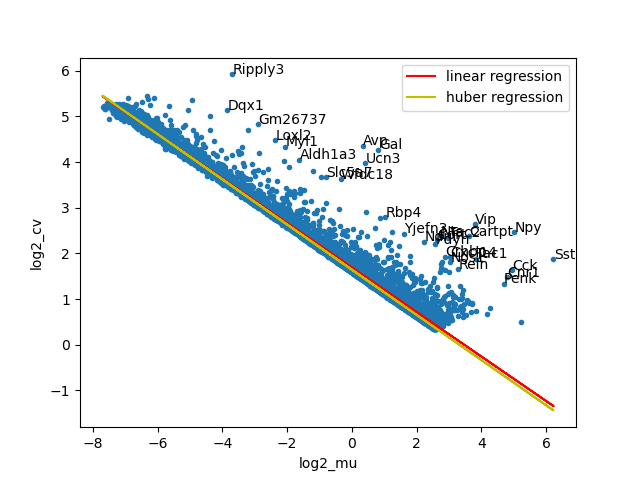

<IPython.core.display.Javascript object>


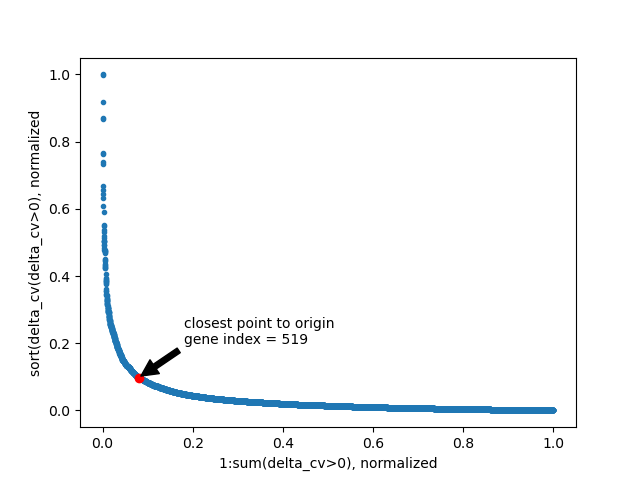

column (gene) mean after standardization: -0.00
column (gene) sigma after standardization: 1.00


In [1032]:
amy_df_gaba_expr_ge_cv_ls, amy_metadata_df_gaba = cc.process_amy_data_class(amy_df,amy_metadata_df,IEG_list,sex_gene_list,cell_class='GABA')

In [1033]:
amy_df_gaba_expr_ge_cv_ls.shape

(519, 13006)

In [1034]:
amy_df_gaba_expr_ge_cv_ls

GGGTATTTCTCGCGTT-1_10-1  GGTAACTAGACATCCT-1_18-1  \
cellID                                                     
Sst                   -0.545385                 0.306249   
Npy                    1.105514                -0.442248   
Gal                   -0.112651                -0.112651   
Avp                   -0.108845                -0.108845   
Vip                   -0.222700                -0.222700   
...                         ...                      ...   
Mdfic                 -0.047916                -0.047916   
Pld5                  -0.429433                -0.429433   
Kcnip4                -0.813752                 1.404627   
Tppp3                 -0.539772                -0.539772   
Lhfp                  -0.166229                -0.166229   

        GGTAATCGTGGACTAG-1_18-1  TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                     
Sst                   -0.545385                -0.545385   
Npy                   -0.442248                -0.442248   
Gal                   -0.112651                -0.112651   
Avp                   -0.108845                -0.108845   
Vip                   -0.222700                -0.222700   
...                         ...                      ...   
Mdfic                 -0.047916                -0.047916   
Pld5                  -0.429433                -0.429433   
Kcnip4                -0.813752                -0.813752   
Tppp3                 -0.539772                 1.656778   
Lhfp                  -0.166229                -0.166229   

        AGGGTGAAGTACAACA-1_19-1  AGTACCATCCCTGGTT-1_19-1  \
cellID                                                     
Sst                   -0.545385                -0.545385   
Npy                   -0.442248                -0.442248   
Gal                   -0.112651                -0.112651   
Avp                   -0.108845                -0.108845   
Vip                   -0.222700                -0.222700   
...                         ...                      ...   
Mdfic                 -0.047916                -0.047916   
Pld5                  -0.429433                -0.429433   
Kcnip4                -0.813752                 1.178894   
Tppp3                 -0.539772                -0.539772   
Lhfp                  -0.166229                -0.166229   

        CATGAGTTCCGGCTTT-1_19-1  TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                     
Sst                   -0.545385                 1.157884   
Npy                   -0.442248                -0.442248   
Gal                   -0.112651                -0.112651   
Avp                   -0.108845                -0.108845   
Vip                   -0.222700                -0.222700   
...                         ...                      ...   
Mdfic                 -0.047916                -0.047916   
Pld5                   2.052045                -0.429433   
Kcnip4                -0.813752                -0.813752   
Tppp3                  1.656778                -0.539772   
Lhfp                   6.210554                -0.166229   

        AAACGCTTCACCATGA-1_23-1  TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                    ...   
Sst                   -0.545385                 0.443332  ...   
Npy                   -0.442248                -0.442248  ...   
Gal                   -0.112651                -0.112651  ...   
Avp                   -0.108845                -0.108845  ...   
Vip                   -0.222700                -0.222700  ...   
...                         ...                      ...  ...   
Mdfic                 -0.047916                -0.047916  ...   
Pld5                  -0.429433                -0.429433  ...   
Kcnip4                 1.178894                 1.178894  ...   
Tppp3                  2.941677                -0.539772  ...   
Lhfp                  -0.166229                -0.166229  ...   

        GTCAAACTCCCGATCT-1_76-2  GTGTA

In [1035]:
amy_metadata_df_gaba.shape

(7, 13006)

In [1036]:
amy_metadata_df_gaba

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
cellID                                                          
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           10-1                    18-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                          
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           18-1                    18-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
cellID                                                          
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           19-1                    19-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                          
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           19-1                    19-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                         ...   
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4  ...   
sample                           23-1                    23-1  ...   
FC time                             0                       0  ...   
batch                               1                       1  ...   
cell_class                       GABA                    GABA  ...   
markers                [Adora2a, Id4]          [Adora2a, Id4]  ...   
cluster_label                      11                      11  ...   

              GTCAAACTCCCGATCT-1_76-2 GTGTAACGTGAGACCA-1_76-2  \
cellID                                                          
celltype              GABA-51-Vip-Crh         GABA-51-Vip-Crh   
sample                           76-2                    76-2   
FC time                             2                       2   
batch                               2                       2   
cell_class                       GABA                    GABA   
markers                    [Vip, Crh]              [Vip, Crh]   
cluster_label                      51                      51   

              GTGTGATAGGTGAGAA-1_76-2 TACTTCAGTAACTAAG-1_76-2  \
cellID                                                          
celltype              GABA-51-Vip-Crh         GABA-51-Vip-Crh   
sample                           76-2                    76-2   
FC time                             2                       2   
batch                               2                       2   
cell_class                       GABA                    GABA  

In [1037]:
#save to file

folder = '/bigdata/isaac/gaba_files/'

file1 = 'amy_df_gaba_expr_ge_cv_ls_orig' 
file2 = 'amy_metadata_df_gaba_orig' 

amy_df_gaba_expr_ge_cv_ls.to_feather(folder+file1+'.feather')
amy_metadata_df_gaba.to_json(folder+file2+'.json')

In [1038]:
folder = '/bigdata/isaac/gaba_files/'

In [1039]:
amy_df_gaba_expr_ge_cv_ls_orig = pd.read_feather(folder + 'amy_df_gaba_expr_ge_cv_ls_orig.feather')
amy_metadata_df_gaba_orig = pd.read_json(folder + 'amy_metadata_df_gaba_orig.json')

### Load gaba_df_prelinkage_ls saved from "dimorph_cell_analysis_nb.ipynb" and get intersection
### already has feature selected genes

In [1052]:
folder = '/bigdata/isaac/gaba_files/'

GABA_df_prelinkage_ls_orig = pd.read_feather(folder + 'GABA_df_pre_linkage_ls_2024-09-02.feather')
GABA_metadata_df_prelinkage_ls_orig = pd.read_json(folder + 'GABA_meta_data_df_pre_linkage_2024-09-02.json')
GABA_meta_data_df_plis_filtered = pd.read_json(folder + 'GABAmeta_data_df_plis_filtered_2024-09-02.json')


In [1053]:
GABA_df_plis_filtered = GABA_df_prelinkage_ls_orig.reindex(index = GABA_meta_data_df_plis_filtered.columns)

### Get intersection

In [1054]:
amy_df_GABA_expr_ge_cv_ls, GABA_df_plis_filtered = cc.get_df_gene_intersection(GABA_df_plis_filtered,amy_df_gaba_expr_ge_cv_ls,IEG_list)

removing  0  genes found in  ['Btg2', 'Jun', 'Egr4', 'Fosb', 'Junb', 'Gadd45g', 'Fos', 'Arc', 'Nr4a1', 'Npas4', 'Coq10b', 'Tns1', 'Per2', 'Ptgs2', 'Rnd3', 'Tnfaip6', 'Srxn1', 'Tiparp', 'Ccnl1', 'Mcl1', 'Dnajb5', 'Nr4a3', 'Fosl2', 'Nptx2', 'Rasl11a', 'Mest', 'Sertad1', 'Egr2', 'Midn', 'Gadd45b', 'Dusp6', 'Irs2', 'Plat', 'Ier2', 'Rrad', 'Tpbg', 'Csrnp1', 'Peli1', 'Per1', 'Kdm6b', 'Inhba', 'Plk2', 'Ifrd1', 'Baz1a', 'Trib1', 'Pim3', 'Lrrk2', 'Dusp1', 'Cdkn1a', 'Pim1', 'Sik1', 'Frat2', 'Dusp5']
Index(['Sst', 'Npy', 'Gal', 'Avp', 'Vip', 'Ucn3', 'Cartpt', 'Ripply3', 'Cck',
       'Cnr1',
       ...
       'Nbl1', 'Jsrp1', 'Sostdc1', 'Shisa6', 'Pdlim5', 'Fam19a2', 'Ppargc1a',
       'Pld5', 'Kcnip4', 'Lhfp'],
      dtype='object', length=376)


In [1055]:
GABA_df_plis_filtered.shape

(376, 10022)

In [1056]:
amy_df_GABA_expr_ge_cv_ls.shape

(376, 13006)

In [1057]:
folder

'/bigdata/isaac/gaba_files/'

### Compute avg expression for all genes, for every cluster

In [1060]:
amy_avgs = dp.compute_avg_expr_per_cluster_label(amy_df_GABA_expr_ge_cv_ls,amy_metadata_df_gaba)

In [1061]:
amy_avgs

1         2         3         4         5         6   \
Sst      -0.155349 -0.280595 -0.455989 -0.492804 -0.148882 -0.314029   
Npy      -0.359158  -0.22505  0.068509  0.900939 -0.086038 -0.150077   
Gal      -0.112651 -0.112651 -0.089581 -0.112651 -0.074812 -0.069099   
Avp      -0.108845 -0.071297 -0.028345 -0.108845 -0.052378 -0.021984   
Vip      -0.211028  -0.20211 -0.196752 -0.158658 -0.172872 -0.205202   
...            ...       ...       ...       ...       ...       ...   
Fam19a2  -0.017843 -0.491078  0.078994  0.086547  0.612419 -0.051607   
Ppargc1a  0.367969 -0.343563 -0.508327  -0.56609 -0.381029 -0.377084   
Pld5       0.36542  0.951358 -0.240701 -0.005046  0.487558  0.130078   
Kcnip4    0.535392  0.517315  0.247973  0.685572  0.714297  0.258686   
Lhfp     -0.107726 -0.149704 -0.015354 -0.075132 -0.110292 -0.107323   

                7         8         9         10  ...        47        48  \
Sst       0.423542 -0.263417 -0.395131 -0.501013  ...  0.155029 -0.447587   
Npy       -0.38883 -0.387799 -0.364963 -0.282428  ... -0.333043 -0.372397   
Gal      -0.112651 -0.087391 -0.068467 -0.112651  ... -0.097408 -0.105911   
Avp      -0.073287 -0.055146  -0.05929 -0.052248  ... -0.086099 -0.053048   
Vip      -0.204007  -0.19946 -0.199775 -0.193786  ... -0.172384 -0.192407   
...            ...       ...       ...       ...  ...       ...       ...   
Fam19a2  -0.517742 -0.527878  -0.35638 -0.344517  ... -0.001721  0.100983   
Ppargc1a -0.113144 -0.000711  0.085683  0.054693  ...   0.26656  0.462964   
Pld5       0.07014 -0.385895 -0.406659 -0.206469  ... -0.077231 -0.328914   
Kcnip4   -0.060652 -0.047448  0.049714  0.321894  ... -0.681736  0.666536   
Lhfp     -0.166229 -0.150522 -0.122178 -0.051377  ... -0.081822  0.020414   

                49        50        51        52        53        54  \
Sst      -0.450272 -0.514228 -0.427441 -0.440583 -0.451893 -0.427688   
Npy      -0.366435 -0.401907 -0.352834 -0.374402 -0.396366 -0.403158   
Gal      -0.050846  0.248763 -0.100601 -0.041433 -0.112651 -0.112651   
Avp       0.014219  0.012632  0.005873 -0.026616  -0.08045 -0.026667   
Vip      -0.048683   2.22628  4.872482   -0.2227 -0.116881  0.244626   
...            ...       ...       ...       ...       ...       ...   
Fam19a2   0.527271 -0.000624  0.678563 -0.361065  0.000579  0.544766   
Ppargc1a  0.207191 -0.251954 -0.049666 -0.366242 -0.364607 -0.226413   
Pld5      0.729462  0.605465 -0.204186 -0.336766 -0.136654 -0.280694   
Kcnip4    0.522226 -0.083875  0.150193 -0.050973 -0.617036  0.345685   
Lhfp     -0.080104  0.418846   -0.1343 -0.166229 -0.047641 -0.082517   

                55        56  
Sst      -0.345629 -0.444237  
Npy      -0.264757 -0.154209  
Gal      -0.112651   -0.0807  
Avp      -0.108845 -0.067684  
Vip       3.712796    -0.111  
...            ...       ...  
Fam19a2   0.589401 -0.154694  
Ppargc1a -0.300026  -0.28419  
Pld5     -0.142431 -0.358911  
Kcnip4    0.713779 -0.487957  
Lhfp     -0.106776  0.000309  

[376 rows x 56 columns]

In [1062]:
sd_avgs = dp.compute_avg_expr_per_cluster_label(GABA_df_plis_filtered,GABA_meta_data_df_plis_filtered)

In [1063]:
sd_avgs

1         2         3         4         5         6   \
Sst      -0.194687 -0.358431 -0.345789 -0.207372  0.090203  -0.34105   
Npy      -0.150086 -0.279075 -0.258327 -0.302156 -0.275489 -0.264786   
Gal       1.748356 -0.126186 -0.126186 -0.126186 -0.126186 -0.126186   
Avp      -0.201913  0.009672 -0.071693 -0.201913 -0.033852  0.119244   
Vip      -0.154338  0.219668  6.220309 -0.154338 -0.146482 -0.143328   
...            ...       ...       ...       ...       ...       ...   
Fam19a2  -0.347327  0.612164  0.538219  0.187342  0.094747  0.426905   
Ppargc1a  0.035735  -0.12285 -0.361228 -0.272818  0.429596  0.626033   
Pld5      3.470845 -0.385868 -0.224568 -0.265871  0.035717 -0.261483   
Kcnip4    1.070099 -0.333966 -0.106023 -0.809251 -0.716891  1.066976   
Lhfp      0.750948 -0.132338 -0.189243    0.1506 -0.121687 -0.060548   

                7         8         9         10  ...        41        42  \
Sst      -0.370597 -0.361555 -0.350722  0.180259  ...  -0.33354 -0.326563   
Npy       0.177284 -0.069338 -0.287106  0.146964  ...  -0.26414 -0.239101   
Gal      -0.126186 -0.126186 -0.126186 -0.107422  ... -0.115246 -0.126186   
Avp      -0.018978 -0.201913 -0.072571 -0.093718  ...  0.011376 -0.080687   
Vip      -0.138736 -0.129051 -0.154338 -0.144733  ... -0.148738 -0.154338   
...            ...       ...       ...       ...  ...       ...       ...   
Fam19a2  -0.219798 -0.097128  1.817951  1.098405  ...  0.386086  0.274835   
Ppargc1a  -0.57095 -0.095978  1.284642  1.123727  ... -0.211634  0.011189   
Pld5       0.83445  0.303112 -0.399942 -0.348703  ...  0.503254  0.782529   
Kcnip4   -0.521923 -0.789103 -0.800419 -0.674472  ...  0.195124  0.282605   
Lhfp     -0.175252 -0.149906  0.179095  0.054174  ... -0.178313 -0.200898   

                43        44        45        46        47        48  \
Sst      -0.339515 -0.368771   0.23559 -0.211878 -0.072571 -0.112722   
Npy      -0.276908 -0.295374  0.130791 -0.246612  0.510632 -0.244332   
Gal      -0.105918 -0.126186 -0.026339  0.266744 -0.126186 -0.060247   
Avp      -0.101037 -0.035125  0.253785 -0.031275  0.003348 -0.077676   
Vip       0.077692 -0.134358 -0.043747 -0.154338 -0.154338   -0.0836   
...            ...       ...       ...       ...       ...       ...   
Fam19a2   0.499132 -0.042106  0.463752   0.19086  0.856596  0.196763   
Ppargc1a  0.047088 -0.185085  0.251431  0.414077  -0.16618 -0.023663   
Pld5      0.387346  0.019482  0.302959  0.514698  0.309709 -0.168676   
Kcnip4     0.15152  0.759663  0.162445  0.141167  0.307313  0.935139   
Lhfp     -0.159058 -0.160608 -0.029136  0.038356 -0.129953  0.549234   

                49        50  
Sst      -0.342363   2.50577  
Npy      -0.202569  -0.01045  
Gal       0.200657 -0.068699  
Avp       0.073884 -0.001628  
Vip      -0.046081 -0.139625  
...            ...       ...  
Fam19a2  -0.409315 -0.159485  
Ppargc1a  1.226648  0.673166  
Pld5      0.424207 -0.373807  
Kcnip4    0.780004  1.089625  
Lhfp     -0.056481  -0.17123  

[376 rows x 50 columns]

In [1064]:
heatmap2, heatmap_argmax_df_alt_lco, corr_matrix_manual_alt_lco, corr_matrix_manual_alt_lco_sorted = cc.plot_correlation(sd_avgs,amy_avgs)
# Display the plot
hvplot.show(heatmap2)
    
# Ensure output is displayed inline
hv.output(heatmap2, backend='bokeh')

Launching server at http://localhost:35833


:HeatMap   [columns,index]   (value)

In [1066]:
error_genes,all_marker_labels = cc.amy_gene_spell_checker(amy_df_gaba_expr_ge_cv_ls_orig,amy_metadata_df_gaba)
error_genes

/home/isaac/analysis/scRNA-seq/cell_comparison.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_m = [amy_metadata_df.loc['markers'][x] for x in range((amy_metadata_df.loc['markers'].shape[0]))]


gene,  Cyp26a1 not found in index
gene,  Hctr2 not found in index
gene,  Scng not found in index
gene,  Lrpprc not found in index
gene,  Luzp2 not found in index
gene,  Rpb4 not found in index


['Cyp26a1', 'Hctr2', 'Scng', 'Lrpprc', 'Luzp2', 'Rpb4']

In [1067]:
all_marker_labels

[['Adora2a', 'Id4'],
 ['Adora2a', 'Scn4b'],
 ['Prlr', 'Calcr'],
 ['Chat', 'Vip'],
 ['Crabp1', 'Etv1'],
 ['Adora2a', 'Crh'],
 ['Pax6', 'Cyp26a1'],
 ['Reln', 'Crim1'],
 ['Isl1', 'Tac1'],
 ['Drd1', 'Ebf1'],
 ['Drd1', 'Scn4b'],
 ['Isl1', 'Aldoc'],
 ['Sncg', 'Vip'],
 ['Prlr', 'Cbln1'],
 ['Prlr', 'Satb1'],
 ['Foxp2', 'Fmod'],
 ['Gal', 'Avp'],
 ['Lhx8', 'Th'],
 ['Gpr101', 'Gabre'],
 ['Moxd1', 'Vwc2'],
 ['Moxd1', 'Pvalb'],
 ['Lamp5', 'Hctr2'],
 ['Foxp2', 'Htr1f'],
 ['Scng', 'Kcnc2'],
 ['Prlr', 'Greb1'],
 ['Lamp5', 'Kit'],
 ['Sncg', 'Krt73'],
 ['Lhx6', 'Nxph2'],
 ['Fign', 'Lrpprc'],
 ['Cbln4', 'Luzp2'],
 ['Npnt', 'Calca'],
 ['Prkcd', 'Oprk1'],
 ['Pax6', 'Enpp2'],
 ['Pax6', 'Th'],
 ['Foxp2', 'Col6a1'],
 ['Prkcd', 'Adora2a'],
 ['Prkcd', 'Ezr'],
 ['Prkcd', 'Nts'],
 ['Calb2', 'Rgs12'],
 ['Reln', 'Ndnf'],
 ['Htr3a', 'Kcnc2'],
 ['Rpb4', 'Sst'],
 ['Foxp2', 'Adra2a'],
 ['Cbln4', 'Sst'],
 ['Sst', 'Nek7'],
 ['Chodl', 'Moxd1'],
 ['Sst', 'Fign'],
 ['Sst', 'Tmtc4'],
 ['Sst', 'Npy'],
 ['Prlr', 'St18'],
 ['Pr

In [1069]:
correct_gene_names = ['Hcrtr2','Sncg','Rbp4']

In [1070]:
all_marker_labels_c = cc.correct_error_genes(error_genes,correct_gene_names,all_marker_labels)

Cyp26a1
Cyp26a1
Cyp26a1
Hctr2
Hctr2
Scng
Scng
Scng
Lrpprc
Lrpprc
Lrpprc
Luzp2
Luzp2
Luzp2
Rpb4
Rpb4
Rpb4
Rpb4


In [1071]:
all_marker_labels_c

[['Adora2a', 'Id4'],
 ['Adora2a', 'Scn4b'],
 ['Prlr', 'Calcr'],
 ['Chat', 'Vip'],
 ['Crabp1', 'Etv1'],
 ['Adora2a', 'Crh'],
 ['Pax6', 'Cyp26a1'],
 ['Reln', 'Crim1'],
 ['Isl1', 'Tac1'],
 ['Drd1', 'Ebf1'],
 ['Drd1', 'Scn4b'],
 ['Isl1', 'Aldoc'],
 ['Sncg', 'Vip'],
 ['Prlr', 'Cbln1'],
 ['Prlr', 'Satb1'],
 ['Foxp2', 'Fmod'],
 ['Gal', 'Avp'],
 ['Lhx8', 'Th'],
 ['Gpr101', 'Gabre'],
 ['Moxd1', 'Vwc2'],
 ['Moxd1', 'Pvalb'],
 ['Lamp5', 'Hcrtr2'],
 ['Foxp2', 'Htr1f'],
 ['Sncg', 'Kcnc2'],
 ['Prlr', 'Greb1'],
 ['Lamp5', 'Kit'],
 ['Sncg', 'Krt73'],
 ['Lhx6', 'Nxph2'],
 ['Fign', 'Lrpprc'],
 ['Cbln4', 'Luzp2'],
 ['Npnt', 'Calca'],
 ['Prkcd', 'Oprk1'],
 ['Pax6', 'Enpp2'],
 ['Pax6', 'Th'],
 ['Foxp2', 'Col6a1'],
 ['Prkcd', 'Adora2a'],
 ['Prkcd', 'Ezr'],
 ['Prkcd', 'Nts'],
 ['Calb2', 'Rgs12'],
 ['Reln', 'Ndnf'],
 ['Htr3a', 'Kcnc2'],
 ['Rbp4', 'Sst'],
 ['Foxp2', 'Adra2a'],
 ['Cbln4', 'Sst'],
 ['Sst', 'Nek7'],
 ['Chodl', 'Moxd1'],
 ['Sst', 'Fign'],
 ['Sst', 'Tmtc4'],
 ['Sst', 'Npy'],
 ['Prlr', 'St18'],
 ['P

In [1072]:
folder = '/bigdata/isaac/gaba_files/'
 
GABA_cl_mg_dict_filtered = {int(k): v for k, v in GABA_cl_mg_dict_filtered.items()}

In [1073]:
GABA_cl_mg_dict_filtered

{1: ['Chat',
  'Isl1',
  'Ecel1',
  'Th',
  'Zic1',
  'Luzp2',
  'Lhx8',
  'Clstn2',
  'Pbx3',
  'Ngfr',
  'Slc5a7',
  'Slc18a3',
  'Slc10a4'],
 2: ['Htr3a',
  'Zeb2',
  'Col19a1',
  'Npy1r',
  'Krt73',
  'Cxcl14',
  'Sncg',
  'Synpr',
  'Sln',
  'Pde5a',
  'Necab1',
  'Npas1',
  'Rgs12',
  'Cnr1'],
 3: ['Cbln2',
  'Prox1',
  'Calb2',
  'Prox1os',
  'Gpd1',
  'Plpp4',
  'Vip',
  'Aebp1',
  'Tac2',
  'Svil',
  'Adra1b',
  'Asic4'],
 4: ['Cpne4', 'Pde3a'],
 5: ['Ndnf', 'Tnnt1', 'Rgs5', 'Ppp1r1c', 'Timp3', '1810011O10Rik', 'Reln'],
 6: ['Dab1', 'Nfib', 'Nrip3', 'Rxfp1', 'Ifi27l2a'],
 7: ['Pdlim5', 'Nfix', 'Sema5a', 'Egfr', 'Cplx3', 'Crispld1', 'Kit', 'Thrsp'],
 8: ['Hcrtr2', 'Id2', 'Cryab', 'Vcan', 'Hapln1', 'Trpc5'],
 9: ['Thsd7a',
  'Gabrd',
  'Pthlh',
  'Tcap',
  'Pvalb',
  'Itih5',
  'Igfbp4',
  'Nek7',
  'C1ql1'],
 10: ['Kitl', 'Rbp4', 'Lgals1', 'Cort', 'Fam150b'],
 11: ['Vwc2', '3110035E14Rik', 'Tmem132c', 'Moxd1', 'Gpr83'],
 12: ['Maf', 'Mafb'],
 13: ['Sst', 'Sox6', 'Adgrg6', 'Npy'

In [1074]:
sd_shared_cl_mg_dict, connector_df_alt_lco_marker_shared_top = cc.build_corr_table_shared_top(heatmap_argmax_df_alt_lco,
                                                     corr_matrix_manual_alt_lco,
                                                     all_marker_labels_c,
                                                     amy_metadata_df_gaba,
                                                     GABA_cl_mg_dict_filtered)

In [1075]:
sd_shared_cl_mg_dict

{'1': ['Chat', 'Isl1'],
 '2': ['Sncg', 'Htr3a'],
 '3': ['Vip', 'Cbln2'],
 '5': ['Reln', 'Ndnf'],
 '7': ['Kit', 'Pdlim5'],
 '8': ['Hcrtr2', 'Id2'],
 '9': ['Pthlh', 'Pvalb'],
 '10': ['Rbp4', 'Kitl'],
 '11': ['Moxd1', 'Vwc2'],
 '13': ['Npy', 'Sst'],
 '16': ['St18', 'Gm17660'],
 '17': ['Calcr', 'Peg10'],
 '18': ['Prlr', 'Pde1c'],
 '19': ['Cbln1', 'Grp'],
 '29': ['Gal', 'Asb4'],
 '40': ['Htr1f', 'Tshz1']}

In [1076]:
GABA_mg_cl_dict_final = cc.create_mg_cl_dict_final(GABA_cl_mg_dict_filtered,sd_shared_cl_mg_dict)

In [1077]:
GABA_mg_cl_dict_final

{1: ['Chat', 'Isl1'],
 2: ['Sncg', 'Htr3a'],
 3: ['Vip', 'Cbln2'],
 4: ['Cpne4', 'Pde3a'],
 5: ['Reln', 'Ndnf'],
 6: ['Dab1', 'Nfib'],
 7: ['Kit', 'Pdlim5'],
 8: ['Hcrtr2', 'Id2'],
 9: ['Pthlh', 'Pvalb'],
 10: ['Rbp4', 'Kitl'],
 11: ['Moxd1', 'Vwc2'],
 12: ['Maf', 'Mafb'],
 13: ['Npy', 'Sst'],
 14: ['Spon1', 'Tox'],
 15: ['Gm28884', 'Fam159b'],
 16: ['St18', 'Gm17660'],
 17: ['Calcr', 'Peg10'],
 18: ['Prlr', 'Pde1c'],
 19: ['Cbln1', 'Grp'],
 20: ['Tmem100'],
 21: ['Unc13c', 'Crtac1'],
 22: ['Igfbp6', 'Rprm'],
 23: ['Wfs1', 'Prok2'],
 24: ['Jsrp1', 'Col18a1'],
 25: ['Lpl'],
 26: ['Rmst', 'Mgat4c'],
 27: ['Oprk1', 'Trhde'],
 28: ['Lmo1', 'Chn2'],
 29: ['Gal', 'Asb4'],
 30: ['Igsf1', 'A230065H16Rik'],
 31: ['Foxp2', 'Gpr88'],
 32: ['Npy2r'],
 33: ['Nwd2'],
 34: ['Lypd1'],
 35: ['Hs3st4', 'Car10'],
 36: ['BC039966', 'Ngb'],
 37: ['Col23a1'],
 38: ['Col6a1'],
 39: ['Myh7'],
 40: ['Htr1f', 'Tshz1'],
 41: ['Col11a1', 'Pde11a'],
 42: ['Pax6', 'Npnt'],
 43: ['Calca'],
 44: ['Dsc3', 'Mfge8'],
 4

In [1078]:
sd_labels_df = cc.generate_sd_labels_df(GABA_mg_cl_dict_final)

In [1079]:
sd_labels_df

lco_index                sd_label       sd_label_complete
0           1            [Chat, Isl1]             1 Chat-Isl1
1           2           [Sncg, Htr3a]            2 Sncg-Htr3a
2           3            [Vip, Cbln2]             3 Vip-Cbln2
3           4          [Cpne4, Pde3a]           4 Cpne4-Pde3a
4           5            [Reln, Ndnf]             5 Reln-Ndnf
5           6            [Dab1, Nfib]             6 Dab1-Nfib
6           7           [Kit, Pdlim5]            7 Kit-Pdlim5
7           8           [Hcrtr2, Id2]            8 Hcrtr2-Id2
8           9          [Pthlh, Pvalb]           9 Pthlh-Pvalb
9          10            [Rbp4, Kitl]            10 Rbp4-Kitl
10         11           [Moxd1, Vwc2]           11 Moxd1-Vwc2
11         12             [Maf, Mafb]             12 Maf-Mafb
12         13              [Npy, Sst]              13 Npy-Sst
13         14            [Spon1, Tox]            14 Spon1-Tox
14         15      [Gm28884, Fam159b]      15 Gm28884-Fam159b
15         16         [St18, Gm17660]         16 St18-Gm17660
16         17          [Calcr, Peg10]          17 Calcr-Peg10
17         18           [Prlr, Pde1c]           18 Prlr-Pde1c
18         19            [Cbln1, Grp]            19 Cbln1-Grp
19         20               [Tmem100]              20 Tmem100
20         21        [Unc13c, Crtac1]        21 Unc13c-Crtac1
21         22          [Igfbp6, Rprm]          22 Igfbp6-Rprm
22         23           [Wfs1, Prok2]           23 Wfs1-Prok2
23         24        [Jsrp1, Col18a1]        24 Jsrp1-Col18a1
24         25                   [Lpl]                  25 Lpl
25         26          [Rmst, Mgat4c]          26 Rmst-Mgat4c
26         27          [Oprk1, Trhde]          27 Oprk1-Trhde
27         28            [Lmo1, Chn2]            28 Lmo1-Chn2
28         29             [Gal, Asb4]             29 Gal-Asb4
29         30  [Igsf1, A230065H16Rik]  30 Igsf1-A230065H16Rik
30         31          [Foxp2, Gpr88]          31 Foxp2-Gpr88
31         32                 [Npy2r]                32 Npy2r
32         33                  [Nwd2]                 33 Nwd2
33         34                 [Lypd1]                34 Lypd1
34         35         [Hs3st4, Car10]         35 Hs3st4-Car10
35         36         [BC039966, Ngb]         36 BC039966-Ngb
36         37               [Col23a1]              37 Col23a1
37         38                [Col6a1]               38 Col6a1
38         39                  [Myh7]                 39 Myh7
39         40          [Htr1f, Tshz1]          40 Htr1f-Tshz1
40         41       [Col11a1, Pde11a]       41 Col11a1-Pde11a
41         42            [Pax6, Npnt]            42 Pax6-Npnt
42         43                 [Calca]                43 Calca
43         44           [Dsc3, Mfge8]           44 Dsc3-Mfge8
44         45         [Nrn1, Slc17a7]         45 Nrn1-Slc17a7
45         46         [Pou3f2, Zfhx3]         46 Pou3f2-Zfhx3
46         47        [Cyp26b1, Dach1]        47 Cyp26b1-Dach1
47         48            [Ptn, Ndst4]            48 Ptn-Ndst4
48         49          [Megf11, Gpc5]          49 Megf11-Gpc5
49         50        [BC048546, Dlx1]        50 BC048546-Dlx1

In [1080]:
amy_labels_df,amy_labels = cc.generate_amy_labels_df(connector_df_alt_lco_marker_shared_top,corr_matrix_manual_alt_lco)

In [1081]:
amy_labels_df

0
1       1 Foxp2-Fmod
2     2 Foxp2-Adra2a
3     3 Foxp2-Col6a1
4      4 Foxp2-Htr1f
5       5 Pax6-Enpp2
6          6 Pax6-Th
7     7 Pax6-Cyp26a1
8      8 Prkcd-Oprk1
9        9 Prkcd-Ezr
10  10 Prkcd-Adora2a
11    11 Adora2a-Id4
12  12 Adora2a-Scn4b
13    13 Adora2a-Crh
14     14 Drd1-Scn4b
15      15 Drd1-Ebf1
16      16 Prkcd-Nts
17      17 Pdyn-Ebf1
18      18 Isl1-Tac1
19     19 Isl1-Aldoc
20   20 Gpr101-Gabre
21        21 Vdr-Nts
22        22 Gal-Avp
23    23 Fign-Lrpprc
24      24 Fign-Ucn3
25        25 Lhx8-Th
26      26 Cbln4-Sst
27     27 Lhx6-Nxph2
28    28 Cbln4-Luzp2
29     29 Prlr-Greb1
30     30 Prlr-Calcr
31     31 Prlr-Cbln1
32      32 Prlr-Tac1
33      33 Prlr-St18
34     34 Prlr-Satb1
35    35 Chodl-Moxd1
36       36 Sst-Fign
37        37 Sst-Npy
38      38 Sst-Tmtc4
39       39 Sst-Nek7
40       40 Rbp4-Sst
41    41 Moxd1-Pvalb
42     42 Moxd1-Vwc2
43    43 Crabp1-Etv1
44    44 Pthlh-Pvalb
45   45 Lamp5-Hcrtr2
46      46 Lamp5-Kit
47      47 Reln-Ndnf
48     48 Reln-Crim1
49     49 Npnt-Calca
50       50 Chat-Vip
51        51 Vip-Crh
52    52 Calb2-Rgs12
53    53 Htr3a-Kcnc2
54     54 Sncg-Kcnc2
55       55 Sncg-Vip
56     56 Sncg-Krt73

In [473]:
##update corr plot with dropped/merged clusters (from dimorph_processing.py)

In [1082]:
folder

'/bigdata/isaac/gaba_files/'

In [1083]:
folder = '/bigdata/isaac/gaba_files/'
cc.plot_correlation_w_labels(corr_matrix_manual_alt_lco_sorted,sd_labels_df,amy_labels_df, folder, 'GABA_filtered_merged',savefig=True)

Launching server at http://localhost:46711


:HeatMap   [columns,index]   (value)

In [1084]:
today

'2024-09-02'

In [740]:
#write labels df's to file

In [1086]:
folder = '/bigdata/isaac/gaba_files/'
sd_labels_df.to_csv(folder + 'GABA_sd_labels_df_' + today + '.csv')
amy_labels_df.to_csv(folder + 'GABA_amy_labels_df_' + today + '.csv')

In [1087]:
folder

'/bigdata/isaac/gaba_files/'

In [1088]:
folder = '/bigdata/isaac/gaba_files/'
file = 'GABA_mg_cl_dict_final_' + today
#write dict to file
with open(folder+file+'.json', "w") as outfile: 
    json.dump(GABA_mg_cl_dict_final, outfile)

In [906]:
folder

'/bigdata/isaac/Vglut1_files/'

<IPython.core.display.Javascript object>


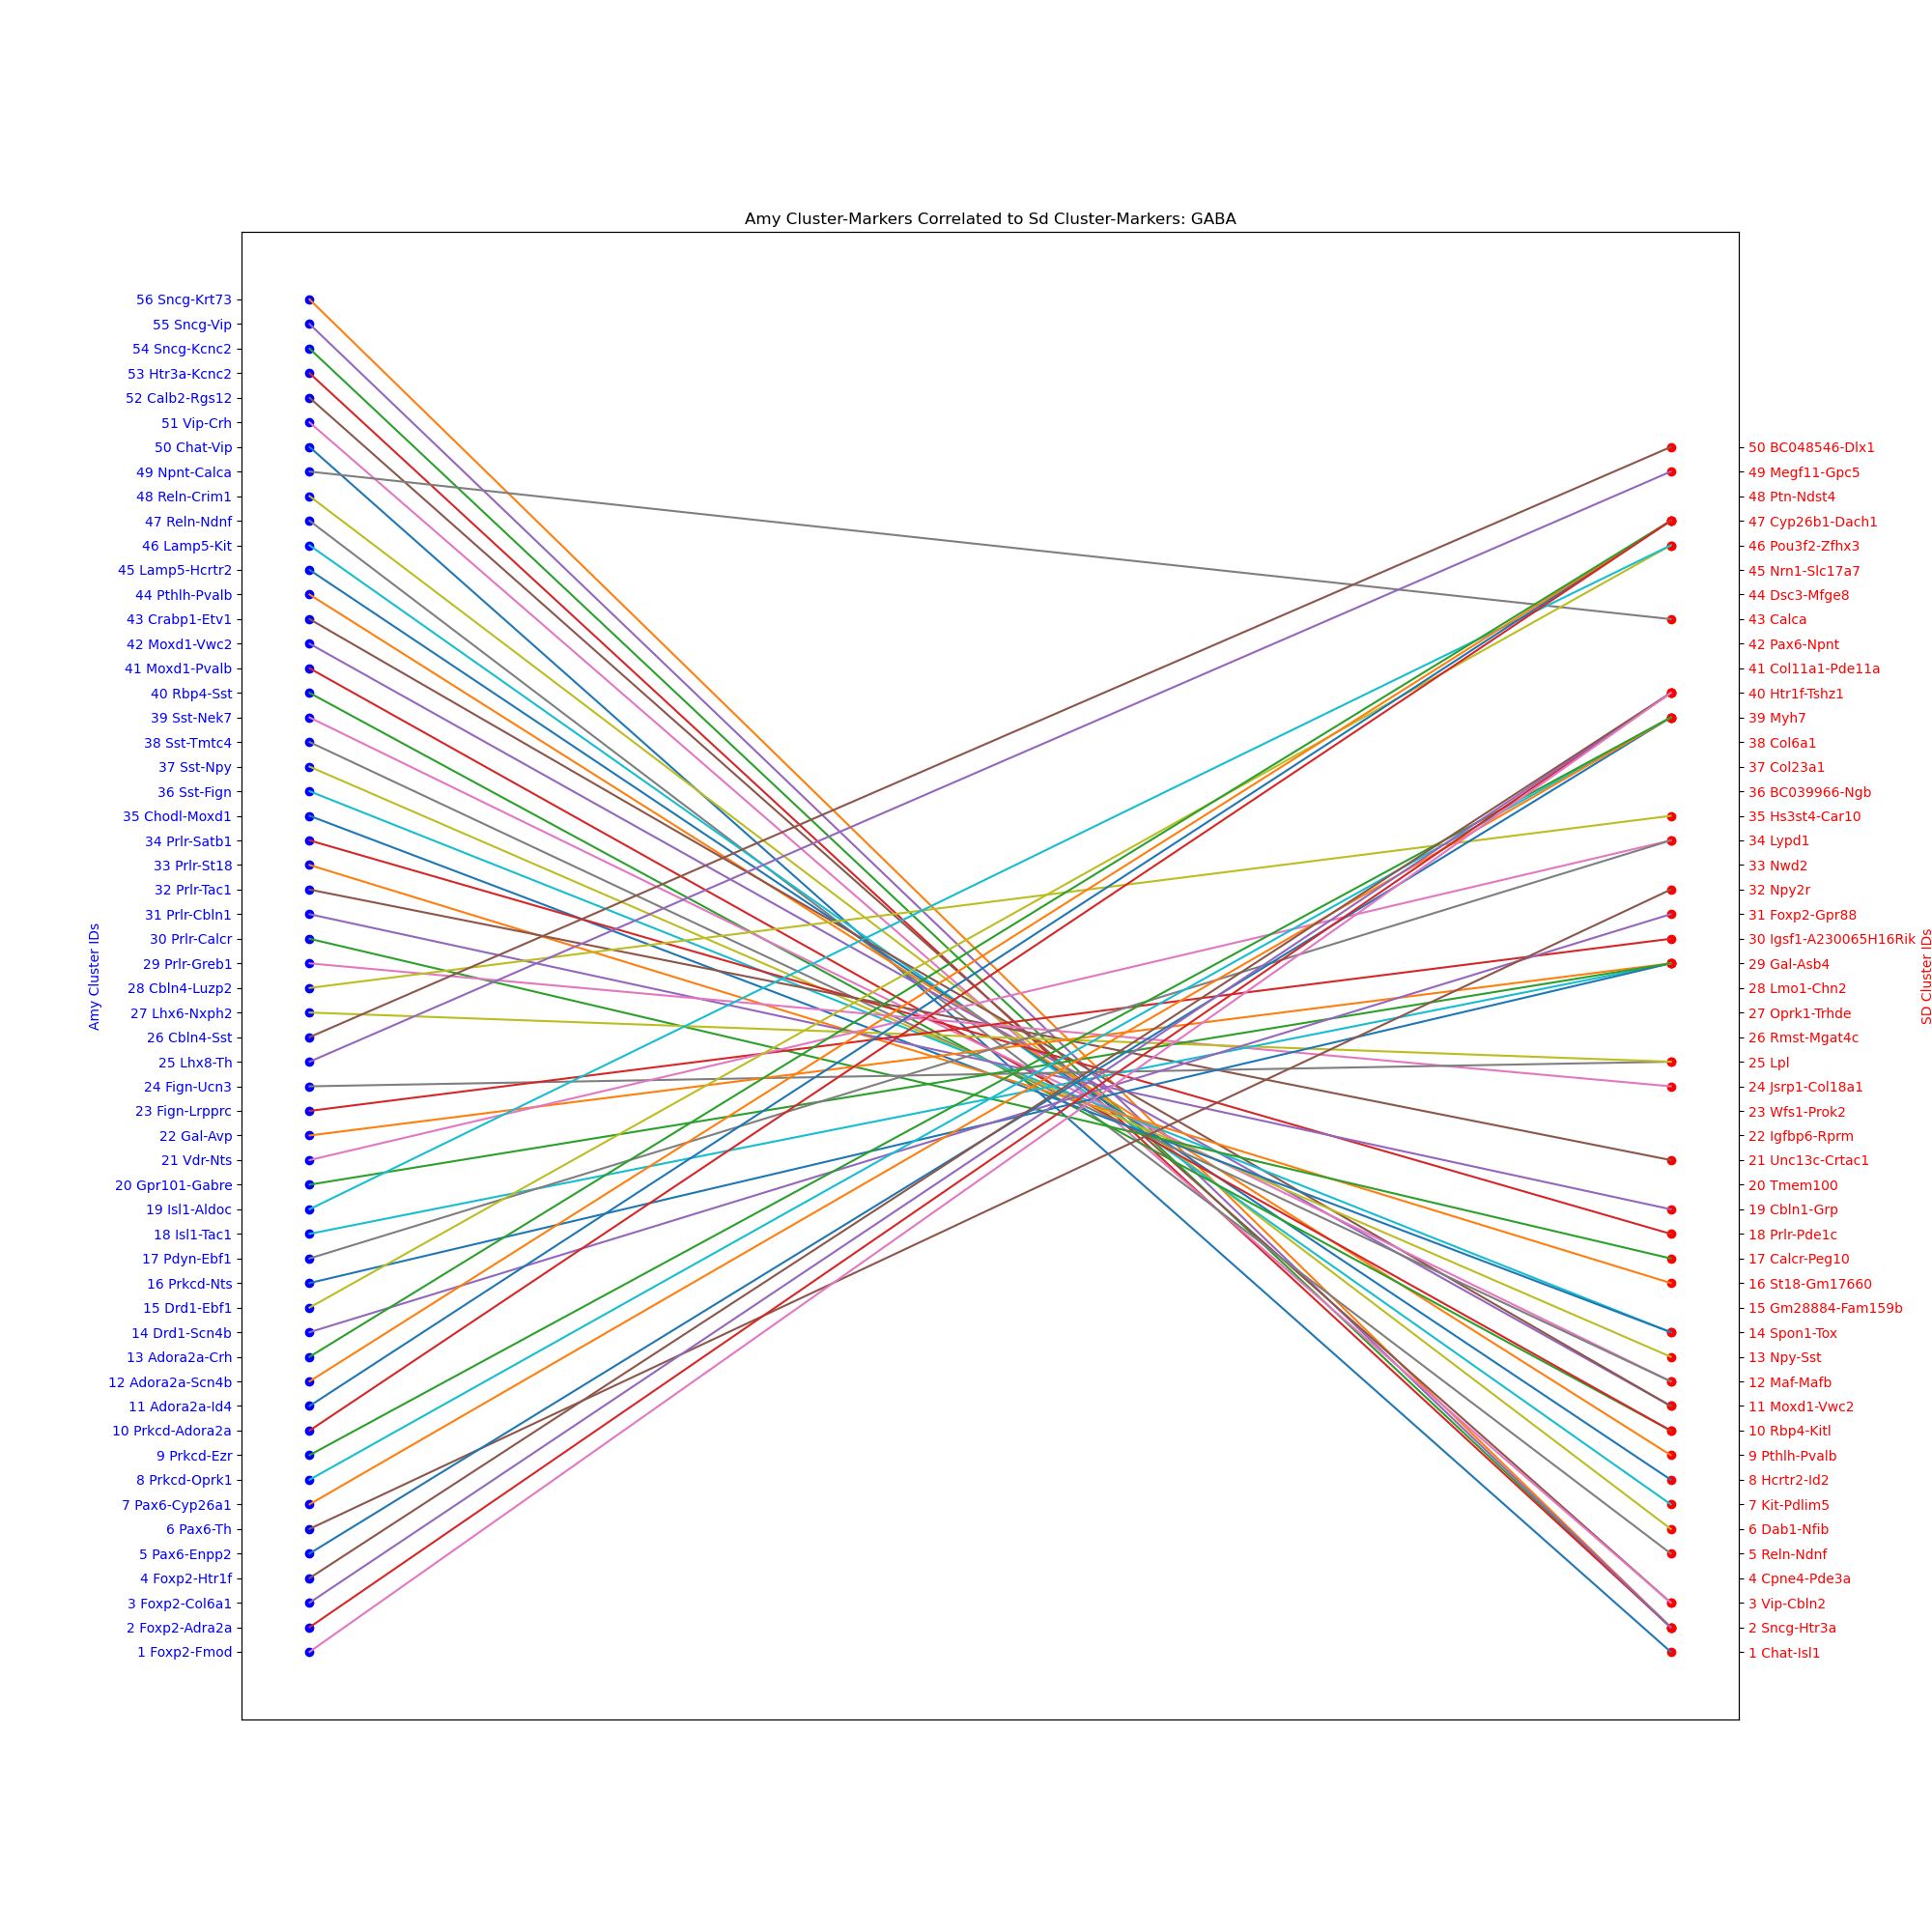

In [1089]:
cc.plot_connector_plot_with_labels(connector_df_alt_lco_marker_shared_top,GABA_mg_cl_dict_final,list(sd_labels_df['sd_label_complete']),amy_labels, folder,'GABA',savefig = True)

<IPython.core.display.Javascript object>


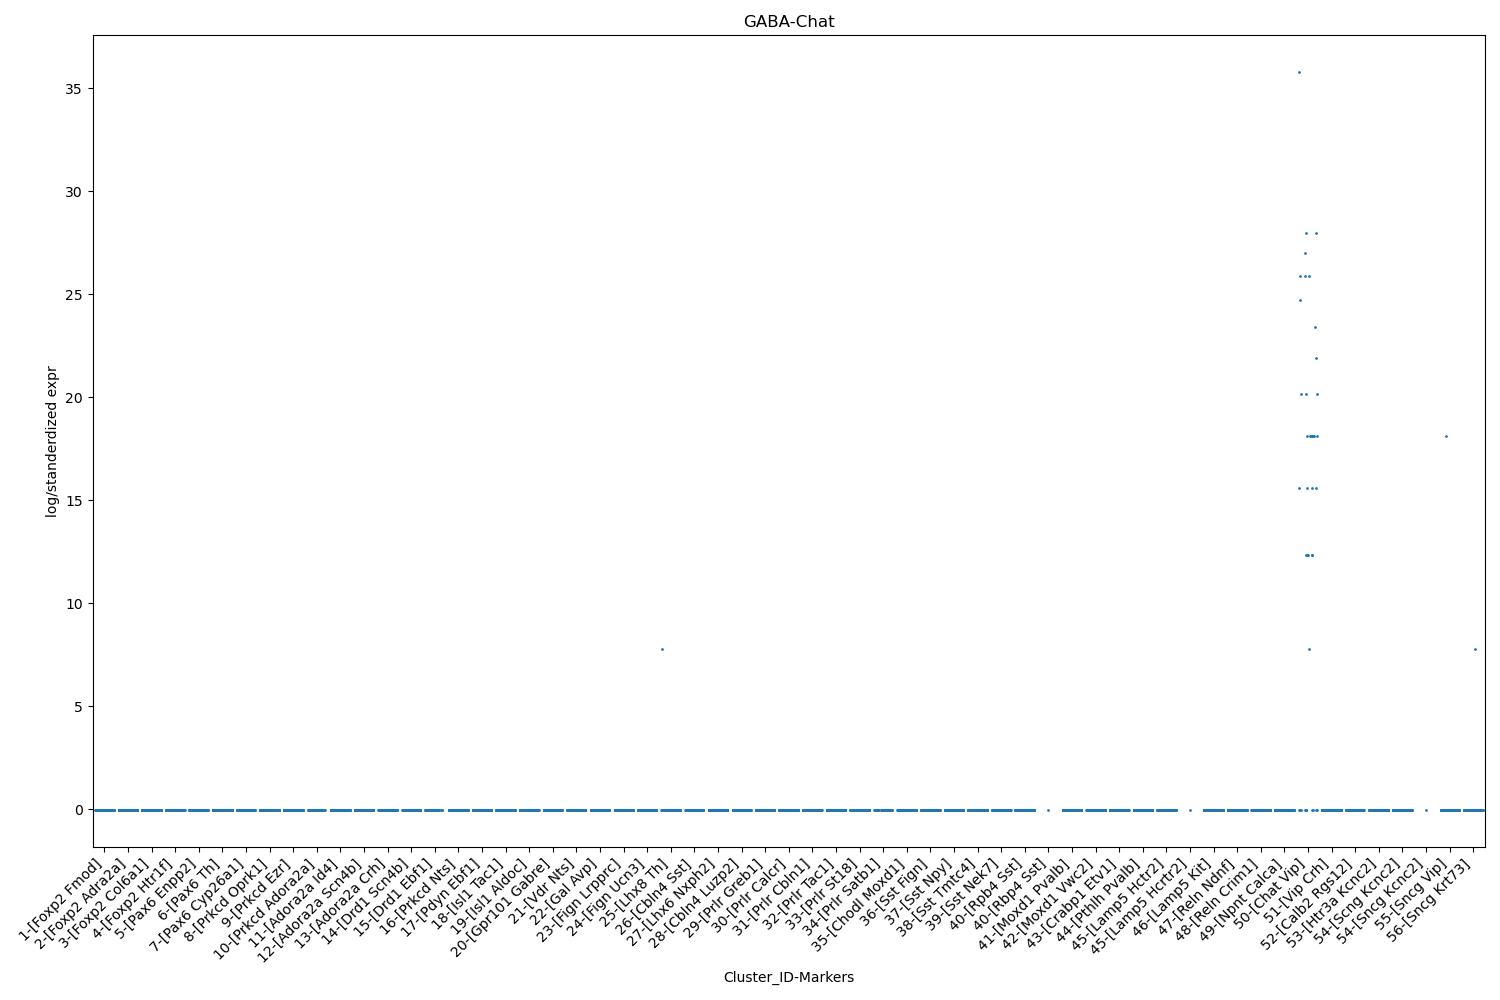

/home/isaac/analysis/scRNA-seq/cell_comparison.py:188: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")


In [1090]:
xticks = cc.gene_explorer('Chat', 'amy', amy_df_GABA_expr_ge_cv_ls, amy_metadata_df_gaba,output_folder = '/bigdata/isaac/gaba_files/gene_explorer/',markers = True)

<IPython.core.display.Javascript object>


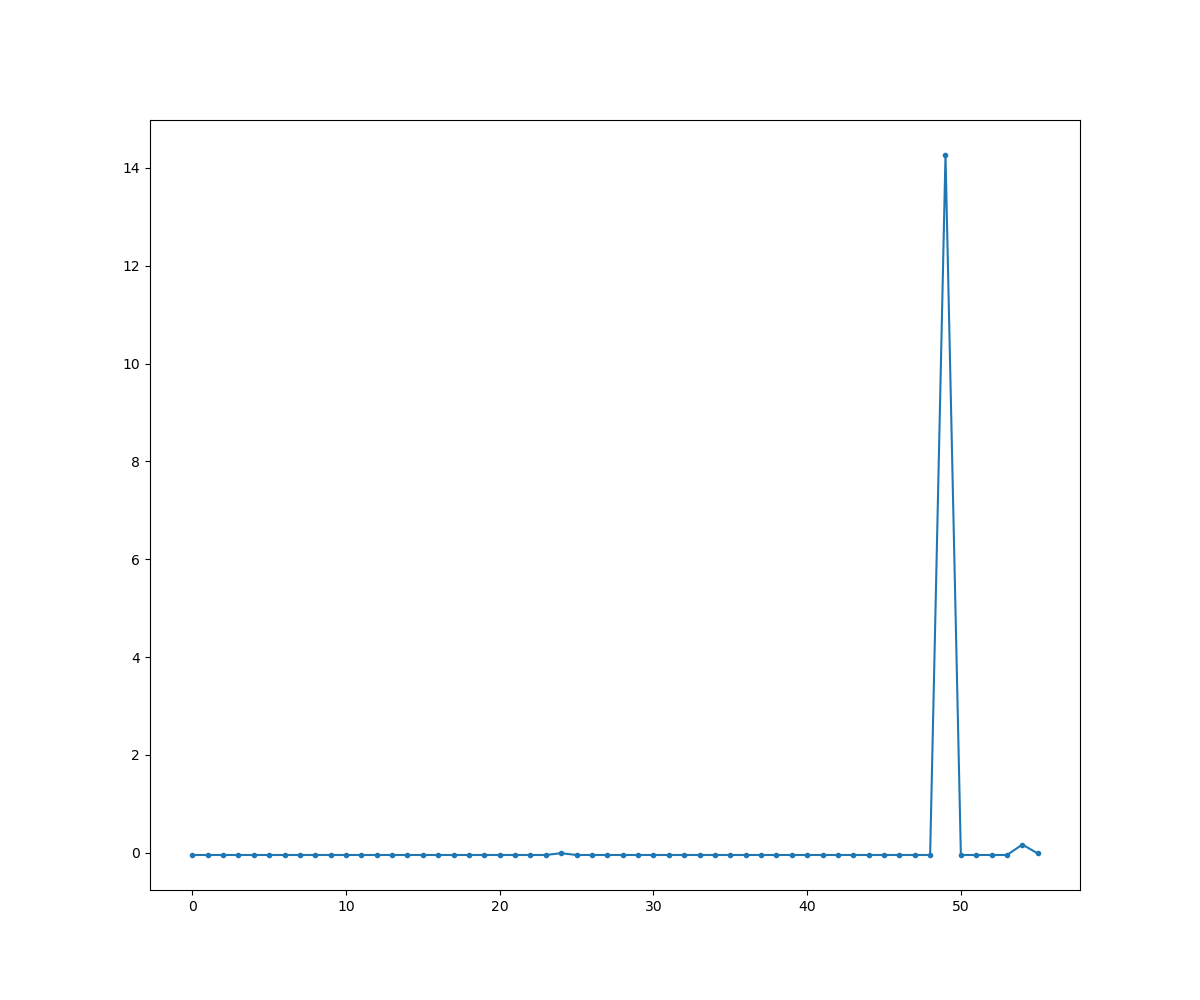

In [1092]:
fig,ax = plt.subplots(figsize = (12,10))
ax.plot(np.array(amy_avgs.loc['Chat']), '.-')
#ax.set_xticklabels(xticks)
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")
plt.show()

## Vglut1 Analysis <a name="vglut1_analysis"></a>

In [320]:
all_cell_classes

['Astro',
 'Astro_SC',
 'Astro_agt',
 'COP',
 'EC',
 'Epend',
 'GABA',
 'OL',
 'OPC',
 'OPC_cycling',
 'Peri',
 'VGLUT1',
 'VGLUT2',
 'VLMC',
 'VSM',
 'microglia',
 'pvm']

### Process VGLUT1 Amy data

removing # duplicate gene rows:  65
removing  53  genes found in  ['Btg2', 'Jun', 'Egr4', 'Fosb', 'Junb', 'Gadd45g', 'Fos', 'Arc', 'Nr4a1', 'Npas4', 'Coq10b', 'Tns1', 'Per2', 'Ptgs2', 'Rnd3', 'Tnfaip6', 'Srxn1', 'Tiparp', 'Ccnl1', 'Mcl1', 'Dnajb5', 'Nr4a3', 'Fosl2', 'Nptx2', 'Rasl11a', 'Mest', 'Sertad1', 'Egr2', 'Midn', 'Gadd45b', 'Dusp6', 'Irs2', 'Plat', 'Ier2', 'Rrad', 'Tpbg', 'Csrnp1', 'Peli1', 'Per1', 'Kdm6b', 'Inhba', 'Plk2', 'Ifrd1', 'Baz1a', 'Trib1', 'Pim3', 'Lrrk2', 'Dusp1', 'Cdkn1a', 'Pim1', 'Sik1', 'Frat2', 'Dusp5']
removing  6  genes found in  ['Xist', 'Tsix', 'Ddx3y', 'Eif2s3y', 'Kdm5d', 'Uty']
Total genes reduced from 27874 to 13757


<IPython.core.display.Javascript object>


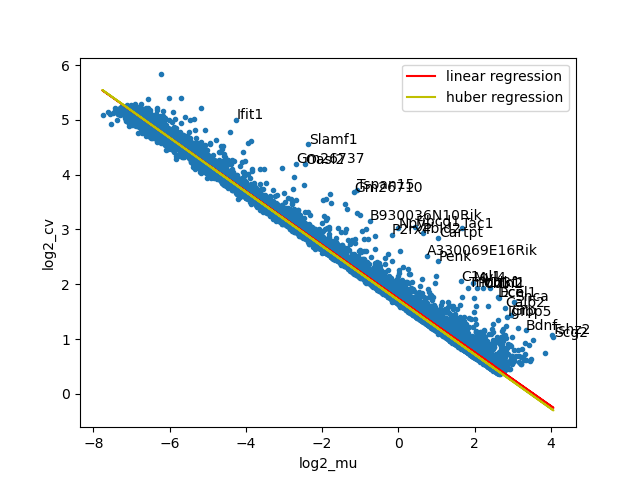

<IPython.core.display.Javascript object>


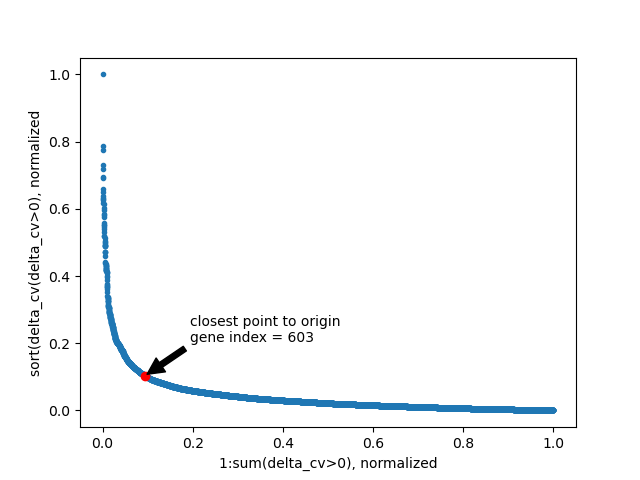

column (gene) mean after standardization: 0.00
column (gene) sigma after standardization: 1.00


In [432]:
amy_df_VGLUT1_expr_ge_cv_ls, amy_metadata_df_VGLUT1 = cc.process_amy_data_class(amy_df,amy_metadata_df,IEG_list,sex_gene_list,cell_class='VGLUT1')

In [433]:
amy_df_VGLUT1_expr_ge_cv_ls.shape

(603, 11947)

In [434]:
today

'2024-08-24'

In [436]:
#save to file

folder = '/bigdata/isaac/Vglut1_files/'

file1 = 'amy_df_VGLUT1_expr_ge_cv_ls_orig' 
file2 = 'amy_metadata_df_VGLUT1_orig' 

#amy_df_VGLUT1_expr_ge_cv_ls.to_feather(folder+file1+'.feather')
#amy_metadata_df_VGLUT1.to_json(folder+file2+'.json')

In [350]:
folder = '/bigdata/isaac/Vglut1_files/'
amy_df_VGLUT1_expr_ge_cv_ls_orig = pd.read_feather(folder + 'amy_df_VGLUT1_expr_ge_cv_ls_orig.feather')
amy_metadata_df_VGLUT1_orig = pd.read_json(folder + 'amy_metadata_df_VGLUT1_orig.json')

In [809]:
amy_df_VGLUT1_expr_ge_cv_ls_orig

AGAGAATCAATCCTAG-1_08-1  CGATGCGCAGTGGCTC-1_08-1  \
cellID                                                       
Tac1                    -0.244471                -0.244471   
Xist                    -0.234641                -0.234641   
Slamf1                  -0.105871                -0.105871   
Cartpt                  -0.260137                -0.260137   
Fibcd1                  -0.200757                -0.200757   
...                           ...                      ...   
Mgat5b                   1.238385                -0.787189   
Cdc42ep3                -0.402102                -0.402102   
Gm28075                 -0.038868                -0.038868   
Dpy19l3                 -0.540816                -0.540816   
Sema3d                  -0.140158                -0.140158   

          GAGAGGTTCGCGTCGA-1_08-1  GCCAGGTTCACTTCTA-1_08-1  \
cellID                                                       
Tac1                    -0.244471                -0.244471   
Xist                    -0.234641                -0.234641   
Slamf1                  -0.105871                -0.105871   
Cartpt                  -0.260137                -0.260137   
Fibcd1                  -0.200757                -0.200757   
...                           ...                      ...   
Mgat5b                   2.056063                -0.787189   
Cdc42ep3                -0.402102                -0.402102   
Gm28075                 -0.038868                -0.038868   
Dpy19l3                 -0.540816                -0.540816   
Sema3d                  -0.140158                -0.140158   

          GGGCTCAAGCTGGCCT-1_08-1  GTTACCCAGCACACCC-1_08-1  \
cellID                                                       
Tac1                    -0.244471                -0.244471   
Xist                    -0.234641                -0.234641   
Slamf1                  -0.105871                -0.105871   
Cartpt                   4.922390                -0.260137   
Fibcd1                  -0.200757                -0.200757   
...                           ...                      ...   
Mgat5b                   1.238385                 1.238385   
Cdc42ep3                -0.402102                -0.402102   
Gm28075                 -0.038868                21.677573   
Dpy19l3                  1.474359                -0.540816   
Sema3d                  -0.140158                -0.140158   

          TTATTGCGTATGACAA-1_08-1  AACACACAGACGCCAA-1_10-1  \
cellID                                                       
Tac1                    -0.244471                -0.244471   
Xist                    -0.234641                 5.183820   
Slamf1                  -0.105871                -0.105871   
Cartpt                  -0.260137                -0.260137   
Fibcd1                  -0.200757                -0.200757   
...                           ...                      ...   
Mgat5b                  -0.787189                -0.787189   
Cdc42ep3                 2.068810                -0.402102   
Gm28075                 -0.038868                -0.038868   
Dpy19l3                 -0.540816                 2.002052   
Sema3d                  -0.140158                -0.140158   

          ACAAAGATCTCATGGA-1_10-1  AGGTGTTAGCAAGGAA-1_10-1  ...  \
cellID                                                      ...   
Tac1                    -0.244471                -0.244471  ...   
Xist                     1.830350                 3.895341  ...   
Slamf1                  -0.105871                -0.105871  ...   
Cartpt                  -0.260137                -0.260137  ...   
Fibcd1                  -0.200757                -0.200757  ...   
...                           ...                      ...  ...   
Mgat5b                   1.238385                -0.787189  ...   
Cdc42ep3                -0.402102                -0.402102  ...   
Gm28075                 -0.038868                -0.038868  ...   
Dpy19l3                 -0.540816            

### Load VGLUT1 SD data

In [324]:
folder

'/bigdata/isaac/Vglut1_files/'

In [802]:
folder = '/bigdata/isaac/Vglut1_files/'

#VGLUT1_meta_data_df_plis = pd.read_json(folder + 'Vglut1_meta_data_df_plis2024-08-21.json')

VGLUT1_df_prelinkage_ls_orig = pd.read_feather(folder + 'Vglut1_df_pre_linkage_ls_2024-08-21.feather')
#VGLUT1_metadata_df_prelinkage_ls_orig = pd.read_json(folder + 'Vglut1_meta_data_df_pre_linkage_2024-08-21.json')
VGLUT1_meta_data_df_plis_filtered = pd.read_json(folder + 'Vglut1meta_data_df_plis_filtered_2024-08-29.json')


In [810]:
VGLUT1_df_plis_filtered = VGLUT1_df_prelinkage_ls_orig.reindex(index = VGLUT1_meta_data_df_plis_filtered.columns)

In [812]:
VGLUT1_df_plis_filtered

gene                          S100a3     Loxl2       Avp   Gm26737      Snca  \
AGGTTACTCCATCTGC-1_10X51_1 -0.060873 -0.097924 -0.279639 -0.092088 -0.104791   
GACCCTTAGGGACCAT-1_10X51_1 -0.060873 -0.097924 -0.279639 -0.092088 -0.104791   
CAGTGCGTCTCAGTCC-1_10X51_2 -0.060873 -0.097924 -0.279639 -0.092088 -0.104791   
TTGGGCGCAGAGGTAC-1_10X36_2 -0.060873 -0.097924 -0.279639 -0.092088 -0.104791   
AGTACTGCAACCGCTG-1_10X51_2 -0.060873 -0.097924 -0.279639 -0.092088 -0.104791   
...                              ...       ...       ...       ...       ...   
AGGACGAGTCTGTAAC-1_10X38_1 -0.060873 -0.097924  2.972951 -0.092088 -0.104791   
AGTCATGGTTCAAAGA-1_10X52_3 -0.060873 -0.097924 -0.279639 -0.092088 -0.104791   
CGTGATAAGCACTCGC-1_10X51_3 -0.060873 -0.097924 -0.279639 -0.092088 -0.104791   
TTCTAGTGTTTACGTG-1_10X52_1 -0.060873 -0.097924 -0.279639 -0.092088 -0.104791   
ATCCTATGTTCAATCG-1_10X38_2 -0.060873 -0.097924 -0.279639 -0.092088 -0.104791   

gene                          Cx3cr1   Gm15124      Mcm8    Cartpt       Grp  \
AGGTTACTCCATCTGC-1_10X51_1 -0.080927 -0.128169 -0.240404 -0.226919 -0.218716   
GACCCTTAGGGACCAT-1_10X51_1 -0.080927 -0.128169 -0.240404 -0.226919 -0.218716   
CAGTGCGTCTCAGTCC-1_10X51_2 -0.080927 -0.128169 -0.240404 -0.226919 -0.218716   
TTGGGCGCAGAGGTAC-1_10X36_2 -0.080927 -0.128169 -0.240404 -0.226919 -0.218716   
AGTACTGCAACCGCTG-1_10X51_2 -0.080927 -0.128169 -0.240404 -0.226919 -0.218716   
...                              ...       ...       ...       ...       ...   
AGGACGAGTCTGTAAC-1_10X38_1 -0.080927 -0.128169 -0.240404 -0.226919 -0.218716   
AGTCATGGTTCAAAGA-1_10X52_3 -0.080927 -0.128169 -0.240404 -0.226919 -0.218716   
CGTGATAAGCACTCGC-1_10X51_3 -0.080927 -0.128169 -0.240404 -0.226919 -0.218716   
TTCTAGTGTTTACGTG-1_10X52_1 -0.080927 -0.128169 -0.240404 -0.226919 -0.218716   
ATCCTATGTTCAATCG-1_10X38_2 -0.080927 -0.128169 -0.240404 -0.226919 -0.218716   

gene                        ...      Gpsm3     Itpr1   Ppp1r3b     Ptcra  \
AGGTTACTCCATCTGC-1_10X51_1  ...  -0.064748 -0.780670 -0.055517 -0.123987   
GACCCTTAGGGACCAT-1_10X51_1  ...  -0.064748 -0.780670 -0.055517 -0.123987   
CAGTGCGTCTCAGTCC-1_10X51_2  ...  -0.064748 -0.780670 -0.055517 -0.123987   
TTGGGCGCAGAGGTAC-1_10X36_2  ...  -0.064748 -0.780670 -0.055517 -0.123987   
AGTACTGCAACCGCTG-1_10X51_2  ...  -0.064748 -0.780670 -0.055517 -0.123987   
...                         ...        ...       ...       ...       ...   
AGGACGAGTCTGTAAC-1_10X38_1  ...  14.623429  0.588399 -0.055517 -0.123987   
AGTCATGGTTCAAAGA-1_10X52_3  ...  -0.064748  0.588399 -0.055517 -0.123987   
CGTGATAAGCACTCGC-1_10X51_3  ...  -0.064748 -0.780670 -0.055517 -0.123987   
TTCTAGTGTTTACGTG-1_10X52_1  ...  -0.064748  0.588399 -0.055517 -0.123987   
ATCCTATGTTCAATCG-1_10X38_2  ...  -0.064748  0.588399 -0.055517 -0.123987   

gene                            Ier3     Llgl2   Dlx6os1      Acan       Nhs  \
AGGTTACTCCATCTGC-1_10X51_1 -0.263428 -0.135938 -0.080606 -0.090912 -0.299721   
GACCCTTAGGGACCAT-1_10X51_1  3.223543 -0.135938 -0.080606 -0.090912 -0.299721   
CAGTGCGTCTCAGTCC-1_10X51_2 -0.263428 -0.135938 -0.080606 -0.090912 -0.299721   
TTGGGCGCAGAGGTAC-1_10X36_2 -0.263428 -0.135938 -0.080606 -0.090912 -0.299721   
AGTACTGCAACCGCTG-1_10X51_2  3.223543 -0.135938 -0.080606 -0.090912 -0.299721   
...                              ...       ...       ...       ...       ...   
AGGACGAGTCTGTAAC-1_10X38_1 -0.263428 -0.135938 -0.080606 -0.090912 -0.299721   
AGTCATGGTTCAAAGA-1_10X52_3  3.223543 -0.135938 -0.080606 -0.090912 -0.299721   
CGTGATAAGCACTCGC-1_10X51_3 -0.263428 -0.135938 -0.080606 -0.090912 -0.299721   
TTCTAGTGTTTACGTG-1_10X52_1 -0.263428 -0.135938 -0.080606 -0.090912 -0.299721   
ATCCTATGTTCAATCG-1_10X38_2 -0.263428 -0.135938 -0.080606 -0.090912 -0.299721   

gene                           Smoc2  
AGGTTACTCCATCTGC-1_10X51_1 -0.172689  
GACCCTTAGGGACCAT-1_10X51_1 -0.172689  
CAGTGCGTCTCAGTCC-1_10X51_2 -0.172689  
TTGGGCGCAGAGGTAC-1_10X36_2 -0.172689  
AGTACTGCA

In [804]:
VGLUT1_meta_data_df_plis_filtered.shape

(29, 9550)

### Get intersection

In [690]:
lco = pd.unique(VGLUT1_meta_data_df_plis.loc['cluster_label'])
lco

array([28, 27, 17, 11, 14, 18, 19, 3, 6, 8, 12, 15, 0, 16, 5, 9, 26, 13,
       22, 21, 25, 24, 1, 10, 20, 23, 2, 7, 4], dtype=object)

In [438]:
#amy_df_VGLUT1_expr_ge_cv_ls, VGLUT1_df_prelinkage_ls = cc.get_df_gene_intersection(VGLUT1_df_prelinkage_ls_orig,amy_df_VGLUT1_expr_ge_cv_ls,IEG_list)

removing  0  genes found in  ['Btg2', 'Jun', 'Egr4', 'Fosb', 'Junb', 'Gadd45g', 'Fos', 'Arc', 'Nr4a1', 'Npas4', 'Coq10b', 'Tns1', 'Per2', 'Ptgs2', 'Rnd3', 'Tnfaip6', 'Srxn1', 'Tiparp', 'Ccnl1', 'Mcl1', 'Dnajb5', 'Nr4a3', 'Fosl2', 'Nptx2', 'Rasl11a', 'Mest', 'Sertad1', 'Egr2', 'Midn', 'Gadd45b', 'Dusp6', 'Irs2', 'Plat', 'Ier2', 'Rrad', 'Tpbg', 'Csrnp1', 'Peli1', 'Per1', 'Kdm6b', 'Inhba', 'Plk2', 'Ifrd1', 'Baz1a', 'Trib1', 'Pim3', 'Lrrk2', 'Dusp1', 'Cdkn1a', 'Pim1', 'Sik1', 'Frat2', 'Dusp5']
Index(['Tac1', 'Slamf1', 'Cartpt', 'Fibcd1', 'Pbld2', 'Tspan15', 'Snca',
       'Dlk1', 'Gm26710', 'Tshz2',
       ...
       'Emilin1', 'Hspb2', 'Vwc2', 'Fgfr1', 'Wnt5a', 'Gabrg3', 'Nhs',
       'Tmem215', 'Rims3', 'Itpr2'],
      dtype='object', length=314)


In [813]:
amy_df_VGLUT1_expr_ge_cv_ls, VGLUT1_df_plis_filtered = cc.get_df_gene_intersection(VGLUT1_df_plis_filtered,amy_df_VGLUT1_expr_ge_cv_ls,IEG_list)

removing  0  genes found in  ['Btg2', 'Jun', 'Egr4', 'Fosb', 'Junb', 'Gadd45g', 'Fos', 'Arc', 'Nr4a1', 'Npas4', 'Coq10b', 'Tns1', 'Per2', 'Ptgs2', 'Rnd3', 'Tnfaip6', 'Srxn1', 'Tiparp', 'Ccnl1', 'Mcl1', 'Dnajb5', 'Nr4a3', 'Fosl2', 'Nptx2', 'Rasl11a', 'Mest', 'Sertad1', 'Egr2', 'Midn', 'Gadd45b', 'Dusp6', 'Irs2', 'Plat', 'Ier2', 'Rrad', 'Tpbg', 'Csrnp1', 'Peli1', 'Per1', 'Kdm6b', 'Inhba', 'Plk2', 'Ifrd1', 'Baz1a', 'Trib1', 'Pim3', 'Lrrk2', 'Dusp1', 'Cdkn1a', 'Pim1', 'Sik1', 'Frat2', 'Dusp5']
Index(['Tac1', 'Slamf1', 'Cartpt', 'Fibcd1', 'Pbld2', 'Tspan15', 'Snca',
       'Dlk1', 'Gm26710', 'Tshz2',
       ...
       'Emilin1', 'Hspb2', 'Vwc2', 'Fgfr1', 'Wnt5a', 'Gabrg3', 'Nhs',
       'Tmem215', 'Rims3', 'Itpr2'],
      dtype='object', length=314)


In [814]:
amy_df_VGLUT1_expr_ge_cv_ls.shape

(314, 11947)

In [815]:
VGLUT1_df_plis_filtered.shape

(314, 9550)

In [441]:
sorted(list(amy_df_VGLUT1_expr_ge_cv_ls.index))

['1700031P21Rik',
 '2900060B14Rik',
 '9330185C12Rik',
 'A330069E16Rik',
 'A830036E02Rik',
 'AW551984',
 'Acan',
 'Ackr1',
 'Acvr1c',
 'Adcyap1',
 'Agl',
 'Aldh1a3',
 'Amigo2',
 'Angpt1',
 'Ap1s2',
 'Arhgap36',
 'Arhgap6',
 'Arhgdib',
 'Arhgef40',
 'Atf3',
 'B230312C02Rik',
 'B930036N10Rik',
 'BC026585',
 'BC030499',
 'BC048546',
 'Bace2',
 'Baiap3',
 'Batf3',
 'Bcl11a',
 'Bdnf',
 'Bok',
 'Btbd3',
 'C1ql1',
 'C1ql2',
 'C730034F03Rik',
 'Cacna2d2',
 'Calb2',
 'Car8',
 'Cartpt',
 'Cav1',
 'Cbln2',
 'Cbln4',
 'Ccnb1',
 'Cd24a',
 'Cd44',
 'Cdkn1c',
 'Cenpf',
 'Chrdl1',
 'Cited2',
 'Cntn4',
 'Cntn5',
 'Col11a1',
 'Col12a1',
 'Col1a1',
 'Col23a1',
 'Col24a1',
 'Col25a1',
 'Col27a1',
 'Col6a1',
 'Cplx3',
 'Cpne2',
 'Cpne5',
 'Crh',
 'Cryab',
 'Csf3r',
 'Ctxn3',
 'Cx3cr1',
 'Cxcl12',
 'Cxcl14',
 'Cyp26b1',
 'Dach1',
 'Dcn',
 'Dio3',
 'Diras2',
 'Dlk1',
 'Doc2b',
 'Dock10',
 'Dqx1',
 'Ecel1',
 'Ecm2',
 'Emilin1',
 'Endou',
 'Eps8',
 'Ermn',
 'Esr1',
 'Etl4',
 'Exoc1',
 'Fam46a',
 'Fam83a',
 'Fbl

### Checkpoint - save intersected data/metadata to file / load from here

In [442]:
folder

'/bigdata/isaac/Vglut1_files/'

In [443]:
#save to file

folder = '/bigdata/isaac/Vglut1_files/'

file1 = 'amy_df_VGLUT1_expr_ge_cv_ls_cell_comp' 
file2 = 'amy_metadata_df_VGLUT1_cell_comp' 

amy_df_VGLUT1_expr_ge_cv_ls.to_feather(folder+file1+'.feather')
amy_metadata_df_VGLUT1.to_json(folder+file2+'.json')

#################################

file1 = 'VGLUT1_df_prelinkage_ls_cell_comp' 
file2 = 'VGLUT1_meta_data_df_prelinkage_cell_comp' 

VGLUT1_df_prelinkage_ls.to_feather(folder+file1+'.feather')
VGLUT1_metadata_df_prelinkage_ls_orig.to_json(folder+file2+'.json')


In [52]:
#load data
folder = '/bigdata/isaac/VGLUT1_files/'

#amy_df_VGLUT1_expr_ge_cv_ls = pd.read_feather(folder + 'amy_df_VGLUT1_expr_ge_cv_ls_cell_comp.feather')
#amy_metadata_df_VGLUT1 = pd.read_json(folder + 'amy_metadata_df_VGLUT1_cell_comp.json')

#VGLUT1_df_prelinkage_ls = pd.read_feather(folder + 'VGLUT1_df_prelinkage_ls_cell_comp.feather')
#VGLUT1_meta_data_df_prelinkage = pd.read_json(folder + 'VGLUT1_meta_data_df_prelinkage_cell_comp.json' )

### Compute avg expression for all genes, for every cluster

In [1001]:
amy_avgs = dp.compute_avg_expr_per_cluster_label(amy_df_VGLUT1_expr_ge_cv_ls,amy_metadata_df_VGLUT1)

In [1002]:
amy_avgs

1         2         3         4         5         6         7   \
Tac1    -0.194167 -0.126893 -0.178076 -0.016315 -0.036845 -0.118406 -0.124385   
Slamf1  -0.105871  0.001953 -0.066666  0.052993 -0.105871  0.010102 -0.039187   
Cartpt  -0.021226 -0.123727 -0.000883  0.004818 -0.219082 -0.181355 -0.130713   
Fibcd1  -0.200757 -0.096971 -0.083385 -0.200757 -0.200757 -0.041012 -0.172215   
Pbld2   -0.081712  0.451428  0.051361  0.359408 -0.055383  0.123805  0.088671   
...           ...       ...       ...       ...       ...       ...       ...   
Gabrg3   0.143111  0.459558  0.008212 -0.115661 -0.417358  0.409043  0.560066   
Nhs      0.052265 -0.201807 -0.231616 -0.265213 -0.139388 -0.171996  0.278677   
Tmem215  -0.20894  0.404455  0.600378  0.659114 -0.187673 -0.238815  0.616408   
Rims3     0.03584  -0.20809 -0.216283 -0.181919 -0.095112 -0.117987  1.084829   
Itpr2    0.059283 -0.080312 -0.052185 -0.083864  0.006859 -0.063093 -0.027811   

               8         9         10  ...        23        24        25  \
Tac1    -0.161997 -0.079559  4.152479  ... -0.123742 -0.217711  0.004919   
Slamf1   0.125944 -0.105871 -0.105871  ... -0.005924 -0.105871 -0.016506   
Cartpt  -0.083667 -0.124451 -0.169563  ...  -0.14453  0.818864 -0.072145   
Fibcd1  -0.149736  0.496483 -0.016769  ... -0.185782 -0.200757  0.091133   
Pbld2    0.150994 -0.213967 -0.114765  ... -0.195439 -0.076586 -0.136937   
...           ...       ...       ...  ...       ...       ...       ...   
Gabrg3   0.745752 -0.405415  0.356747  ... -0.567281 -0.613648 -0.389966   
Nhs     -0.082943  0.539967 -0.214153  ...  0.025154 -0.265213  0.115833   
Tmem215 -0.206852  0.446499   0.99352  ... -0.358244 -0.411616  0.059611   
Rims3   -0.090978   0.94758  0.651262  ...  -0.04311  0.059749 -0.066852   
Itpr2   -0.099696  0.388814 -0.094099  ... -0.014974 -0.005451 -0.052392   

               26        27        28        29        30        31        32  
Tac1     4.263656 -0.096108 -0.135938 -0.244471 -0.179483 -0.128544 -0.203009  
Slamf1  -0.047439  0.043648  0.049546  0.094511  0.015168 -0.024519 -0.037588  
Cartpt  -0.089928 -0.101676 -0.166746 -0.172837 -0.260137  0.144345  -0.21274  
Fibcd1  -0.112006 -0.112697 -0.181824 -0.075747 -0.200757 -0.159702  0.054471  
Pbld2   -0.238935 -0.177578 -0.045297 -0.009962  -0.02766 -0.165691 -0.167791  
...           ...       ...       ...       ...       ...       ...       ...  
Gabrg3    0.09582 -0.193156  0.680269  0.222021   0.15227 -0.377551  -0.05809  
Nhs      0.113901  0.073143  0.007143 -0.054186  0.318324  0.248706 -0.079451  
Tmem215  0.963422 -0.064432  -0.26546 -0.072393 -0.129807 -0.067544   0.02234  
Rims3    0.648454 -0.050085  0.362177 -0.026185 -0.139134 -0.002799 -0.081028  
Itpr2    -0.03938  0.280845 -0.115906   0.48213   0.02248 -0.104733  0.141938  

[314 rows x 32 columns]

In [421]:
VGLUT1_df_prelinkage_ls.shape

(315, 10369)

In [1003]:
sd_avgs = dp.compute_avg_expr_per_cluster_label(VGLUT1_df_plis_filtered,VGLUT1_meta_data_df_plis_filtered)

In [819]:
sd_avgs

1         2         3         4         5         6         7   \
Tac1    -0.096371 -0.203812 -0.128785 -0.088291 -0.058328 -0.120016 -0.064116   
Slamf1   0.151819 -0.117678 -0.071013 -0.081061  0.004962 -0.117678 -0.012686   
Cartpt  -0.077219  1.961464 -0.152357 -0.099881  0.122446 -0.226919 -0.084758   
Fibcd1  -0.193053 -0.232025 -0.223494 -0.107613  0.449114 -0.232025 -0.218476   
Pbld2    0.357262 -0.061706 -0.177195 -0.136383 -0.003001  -0.12123 -0.034769   
...           ...       ...       ...       ...       ...       ...       ...   
Gabrg3   1.478926 -0.322647 -0.271008 -0.255009 -0.031226  -0.21774 -0.213352   
Nhs     -0.128213  1.560369  0.714317  0.387355 -0.024658 -0.124721 -0.265787   
Tmem215 -0.058926  0.066053  0.037052 -0.091517  -0.20144 -0.059545 -0.223587   
Rims3   -0.109146 -0.298423 -0.237889 -0.212924 -0.228668 -0.298423 -0.219108   
Itpr2   -0.098872  0.897242  1.418392  0.202369  0.027337 -0.162291 -0.126337   

               8         9         10  ...        13        14        15  \
Tac1    -0.083966 -0.074248 -0.016609  ... -0.043609   1.28618  0.004949   
Slamf1  -0.023074 -0.037092  0.119507  ... -0.017217  0.161074  0.252833   
Cartpt  -0.101595  0.394353  0.023777  ... -0.078759  0.366756 -0.068677   
Fibcd1   0.582846 -0.148495 -0.193001  ... -0.192073 -0.061643 -0.200538   
Pbld2   -0.034348  0.012313 -0.077536  ... -0.110454  0.022744   0.53304   
...           ...       ...       ...  ...       ...       ...       ...   
Gabrg3  -0.218246 -0.285432 -0.306217  ...  0.909307  0.935079  1.511242   
Nhs     -0.246684 -0.243329 -0.299721  ...  0.854816  0.792793  0.360712   
Tmem215  -0.09838 -0.234701 -0.131028  ...  0.563962  0.727548  2.352586   
Rims3   -0.248727 -0.267062 -0.261501  ...  2.003608  1.529063  1.617096   
Itpr2   -0.132015 -0.162291 -0.099763  ...   0.03785  0.056847 -0.138417   

               16        17        18        19        20        21        22  
Tac1    -0.203812 -0.033596 -0.040876  0.148131 -0.053088 -0.054177   -0.0705  
Slamf1  -0.117678 -0.033012 -0.117678  0.149866 -0.033431  0.087075  0.186349  
Cartpt  -0.118502 -0.095172  0.176751  0.033282  0.103509 -0.067612 -0.226919  
Fibcd1  -0.232025 -0.232025 -0.232025 -0.232025 -0.223408 -0.202361 -0.232025  
Pbld2    0.310322  -0.01273 -0.210516  0.274168  -0.07431 -0.032423 -0.210516  
...           ...       ...       ...       ...       ...       ...       ...  
Gabrg3  -0.322647 -0.322647 -0.322647 -0.229982 -0.295231 -0.228091 -0.322647  
Nhs      0.593509 -0.105891   0.09032  0.042359 -0.081527   0.01278  0.257098  
Tmem215  0.656652 -0.056595  0.118386   1.25249  -0.16515 -0.214299 -0.247941  
Rims3   -0.298423 -0.015557 -0.226118 -0.090185   -0.0335 -0.139057 -0.110895  
Itpr2    0.301255 -0.162291   0.14674 -0.162291 -0.077258  -0.10553 -0.162291  

[314 rows x 22 columns]

In [1005]:
heatmap2, heatmap_argmax_df_alt_lco, corr_matrix_manual_alt_lco, corr_matrix_manual_alt_lco_sorted = cc.plot_correlation(sd_avgs,amy_avgs)
# Display the plot
hvplot.show(heatmap2)
    
# Ensure output is displayed inline
hv.output(heatmap2, backend='bokeh')

Launching server at http://localhost:35191


:HeatMap   [columns,index]   (value)

In [1006]:
error_genes,all_marker_labels = cc.amy_gene_spell_checker(amy_df_VGLUT1_expr_ge_cv_ls_orig,amy_metadata_df_VGLUT1)
error_genes

/home/isaac/analysis/scRNA-seq/cell_comparison.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_m = [amy_metadata_df.loc['markers'][x] for x in range((amy_metadata_df.loc['markers'].shape[0]))]


gene,  Zic4 not found in index


['Zic4']

In [1007]:
all_marker_labels

[['Bok', 'Pamr1'],
 ['Car12', 'Celsr1'],
 ['Cartpt', 'Fam46a'],
 ['Cbln1', 'Coch'],
 ['Cd36', 'Calb2'],
 ['Dcn', 'C1ql2'],
 ['Eps8', 'Cd44'],
 ['Ermn', 'Mpped1'],
 ['Fbln1', 'Il33'],
 ['Fibcd1', 'Vit'],
 ['Fmo1', 'Rxfp3'],
 ['Gpr101', 'Grem1'],
 ['Gpx3', 'Rxfp1'],
 ['Grp', 'Cpne8'],
 ['Gsg1l', 'Prox1'],
 ['Igfn1', 'Ndst4'],
 ['Mid1', 'Cdh22'],
 ['Oasl2', 'Ifit1'],
 ['Plcxd3', 'Reln'],
 ['Rspo2', 'Sema3e'],
 ['Sema5a', 'Dcn'],
 ['Sim1', 'C1ql1'],
 ['St8sia2', 'Cald1'],
 ['Tac1', 'Igfbp5'],
 ['Thrsp', 'Lamp5'],
 ['Trh', 'Kit'],
 ['Trh', 'Mdga1'],
 ['Trh', 'Medag'],
 ['Trh', 'Rxfp1'],
 ['Trh', 'Slc23a3'],
 ['Wfs1', 'Sorcs3'],
 ['Zic4', 'Trp73']]

In [1018]:
folder = '/bigdata/isaac/Vglut1_files/'

In [1009]:
with open(folder + 'Vglut1_cl_mg_filtered_2024-08-29.json') as json_data:
    VGLUT1_cl_mg_dict_filtered = json.load(json_data)

In [1010]:
VGLUT1_cl_mg_dict_filtered = {int(k): v for k, v in VGLUT1_cl_mg_dict_filtered.items()}

In [1011]:
VGLUT1_cl_mg_dict_filtered

{1: ['Arhgdib', 'Sim1'],
 2: ['Gm11549',
  'Prox1',
  'Eps8',
  'Peg10',
  'Plekhg1',
  'Penk',
  'Pappa',
  'Grp',
  'Atf3'],
 3: ['Il33', 'Fbln1', 'Prox1os'],
 4: ['Cplx3', 'Fst', 'Cd44', 'Gm15261'],
 5: ['Arhgap6', 'Galnt9', 'Dlk1', 'Id4', 'Dcn', 'Mirt1', 'Meis2'],
 6: ['2410022M11Rik', 'Cd24a', 'Dio3'],
 7: ['Pde11a', 'Vgll3', 'Ecm2', 'Slc1a3', 'Rspo1'],
 8: ['Lypd6'],
 9: ['Bdnf', 'Pcdh11x', 'Abhd11os', 'Llgl2', 'C1ql2'],
 10: ['Igfbp4', 'Mgp', 'Col6a1', 'Pdlim1', 'Col25a1', 'Sox5'],
 11: ['Cpne2',
  'Adgrg6',
  'S100a16',
  'Fgf1',
  'Tspan18',
  'Smoc2',
  'Calb2',
  'Kit',
  'Col12a1'],
 12: ['Angpt1', 'Mt2', 'Tac1', 'Nxph3', 'Nhlh2', 'Cxcl12', 'Igfbpl1'],
 13: ['Sema5a',
  'Medag',
  'Stxbp6',
  'Cox6a2',
  'Sorcs1',
  'Nxph1',
  'Vwc2',
  'Tshz2',
  'Rims3'],
 14: ['Snca', 'Foxp2', 'Oprk1', 'Olfm3', 'Rgs12'],
 15: ['Spon1',
  'Tmem215',
  'Scube1',
  'Rph3a',
  'Myl4',
  'Cyp26b1',
  'Sostdc1',
  'Htr2c',
  'Ptn'],
 16: ['Rxfp1',
  'Fam3c',
  'Col23a1',
  'Pam',
  'Krt12',
  

In [1012]:
VGLUT1_df_prelinkage_ls.shape

(314, 10369)

In [1013]:
VGLUT1_cl_mg_dict_filtered.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [1014]:
sd_shared_cl_mg_dict, connector_df_alt_lco_marker_shared_top = cc.build_corr_table_shared_top(heatmap_argmax_df_alt_lco,
                                                     corr_matrix_manual_alt_lco,
                                                     all_marker_labels,
                                                     amy_metadata_df_VGLUT1,
                                                     VGLUT1_cl_mg_dict_filtered)

In [1015]:
sd_shared_cl_mg_dict

{'1': ['Sim1', 'Arhgdib'],
 '3': ['Il33', 'Fbln1'],
 '4': ['Cd44', 'Cplx3'],
 '5': ['Dcn', 'Arhgap6'],
 '12': ['Tac1', 'Angpt1'],
 '21': ['Reln', 'BC048546']}

In [1016]:
VGLUT1_mg_cl_dict_final = cc.create_mg_cl_dict_final(VGLUT1_cl_mg_dict_filtered,sd_shared_cl_mg_dict)

In [1017]:
VGLUT1_mg_cl_dict_final

{1: ['Sim1', 'Arhgdib'],
 2: ['Gm11549', 'Prox1'],
 3: ['Il33', 'Fbln1'],
 4: ['Cd44', 'Cplx3'],
 5: ['Dcn', 'Arhgap6'],
 6: ['2410022M11Rik', 'Cd24a'],
 7: ['Pde11a', 'Vgll3'],
 8: ['Lypd6'],
 9: ['Bdnf', 'Pcdh11x'],
 10: ['Igfbp4', 'Mgp'],
 11: ['Cpne2', 'Adgrg6'],
 12: ['Tac1', 'Angpt1'],
 13: ['Sema5a', 'Medag'],
 14: ['Snca', 'Foxp2'],
 15: ['Spon1', 'Tmem215'],
 16: ['Rxfp1', 'Fam3c'],
 17: ['Moxd1'],
 18: ['Nppc', 'Plk5'],
 19: ['Rnf152', 'Ecel1'],
 20: ['Rab3b'],
 21: ['Reln', 'BC048546'],
 22: ['Gfod2']}

In [868]:
VGLUT1_mg_cl_dict_final.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [1019]:
list(VGLUT1_mg_cl_dict_final.values())

[['Sim1', 'Arhgdib'],
 ['Gm11549', 'Prox1'],
 ['Il33', 'Fbln1'],
 ['Cd44', 'Cplx3'],
 ['Dcn', 'Arhgap6'],
 ['2410022M11Rik', 'Cd24a'],
 ['Pde11a', 'Vgll3'],
 ['Lypd6'],
 ['Bdnf', 'Pcdh11x'],
 ['Igfbp4', 'Mgp'],
 ['Cpne2', 'Adgrg6'],
 ['Tac1', 'Angpt1'],
 ['Sema5a', 'Medag'],
 ['Snca', 'Foxp2'],
 ['Spon1', 'Tmem215'],
 ['Rxfp1', 'Fam3c'],
 ['Moxd1'],
 ['Nppc', 'Plk5'],
 ['Rnf152', 'Ecel1'],
 ['Rab3b'],
 ['Reln', 'BC048546'],
 ['Gfod2']]

In [1020]:
sd_labels_df = cc.generate_sd_labels_df(VGLUT1_mg_cl_dict_final)

In [1021]:
sd_labels_df

lco_index                sd_label      sd_label_complete
0           1         [Sim1, Arhgdib]         1 Sim1-Arhgdib
1           2        [Gm11549, Prox1]        2 Gm11549-Prox1
2           3           [Il33, Fbln1]           3 Il33-Fbln1
3           4           [Cd44, Cplx3]           4 Cd44-Cplx3
4           5          [Dcn, Arhgap6]          5 Dcn-Arhgap6
5           6  [2410022M11Rik, Cd24a]  6 2410022M11Rik-Cd24a
6           7         [Pde11a, Vgll3]         7 Pde11a-Vgll3
7           8                 [Lypd6]                8 Lypd6
8           9         [Bdnf, Pcdh11x]         9 Bdnf-Pcdh11x
9          10           [Igfbp4, Mgp]          10 Igfbp4-Mgp
10         11         [Cpne2, Adgrg6]        11 Cpne2-Adgrg6
11         12          [Tac1, Angpt1]         12 Tac1-Angpt1
12         13         [Sema5a, Medag]        13 Sema5a-Medag
13         14           [Snca, Foxp2]          14 Snca-Foxp2
14         15        [Spon1, Tmem215]       15 Spon1-Tmem215
15         16          [Rxfp1, Fam3c]         16 Rxfp1-Fam3c
16         17                 [Moxd1]               17 Moxd1
17         18            [Nppc, Plk5]           18 Nppc-Plk5
18         19         [Rnf152, Ecel1]        19 Rnf152-Ecel1
19         20                 [Rab3b]               20 Rab3b
20         21        [Reln, BC048546]       21 Reln-BC048546
21         22                 [Gfod2]               22 Gfod2

In [1022]:
amy_labels_df,amy_labels = cc.generate_amy_labels_df(connector_df_alt_lco_marker_shared_top,corr_matrix_manual_alt_lco)

In [1023]:
amy_labels_df

0
1       1 Zic4-Trp73
2     2 Rspo2-Sema3e
3       3 Sema5a-Dcn
4      4 Wfs1-Sorcs3
5       5 Cbln1-Coch
6      6 Thrsp-Lamp5
7        7 Bok-Pamr1
8       8 Sim1-C1ql1
9       9 Gpx3-Rxfp1
10    10 Ermn-Mpped1
11     11 Cd36-Calb2
12   12 Gpr101-Grem1
13      13 Dcn-C1ql2
14  14 Cartpt-Fam46a
15     15 Fmo1-Rxfp3
16     16 Fbln1-Il33
17      17 Eps8-Cd44
18     18 Fibcd1-Vit
19   19 Car12-Celsr1
20      20 Trh-Mdga1
21      21 Trh-Rxfp1
22      22 Trh-Medag
23        23 Trh-Kit
24    24 Trh-Slc23a3
25    25 Plcxd3-Reln
26    26 Tac1-Igfbp5
27    27 Oasl2-Ifit1
28      28 Grp-Cpne8
29  29 St8sia2-Cald1
30    30 Gsg1l-Prox1
31    31 Igfn1-Ndst4
32     32 Mid1-Cdh22

In [473]:
##update corr plot with dropped/merged clusters (from dimorph_processing.py)

In [1024]:
folder

'/bigdata/isaac/Vglut1_files/'

In [1025]:
folder = '/bigdata/isaac/Vglut1_files/'
cc.plot_correlation_w_labels(corr_matrix_manual_alt_lco_sorted,sd_labels_df,amy_labels_df, folder, 'VGLUT1_filtered_merged',savefig=True)

Launching server at http://localhost:41505


:HeatMap   [columns,index]   (value)

In [1027]:
today

'2024-08-28'

In [740]:
#write labels df's to file

In [1028]:
folder = '/bigdata/isaac/Vglut1_files/'
sd_labels_df.to_csv(folder + 'VGLUT1_sd_labels_df_' + today + '.csv')
amy_labels_df.to_csv(folder + 'VGLUT1_amy_labels_df_' + today + '.csv')

In [770]:
folder

'/bigdata/isaac/Vglut1_files/'

In [1029]:
folder = '/bigdata/isaac/Vglut1_files/'
file = 'VGLUT1_mg_cl_dict_final_' + today
#write dict to file
with open(folder+file+'.json', "w") as outfile: 
    json.dump(VGLUT1_mg_cl_dict_final, outfile)

In [493]:
VGLUT1_meta_data_df_plis.shape

(29, 10369)

In [903]:
list(sd_labels_df['sd_label_complete'])

['1 Arhgdib-Sim1',
 '2 Gm11549-Prox1',
 '3 Il33-Fbln1',
 '4 Cplx3-Fst',
 '5 Arhgap6-Galnt9',
 '6 2410022M11Rik-Cd24a',
 '7 Pde11a-Vgll3',
 '8 Lypd6',
 '9 Bdnf-Pcdh11x',
 '10 Igfbp4-Mgp',
 '11 Cpne2-Adgrg6',
 '12 Angpt1-Mt2',
 '13 Sema5a-Medag',
 '14 Snca-Foxp2',
 '15 Spon1-Tmem215',
 '16 Rxfp1-Fam3c',
 '17 Moxd1',
 '18 Nppc-Plk5',
 '19 Rnf152-Ecel1',
 '20 Rab3b',
 '21 BC048546-Reln',
 '22 Gfod2']

In [906]:
folder

'/bigdata/isaac/Vglut1_files/'

<IPython.core.display.Javascript object>


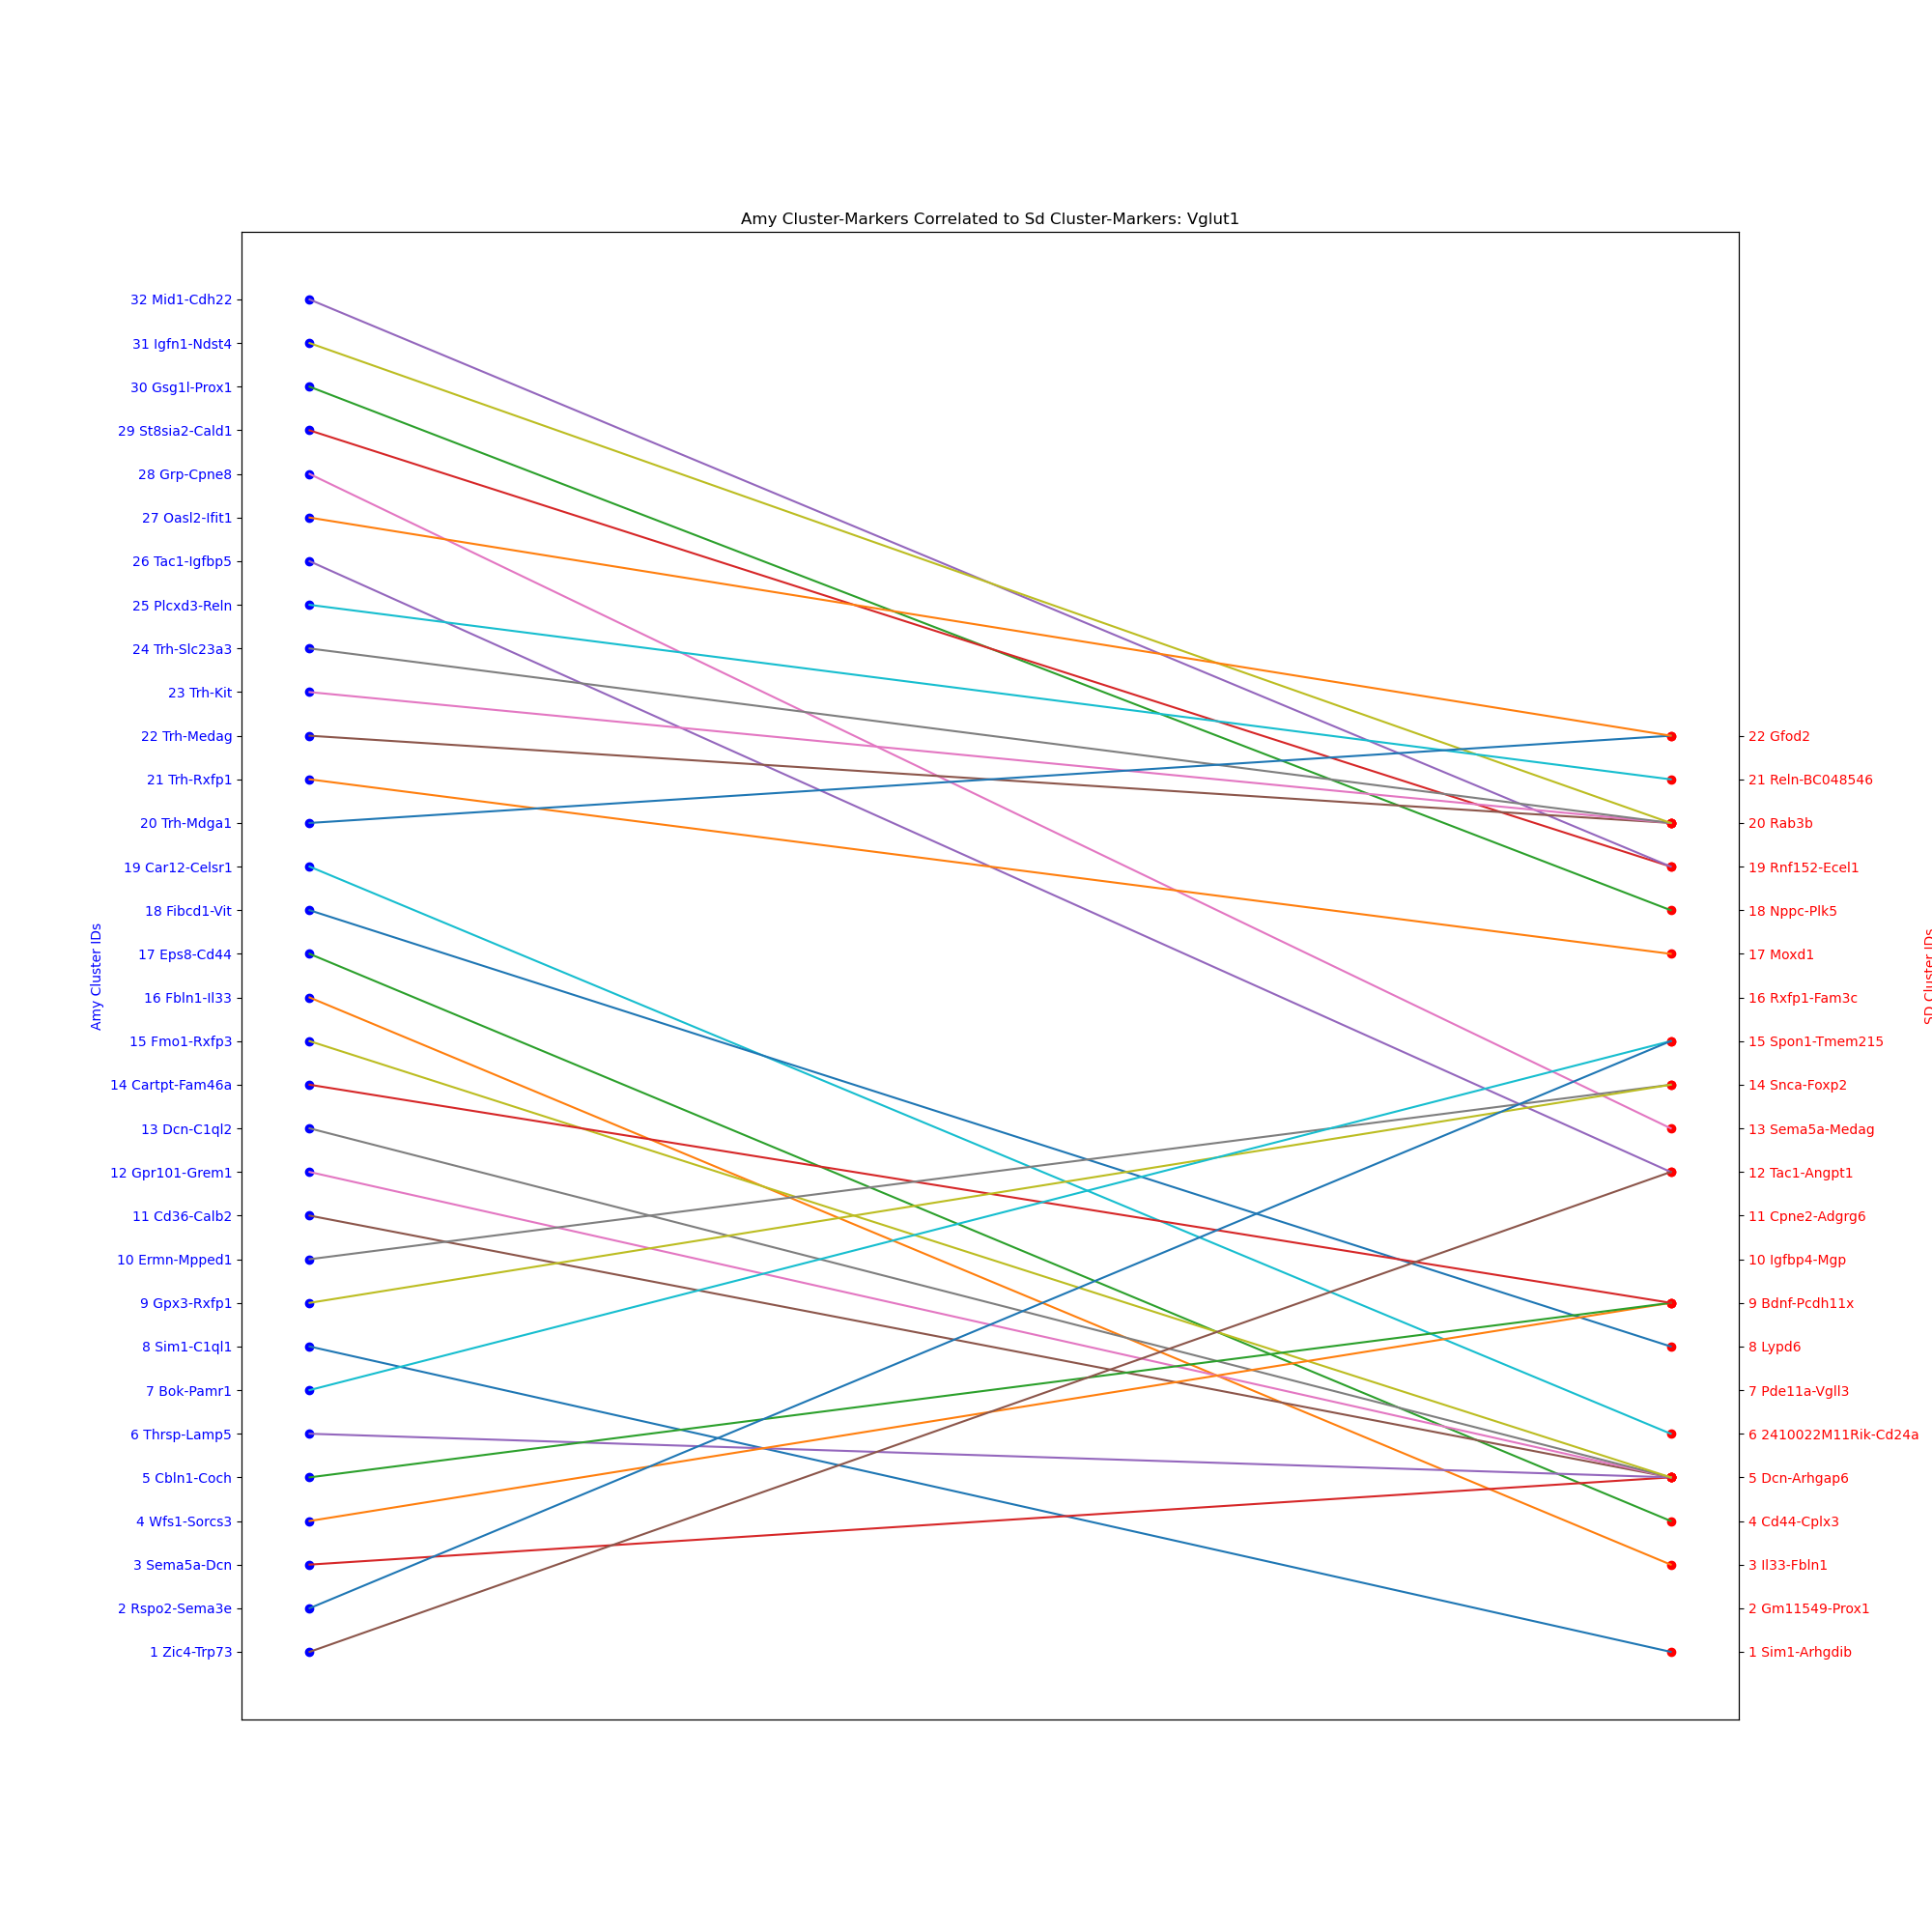

In [1030]:
cc.plot_connector_plot_with_labels(connector_df_alt_lco_marker_shared_top,VGLUT1_mg_cl_dict_final,list(sd_labels_df['sd_label_complete']),amy_labels, folder,'Vglut1',savefig = True)

## Vglut2 Analysis <a name="vglut2_analysis"></a>

### Process VGLUT1 Amy data

removing # duplicate gene rows:  65
removing  53  genes found in  ['Btg2', 'Jun', 'Egr4', 'Fosb', 'Junb', 'Gadd45g', 'Fos', 'Arc', 'Nr4a1', 'Npas4', 'Coq10b', 'Tns1', 'Per2', 'Ptgs2', 'Rnd3', 'Tnfaip6', 'Srxn1', 'Tiparp', 'Ccnl1', 'Mcl1', 'Dnajb5', 'Nr4a3', 'Fosl2', 'Nptx2', 'Rasl11a', 'Mest', 'Sertad1', 'Egr2', 'Midn', 'Gadd45b', 'Dusp6', 'Irs2', 'Plat', 'Ier2', 'Rrad', 'Tpbg', 'Csrnp1', 'Peli1', 'Per1', 'Kdm6b', 'Inhba', 'Plk2', 'Ifrd1', 'Baz1a', 'Trib1', 'Pim3', 'Lrrk2', 'Dusp1', 'Cdkn1a', 'Pim1', 'Sik1', 'Frat2', 'Dusp5']
removing  6  genes found in  ['Xist', 'Tsix', 'Ddx3y', 'Eif2s3y', 'Kdm5d', 'Uty']
Total genes reduced from 27874 to 12720


<IPython.core.display.Javascript object>


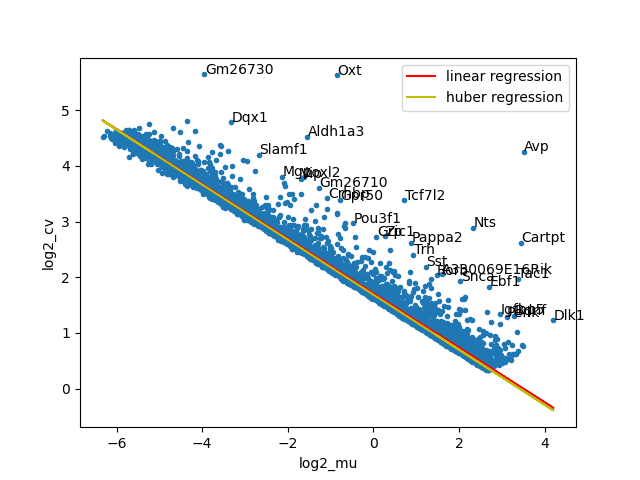

<IPython.core.display.Javascript object>


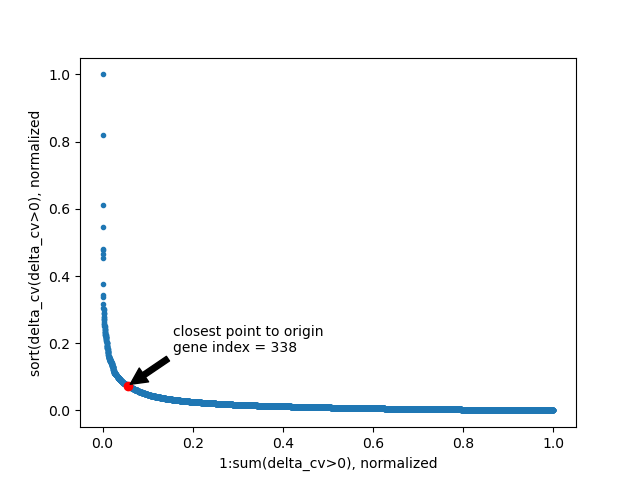

column (gene) mean after standardization: 0.00
column (gene) sigma after standardization: 1.00


In [494]:
amy_df_VGLUT2_expr_ge_cv_ls, amy_metadata_df_VGLUT2 = cc.process_amy_data_class(amy_df,amy_metadata_df,IEG_list,sex_gene_list,cell_class='VGLUT2')

In [495]:
amy_df_VGLUT2_expr_ge_cv_ls.shape

(338, 5231)

In [496]:
today

'2024-08-27'

In [497]:
#save to file

folder = '/bigdata/isaac/Vglut2_files/'

file1 = 'amy_df_VGLUT2_expr_ge_cv_ls_orig' 
file2 = 'amy_metadata_df_VGLUT2_orig' 

amy_df_VGLUT2_expr_ge_cv_ls.to_feather(folder+file1+'.feather')
amy_metadata_df_VGLUT2.to_json(folder+file2+'.json')

In [909]:
folder = '/bigdata/isaac/Vglut2_files/'
amy_df_VGLUT2_expr_ge_cv_ls_orig = pd.read_feather(folder + 'amy_df_VGLUT2_expr_ge_cv_ls_orig.feather')
amy_metadata_df_VGLUT2_orig = pd.read_json(folder + 'amy_metadata_df_VGLUT2_orig.json')

### Load VGLUT2 SD data

In [499]:
folder

'/bigdata/isaac/Vglut2_files/'

In [928]:
folder = '/bigdata/isaac/Vglut2_files/'

VGLUT2_df_prelinkage_ls_orig = pd.read_feather(folder + 'Vglut2_df_pre_linkage_ls_2024-09-01.feather')
VGLUT2_metadata_df_prelinkage_ls_orig = pd.read_json(folder + 'Vglut2_meta_data_df_pre_linkage_2024-09-01.json')
VGLUT2_meta_data_df_plis_filtered = pd.read_json(folder + 'Vglut2meta_data_df_plis_filtered_2024-09-01.json')


In [922]:
VGLUT2_df_plis_filtered = VGLUT2_df_prelinkage_ls_orig.reindex(index = VGLUT2_meta_data_df_plis_filtered.columns)

### Get intersection

In [501]:
lco = pd.unique(VGLUT2_meta_data_df_plis.loc['cluster_label'])
lco

array([18, 15, 25, 24, 12, 16, 5, 10, 7, 0, 21, 13, 14, 22, 8, 1, 4, 3, 6,
       2, 9, 19, 20, 23, 11, 17], dtype=object)

In [942]:
amy_df_VGLUT2_expr_ge_cv_ls, VGLUT2_df_plis_filtered = cc.get_df_gene_intersection(VGLUT2_df_plis_filtered,amy_df_VGLUT2_expr_ge_cv_ls,IEG_list)

removing  0  genes found in  ['Btg2', 'Jun', 'Egr4', 'Fosb', 'Junb', 'Gadd45g', 'Fos', 'Arc', 'Nr4a1', 'Npas4', 'Coq10b', 'Tns1', 'Per2', 'Ptgs2', 'Rnd3', 'Tnfaip6', 'Srxn1', 'Tiparp', 'Ccnl1', 'Mcl1', 'Dnajb5', 'Nr4a3', 'Fosl2', 'Nptx2', 'Rasl11a', 'Mest', 'Sertad1', 'Egr2', 'Midn', 'Gadd45b', 'Dusp6', 'Irs2', 'Plat', 'Ier2', 'Rrad', 'Tpbg', 'Csrnp1', 'Peli1', 'Per1', 'Kdm6b', 'Inhba', 'Plk2', 'Ifrd1', 'Baz1a', 'Trib1', 'Pim3', 'Lrrk2', 'Dusp1', 'Cdkn1a', 'Pim1', 'Sik1', 'Frat2', 'Dusp5']
Index(['Avp', 'Oxt', 'Cartpt', 'Nts', 'Aldh1a3', 'Tcf7l2', 'Gm26730', 'Tac1',
       'Dlk1', 'Ebf1',
       ...
       'Rab3b', 'Emx2', 'Pld5', 'Pax6', 'Igf1', 'Angpt1', 'Plcxd3', 'Gpc6',
       'Agl', 'Zfhx4'],
      dtype='object', length=211)


In [943]:
VGLUT2_df_plis_filtered.shape

(211, 5276)

In [924]:
amy_df_VGLUT2_expr_ge_cv_ls.shape

(211, 5231)

### Checkpoint - save intersected data/metadata to file / load from here

In [506]:
folder

'/bigdata/isaac/Vglut2_files/'

In [933]:
#save to file

folder = '/bigdata/isaac/Vglut2_files/'

filea = 'amy_df_VGLUT2_expr_ge_cv_ls_cell_comp' 
fileb = 'amy_metadata_df_VGLUT2_cell_comp' 

amy_df_VGLUT2_expr_ge_cv_ls.to_feather(folder+filea+'.feather')
amy_metadata_df_VGLUT2.to_json(folder+fileb+'.json')

#################################

filea = 'VGLUT2_df_prelinkage_ls_cell_comp' 
fileb = 'VGLUT2_meta_data_df_prelinkage_cell_comp' 

VGLUT2_df_prelinkage_ls.to_feather(folder+filea+'.feather')
VGLUT2_metadata_df_prelinkage_ls_orig.to_json(folder+fileb+'.json')


### Compute avg expression for all genes, for every cluster

In [935]:
amy_avgs = dp.compute_avg_expr_per_cluster_label(amy_df_VGLUT2_expr_ge_cv_ls,amy_metadata_df_VGLUT2)

In [936]:
amy_avgs

1         2         3         4         5         6         7   \
Avp     -0.074957 -0.083856  -0.06656 -0.051051 -0.078361 -0.056969 -0.094268   
Oxt     -0.049104 -0.053249 -0.077603 -0.012273 -0.077603 -0.077603 -0.077603   
Cartpt    0.63498 -0.242793 -0.097604 -0.224493 -0.085537 -0.148096 -0.293011   
Nts      -0.28427 -0.226141 -0.250016  -0.21925 -0.238319  -0.24635 -0.191323   
Aldh1a3  0.072111  0.050965 -0.085769  0.090257  0.134404  0.255158 -0.037875   
...           ...       ...       ...       ...       ...       ...       ...   
Angpt1  -0.287876 -0.308563 -0.256184 -0.291374 -0.318779 -0.189815  0.131889   
Plcxd3   1.164858   0.54521 -0.365467  -0.17352 -0.256397 -0.107099  0.408585   
Gpc6     1.114039  0.084834  0.770507  0.376039  0.563825  -0.04179 -0.050843   
Agl     -0.093313  0.229351 -0.062085  0.153333  0.017545  0.039397  0.143498   
Zfhx4    0.523024  0.713145  0.013332  0.646302  0.352822   0.37686  -0.09595   

               8         9         10  ...        33        34        35  \
Avp      0.004841 -0.094268 -0.056093  ... -0.094268 -0.066106 -0.054488   
Oxt      0.044878 -0.077603 -0.077603  ... -0.077603  0.054148 -0.077603   
Cartpt   0.798742 -0.222168 -0.382185  ...  0.856544 -0.268684 -0.326491   
Nts     -0.241853 -0.285121 -0.242121  ... -0.222689 -0.245339 -0.246173   
Aldh1a3 -0.013407 -0.074213 -0.125211  ... -0.125211 -0.004946 -0.000072   
...           ...       ...       ...  ...       ...       ...       ...   
Angpt1  -0.040483 -0.126554 -0.221948  ... -0.276371 -0.304962 -0.229457   
Plcxd3  -0.003676  0.486204 -0.394461  ...  0.534533 -0.116488  -0.19402   
Gpc6    -0.293494 -0.391481 -0.349388  ... -0.516973  0.059973 -0.050772   
Agl     -0.071363 -0.001362 -0.055102  ... -0.117948  0.222558 -0.020059   
Zfhx4   -0.130869  0.411312   0.97714  ...  0.003578  0.097881  1.461719   

               36        37        38        39        40        41        42  
Avp     -0.094268 -0.003613 -0.094268  0.033305 -0.022689  0.030524 -0.025886  
Oxt     -0.077603 -0.077603 -0.077603 -0.077603 -0.077603 -0.077603 -0.077603  
Cartpt  -0.410308 -0.410308 -0.374722 -0.328834 -0.238307 -0.238018  0.120074  
Nts      0.061517  1.686555  -0.06565 -0.104321 -0.232857   0.11924  0.553831  
Aldh1a3 -0.125211  0.006921 -0.024973  0.010284 -0.125211   0.11659 -0.054216  
...           ...       ...       ...       ...       ...       ...       ...  
Angpt1   0.377195  0.341955 -0.129283 -0.283625 -0.318779 -0.318779 -0.256193  
Plcxd3   -0.01967 -0.044583  1.215055  0.826795 -0.148406 -0.485876  0.742251  
Gpc6    -0.371761 -0.027412  1.219179  0.860614 -0.469255  0.168634 -0.264058  
Agl      0.188599  0.019847  0.059182 -0.010739  0.149255 -0.042172 -0.006387  
Zfhx4    0.625484  0.555454 -0.006314  0.735121 -0.175447 -0.548809 -0.479885  

[211 rows x 42 columns]

In [946]:
sd_avgs = dp.compute_avg_expr_per_cluster_label(VGLUT2_df_plis_filtered,VGLUT2_meta_data_df_plis_filtered)

In [947]:
sd_avgs

1         2         3         4         5         6         7  \
Avp     -0.117072   8.50212 -0.175117 -0.108008 -0.114807  0.003997 -0.066767   
Oxt     -0.112308  5.402613 -0.112308 -0.082253 -0.054886 -0.062216 -0.112308   
Cartpt  -0.126503 -0.263607 -0.326183 -0.323796 -0.341493   -0.1206 -0.028677   
Nts      2.921619 -0.180101 -0.145731 -0.000918 -0.213939 -0.007324 -0.155271   
Aldh1a3 -0.139155  0.176692 -0.139155 -0.036701 -0.040504   0.00573  0.192637   
...           ...       ...       ...       ...       ...       ...       ...   
Angpt1   0.941584  3.874725  3.254361  1.046694  0.573458 -0.052327  -0.11414   
Plcxd3   0.101494  0.060177   0.45432 -0.067032  0.195583   0.23526  0.404927   
Gpc6     0.338394 -0.295491 -0.357939 -0.221585 -0.165908 -0.255542  0.052512   
Agl      0.457367  0.073973 -0.241604 -0.046992 -0.027482  0.007192  0.033883   
Zfhx4    0.944902 -0.452034 -0.530871 -0.261774  0.056184  0.857757  0.129498   

                8         9        10        11        12        13        14  \
Avp     -0.077087 -0.027367 -0.072685 -0.092196 -0.100263 -0.115987 -0.084902   
Oxt     -0.039014   -0.0481 -0.060375 -0.061859 -0.053587 -0.060298 -0.112308   
Cartpt   0.114583  -0.34107  0.150258 -0.301298 -0.311876   1.32149 -0.270984   
Nts     -0.186644 -0.067271  0.037343 -0.052475 -0.206313 -0.214957  0.535446   
Aldh1a3 -0.033355 -0.058144 -0.008108  0.170008  -0.05416 -0.000238 -0.063636   
...           ...       ...       ...       ...       ...       ...       ...   
Angpt1  -0.195139 -0.007289  0.117668 -0.091426 -0.098995  -0.09267  0.397145   
Plcxd3   0.048342 -0.082475  0.247591 -0.388842 -0.446429 -0.285851 -0.217217   
Gpc6    -0.130963  0.008831  -0.26984 -0.330146 -0.140497 -0.326155 -0.385276   
Agl      0.050836  -0.21884 -0.080927 -0.015864 -0.026754   0.18191 -0.210852   
Zfhx4    1.158873  0.331536  0.013171 -0.318532 -0.059924 -0.093001 -0.369679   

               15        16        17        18        19        20  
Avp     -0.070544 -0.105992 -0.049997 -0.063081 -0.063753  -0.08014  
Oxt     -0.055349 -0.020582   -0.0038 -0.045485 -0.050353   -0.0653  
Cartpt  -0.328824 -0.163384 -0.167559  -0.05952  0.905679   -0.1718  
Nts      0.286029  0.034192  0.223432  0.894561 -0.212267 -0.236032  
Aldh1a3  -0.06729  0.068289 -0.060473 -0.017626  0.082373  0.121851  
...           ...       ...       ...       ...       ...       ...  
Angpt1   0.300167  -0.22887 -0.249914  -0.20043   -0.2658 -0.261069  
Plcxd3  -0.170668  0.158504 -0.312187  1.015286  1.658383   0.60124  
Gpc6    -0.389527 -0.200018  0.256035 -0.148674  1.523913  0.434883  
Agl     -0.010958  0.010103 -0.073585 -0.022017  0.090357  0.251886  
Zfhx4   -0.505305 -0.489701 -0.506143 -0.446221  0.619624    0.8396  

[211 rows x 20 columns]

In [949]:
heatmap2, heatmap_argmax_df_alt_lco, corr_matrix_manual_alt_lco, corr_matrix_manual_alt_lco_sorted = cc.plot_correlation(sd_avgs,amy_avgs)
# Display the plot
hvplot.show(heatmap2)
    
# Ensure output is displayed inline
hv.output(heatmap2, backend='bokeh')

Launching server at http://localhost:34325


:HeatMap   [columns,index]   (value)

In [667]:
heatmap2, heatmap_argmax_df_alt_lco, corr_matrix_manual_alt_lco, corr_matrix_manual_alt_lco_sorted = cc.plot_correlation(sd_avgs,amy_avgs,lco)
# Display the plot
hvplot.show(heatmap2)
    
# Ensure output is displayed inline
hv.output(heatmap2, backend='bokeh')

Launching server at http://localhost:46469


:HeatMap   [columns,index]   (value)

In [950]:
error_genes,all_marker_labels = cc.amy_gene_spell_checker(amy_df_VGLUT2_expr_ge_cv_ls_orig,amy_metadata_df_VGLUT2)
error_genes

/home/isaac/analysis/scRNA-seq/cell_comparison.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_m = [amy_metadata_df.loc['markers'][x] for x in range((amy_metadata_df.loc['markers'].shape[0]))]


gene,  Papp2 not found in index
gene,  Cdkn1c not found in index
gene,  Matn2 not found in index
gene,  Lxh1 not found in index
gene,  Papp2 not found in index
gene,  Skor1 not found in index


['Papp2', 'Cdkn1c', 'Matn2', 'Lxh1', 'Papp2', 'Skor1']

In [951]:
all_marker_labels_c = cc.correct_error_genes(error_genes,['Pappa2','Lhx1'],all_marker_labels)

Papp2
Papp2
Papp2
Papp2
Cdkn1c
Cdkn1c
Matn2
Matn2
Lxh1
Lxh1
Lxh1
Skor1
Skor1


In [952]:
len(all_marker_labels_c)

45

In [518]:
folder

'/bigdata/isaac/Vglut2_files/'

In [953]:
with open(folder + 'Vglut2_cl_mg_filtered_2024-09-01.json') as json_data:
    VGLUT2_cl_mg_dict_filtered = json.load(json_data)

In [954]:
VGLUT2_cl_mg_dict_filtered = {int(k): v for k, v in VGLUT2_cl_mg_dict_filtered.items()}

In [955]:
VGLUT2_cl_mg_dict_filtered

{1: ['Foxb1', 'BC048546', 'B230323A14Rik'],
 2: ['Sim1',
  'Gal',
  'Angpt1',
  'Otp',
  'Fam46a',
  'Ebf3',
  'Pou3f2',
  'Pla2r1',
  'Oxt',
  'Avp',
  'Fign',
  'Epha4',
  'C1ql2'],
 3: ['Zfhx3',
  'Gabrq',
  'Gpr101',
  'Pcdh18',
  'Trhr',
  'Adcyap1',
  'Penk',
  'Cbln1',
  'Asb4',
  'Brs3',
  'Tmem255a',
  'BC039966',
  'Gm2694',
  'Zic1'],
 4: ['Lpl', 'Zic5', 'Zic4', 'Pcdh20'],
 5: ['Pgr15l'],
 6: ['Grp', 'Tcf4', 'Emx2'],
 7: ['Tshz1', 'Noa1', 'Col12a1', 'Ppp1r17', 'Calcr'],
 8: ['Nr4a2', 'Zfhx4'],
 9: ['H2-Q2', 'Medag', 'Sst', 'Igfbp6'],
 10: ['Ebf1'],
 11: ['Hmbs', 'Cd27', 'Krt17', 'B930036N10Rik', 'Hist4h4', '2900060B14Rik'],
 12: ['Lamb3', 'Col18a1'],
 13: ['Cartpt', 'Tac1', 'Arhgap6'],
 14: ['Bhlhe22', 'Thrsp'],
 15: ['Lmo3', 'Mylk'],
 16: ['Lmo1'],
 17: ['Gpr88',
  'Sparcl1',
  'Sema3a',
  'Mpped1',
  'Crabp1',
  'Krt9',
  'Nefm',
  'Necab1',
  'Stc1'],
 18: ['Foxp2', 'Sema3c', 'Peg10', 'Hrh3', 'Fam19a1', 'Ecel1'],
 19: ['Ndnf',
  'Sox6',
  'Mafb',
  'Slc17a7',
  'Lhfp',
  

In [961]:
sd_shared_cl_mg_dict, connector_df_alt_lco_marker_shared_top = cc.build_corr_table_shared_top(heatmap_argmax_df_alt_lco,
                                                     corr_matrix_manual_alt_lco,
                                                     all_marker_labels_c,
                                                     amy_metadata_df_VGLUT2,
                                                     VGLUT2_cl_mg_dict_filtered)

In [962]:
sd_shared_cl_mg_dict

{'2': ['Otp', 'Sim1'], '13': ['Cartpt', 'Tac1'], '15': ['Mylk', 'Lmo3']}

In [979]:
type(list(VGLUT2_mg_cl_dict_final.keys())[0])

int

In [985]:
sd_shared_cl_mg_dict_tmp = {int(k): v for k, v in sd_shared_cl_mg_dict.items()}

In [986]:
sd_shared_cl_mg_dict_tmp

{2: ['Otp', 'Sim1'], 13: ['Cartpt', 'Tac1'], 15: ['Mylk', 'Lmo3']}

In [988]:
VGLUT2_mg_cl_dict_final = cc.create_mg_cl_dict_final(VGLUT2_cl_mg_dict_filtered,sd_shared_cl_mg_dict)

match!
match!
match!


In [989]:
VGLUT2_mg_cl_dict_final

{1: ['Foxb1', 'BC048546'],
 2: ['Otp', 'Sim1'],
 3: ['Zfhx3', 'Gabrq'],
 4: ['Lpl', 'Zic5'],
 5: ['Pgr15l'],
 6: ['Grp', 'Tcf4'],
 7: ['Tshz1', 'Noa1'],
 8: ['Nr4a2', 'Zfhx4'],
 9: ['H2-Q2', 'Medag'],
 10: ['Ebf1'],
 11: ['Hmbs', 'Cd27'],
 12: ['Lamb3', 'Col18a1'],
 13: ['Cartpt', 'Tac1'],
 14: ['Bhlhe22', 'Thrsp'],
 15: ['Mylk', 'Lmo3'],
 16: ['Lmo1'],
 17: ['Gpr88', 'Sparcl1'],
 18: ['Foxp2', 'Sema3c'],
 19: ['Ndnf', 'Sox6'],
 20: ['Pbx3', '4930523C07Rik']}

In [990]:
sd_labels_df = cc.generate_sd_labels_df(VGLUT2_mg_cl_dict_final)

In [991]:
sd_labels_df

lco_index               sd_label      sd_label_complete
0           1      [Foxb1, BC048546]       1 Foxb1-BC048546
1           2            [Otp, Sim1]             2 Otp-Sim1
2           3         [Zfhx3, Gabrq]          3 Zfhx3-Gabrq
3           4            [Lpl, Zic5]             4 Lpl-Zic5
4           5               [Pgr15l]               5 Pgr15l
5           6            [Grp, Tcf4]             6 Grp-Tcf4
6           7          [Tshz1, Noa1]           7 Tshz1-Noa1
7           8         [Nr4a2, Zfhx4]          8 Nr4a2-Zfhx4
8           9         [H2-Q2, Medag]          9 H2-Q2-Medag
9          10                 [Ebf1]                10 Ebf1
10         11           [Hmbs, Cd27]           11 Hmbs-Cd27
11         12       [Lamb3, Col18a1]       12 Lamb3-Col18a1
12         13         [Cartpt, Tac1]         13 Cartpt-Tac1
13         14       [Bhlhe22, Thrsp]       14 Bhlhe22-Thrsp
14         15           [Mylk, Lmo3]           15 Mylk-Lmo3
15         16                 [Lmo1]                16 Lmo1
16         17       [Gpr88, Sparcl1]       17 Gpr88-Sparcl1
17         18        [Foxp2, Sema3c]        18 Foxp2-Sema3c
18         19           [Ndnf, Sox6]           19 Ndnf-Sox6
19         20  [Pbx3, 4930523C07Rik]  20 Pbx3-4930523C07Rik

In [992]:
amy_labels_df,amy_labels = cc.generate_amy_labels_df(connector_df_alt_lco_marker_shared_top,corr_matrix_manual_alt_lco)

In [993]:
amy_labels_df

0
1       1 Tac1-Cartpt
2        2 Lhx1-Trp73
3       3 Cd34-Pappa2
4       4 Cd34-Pappa2
5       5 Peg10-Calcr
6           6 Oxt-Avp
7         7 Pkib-Emx2
8       8 Cdkn1c-Penk
9       9 Rxfp1-Cd24a
10      10 Gpr88-Dgkk
11      11 Crh-Deptor
12    12 Pappa2-Cdh23
13     13 Gal-Col12a1
14      14 Tacr3-Npnt
15      15 Rspo3-Nfib
16      16 Lhx1-Trp73
17   17 Chrdl1-Abi3bp
18      18 Otp-Sema3c
19       19 Ebf3-Penk
20         20 Trh-Tes
21       21 Mafb-Ndnf
22       22 Ebf1-Fmod
23  23 Mpped1-Col23a1
24      24 Cdhr1-Zeb2
25       25 Ebf2-Mylk
26        26 Grp-Emx2
27   27 Cartpt-Igfbp6
28      28 Krt9-Matn2
29      29 Runx1-Zeb2
30      30 Otp-Crabp1
31     31 Nxph2-Calb1
32        32 Otp-Pnoc
33       33 Nov-Gpr83
34       34 Fst-Foxb1
35    35 Neurod6-Rorb
36       36 Krt9-Penk
37    37 Pappa2-Cdh23
38    38 Tcf7l2-Skor1
39     39 Rxfp1-Rspo3
40       40 Otp-Greb1
41     41 Nr4a2-Zfhx4
42        42 Otp-Penk

In [473]:
##update corr plot with dropped/merged clusters (from dimorph_processing.py)

In [995]:
folder = '/bigdata/isaac/Vglut2_files/'
cc.plot_correlation_w_labels(corr_matrix_manual_alt_lco_sorted,sd_labels_df,amy_labels_df, folder, 'VGLUT2_filtered_merged',savefig=True)

Launching server at http://localhost:44851


:HeatMap   [columns,index]   (value)

In [996]:
folder = '/bigdata/isaac/Vglut2_files/'
sd_labels_df.to_csv(folder + 'VGLUT2_sd_labels_df_' + today + '.csv')
amy_labels_df.to_csv(folder + 'VGLUT2_amy_labels_df_' + today + '.csv')

In [997]:
folder = '/bigdata/isaac/Vglut2_files/'
file = 'VGLUT2_mg_cl_dict_final_' + today
#write dict to file
with open(folder+file+'.json', "w") as outfile: 
    json.dump(VGLUT2_mg_cl_dict_final, outfile)

<IPython.core.display.Javascript object>


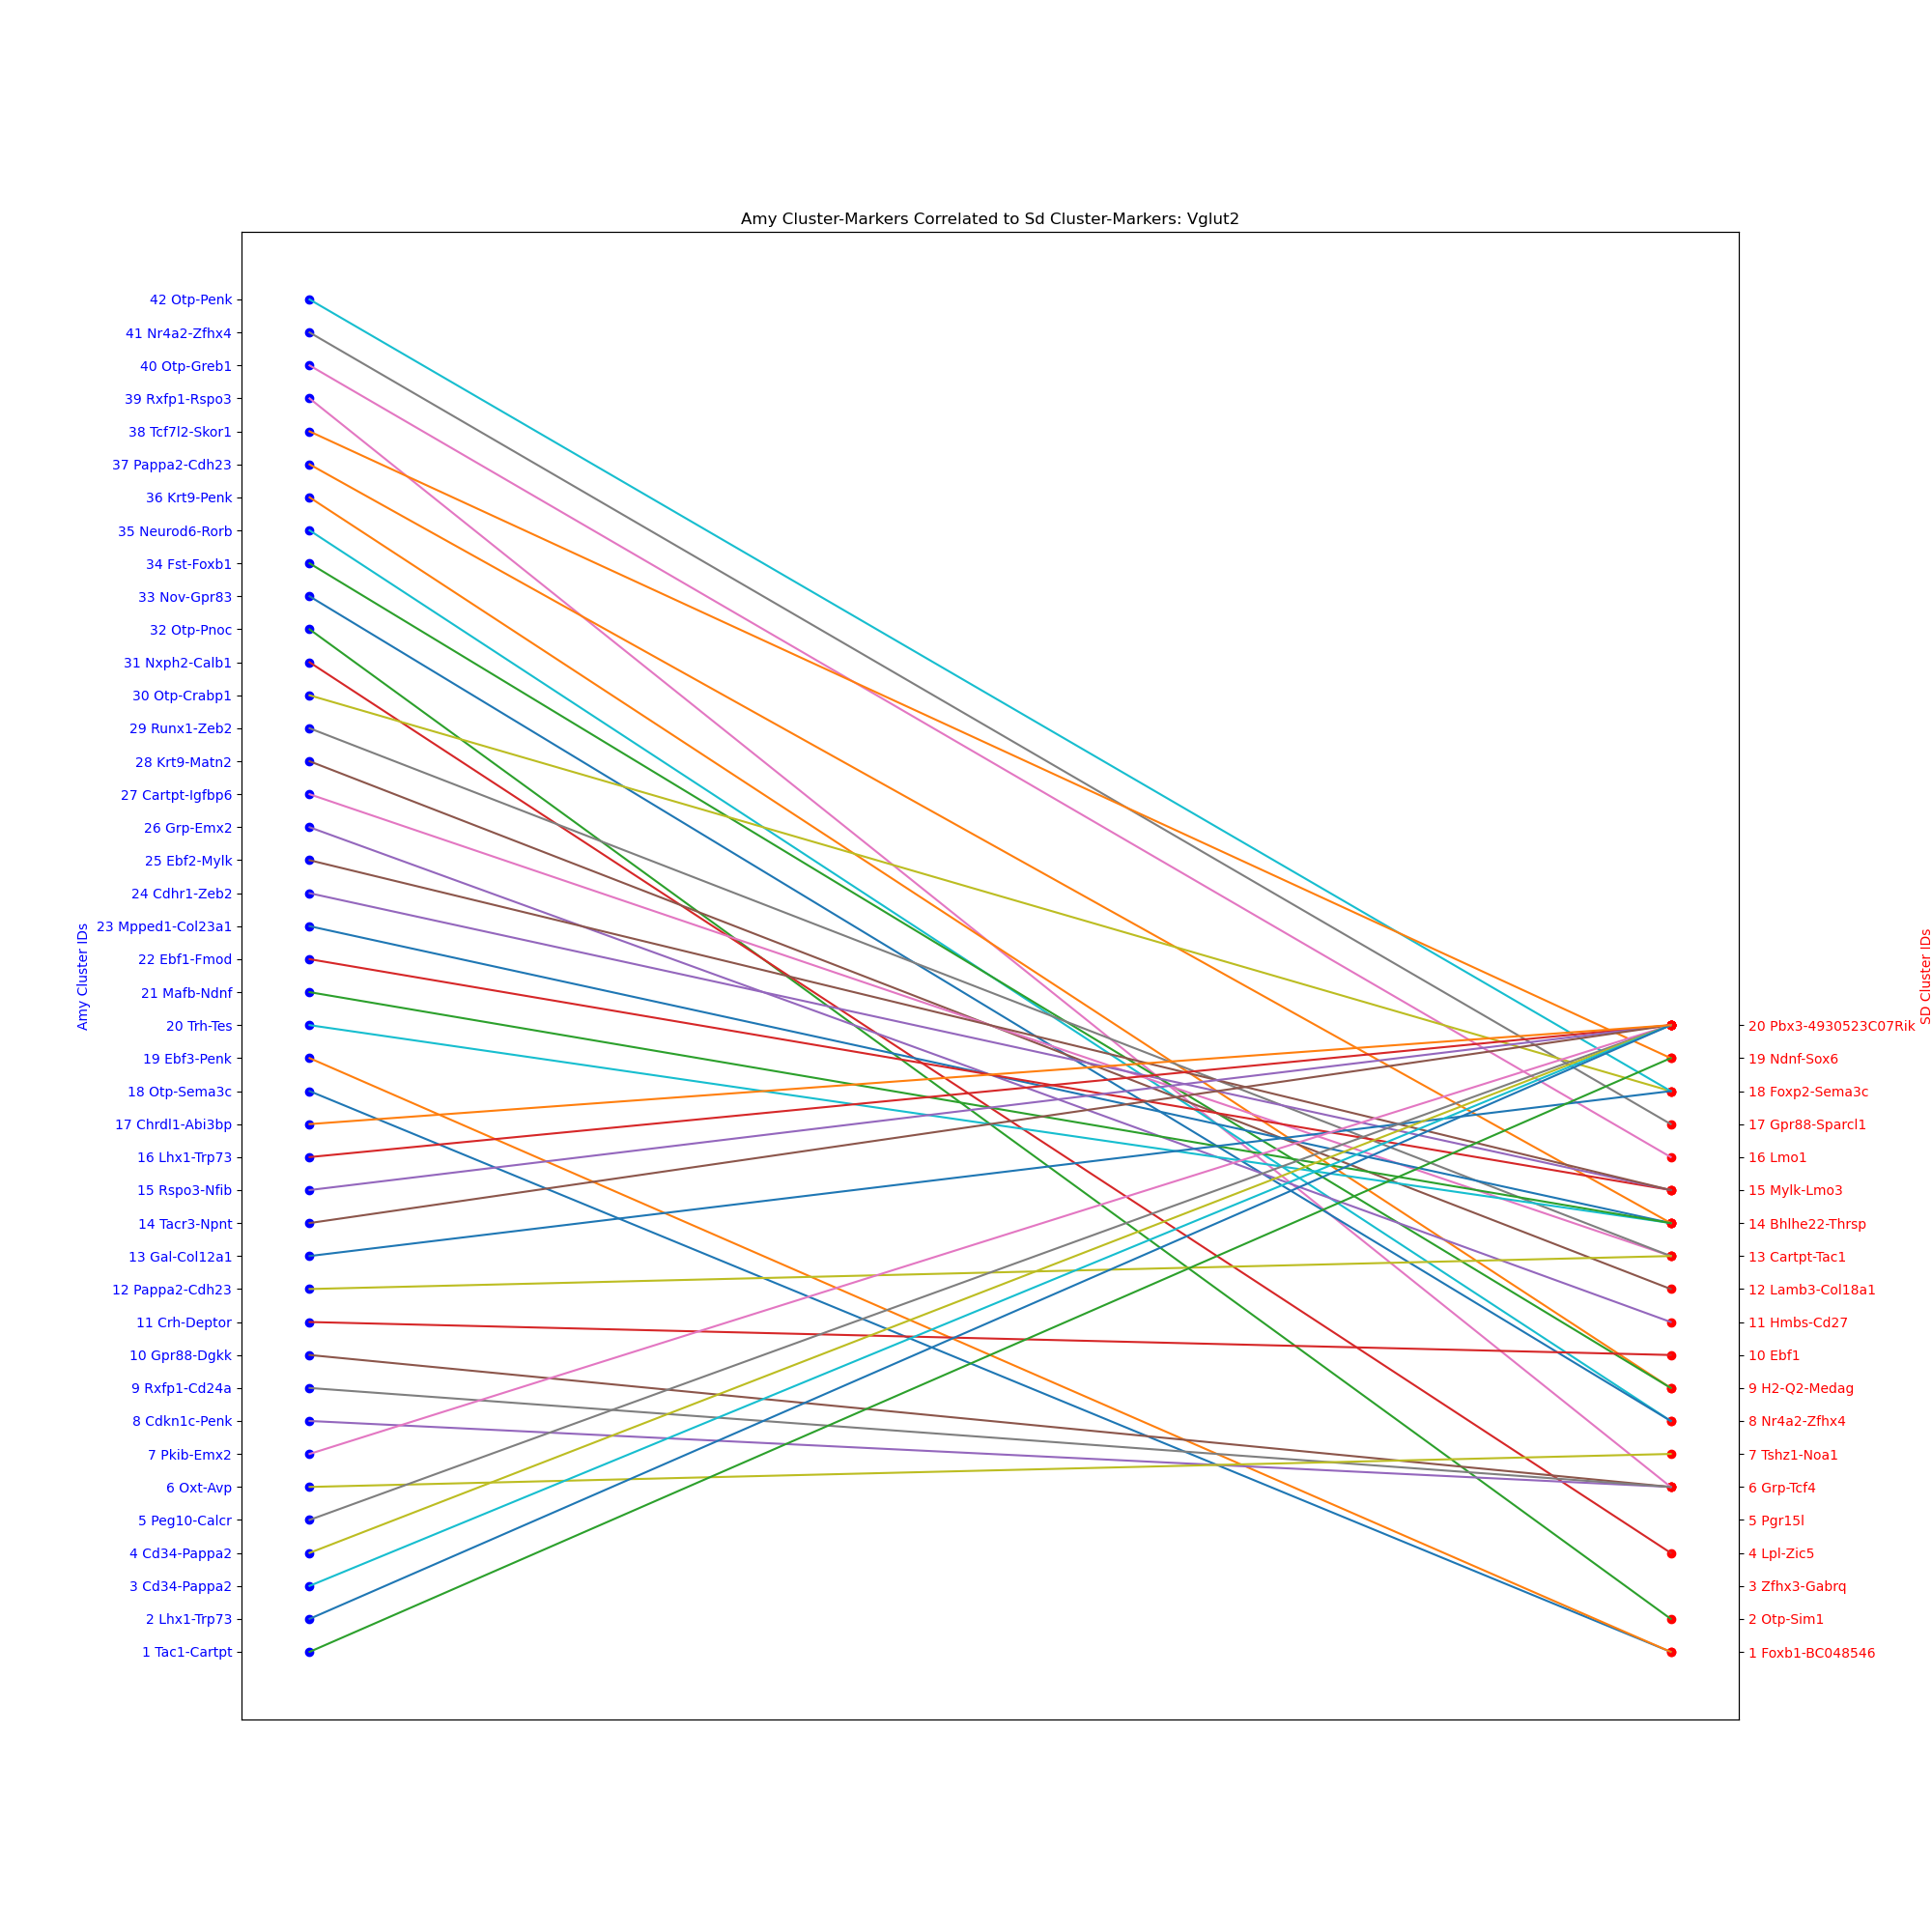

In [999]:
cc.plot_connector_plot_with_labels(connector_df_alt_lco_marker_shared_top,VGLUT2_mg_cl_dict_final,list(sd_labels_df['sd_label_complete']),amy_labels, folder,'Vglut2',savefig = True)

## Nonneuronal Analysis <a name="nn_analysis"></a>

To get nonneuronal class, combine all cell classes except GABA,VGLUT1/2
For markers row, just use cell (sub) class

In [1093]:
all_cell_classes

['Astro',
 'Astro_SC',
 'Astro_agt',
 'COP',
 'EC',
 'Epend',
 'GABA',
 'OL',
 'OPC',
 'OPC_cycling',
 'Peri',
 'VGLUT1',
 'VGLUT2',
 'VLMC',
 'VSM',
 'microglia',
 'pvm']

In [1118]:
NN_subclasses = [x for x in all_cell_classes if x not in ['GABA','VGLUT1','VGLUT2']]


In [1119]:
cell_class = NN_subclasses

In [1146]:
Counter(amy_metadata_df.loc['cell_class'])

Counter({'GABA': 13006,
         'VGLUT1': 11947,
         'OL': 7177,
         'Astro': 5447,
         'VGLUT2': 5231,
         'OPC': 3817,
         'microglia': 2385,
         'Astro_agt': 1848,
         'EC': 1845,
         'Peri': 1163,
         'VSM': 577,
         'COP': 391,
         'OPC_cycling': 289,
         'VLMC': 144,
         'pvm': 119,
         'Epend': 72,
         'Astro_SC': 56})

In [ ]:
amy_df_NN_init = pd.DataFrame()

In [1153]:
amy_df.shape

(28002, 55514)

In [1152]:
amy_metadata_df.shape

(6, 55514)

In [1187]:
np.array(amy_metadata_df_gaba.loc['celltype'].apply(lambda x: int(re.search(r'-(\d+)-', x).group(1))))

array([11, 11, 11, ..., 51, 51, 51])

In [1189]:
amy_metadata_df_gaba

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
cellID                                                          
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           10-1                    18-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                          
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           18-1                    18-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
cellID                                                          
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           19-1                    19-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                          
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           19-1                    19-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                         ...   
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4  ...   
sample                           23-1                    23-1  ...   
FC time                             0                       0  ...   
batch                               1                       1  ...   
cell_class                       GABA                    GABA  ...   
markers                [Adora2a, Id4]          [Adora2a, Id4]  ...   
cluster_label                      11                      11  ...   

              GTCAAACTCCCGATCT-1_76-2 GTGTAACGTGAGACCA-1_76-2  \
cellID                                                          
celltype              GABA-51-Vip-Crh         GABA-51-Vip-Crh   
sample                           76-2                    76-2   
FC time                             2                       2   
batch                               2                       2   
cell_class                       GABA                    GABA   
markers                    [Vip, Crh]              [Vip, Crh]   
cluster_label                      51                      51   

              GTGTGATAGGTGAGAA-1_76-2 TACTTCAGTAACTAAG-1_76-2  \
cellID                                                          
celltype              GABA-51-Vip-Crh         GABA-51-Vip-Crh   
sample                           76-2                    76-2   
FC time                             2                       2   
batch                               2                       2   
cell_class                       GABA                    GABA  

In [1188]:
amy_metadata_df_NN_init

AAACGCTCAGCCTTCT-1_08-1 AAAGGTATCATGGGAG-1_08-1  \
cellID                                                       
celltype                     Astro                   Astro   
sample                        08-1                    08-1   
FC time                          0                       0   
batch                            1                       1   
cell_class                   Astro                   Astro   
markers                         []                      []   

           AAATGGAGTAACTGCT-1_08-1 AACCTGAAGACGGTCA-1_08-1  \
cellID                                                       
celltype                     Astro                   Astro   
sample                        08-1                    08-1   
FC time                          0                       0   
batch                            1                       1   
cell_class                   Astro                   Astro   
markers                         []                      []   

           AACCTGAGTGAAAGTT-1_08-1 AAGAACAAGAAGGGAT-1_08-1  \
cellID                                                       
celltype                     Astro                   Astro   
sample                        08-1                    08-1   
FC time                          0                       0   
batch                            1                       1   
cell_class                   Astro                   Astro   
markers                         []                      []   

           AATAGAGTCATCACTT-1_08-1 AATCGTGGTCGAATTC-1_08-1  \
cellID                                                       
celltype                     Astro                   Astro   
sample                        08-1                    08-1   
FC time                          0                       0   
batch                            1                       1   
cell_class                   Astro                   Astro   
markers                         []                      []   

           AATGGCTCACGGTGAA-1_08-1 ACAGCCGTCCCAAGTA-1_08-1  ...  \
cellID                                                      ...   
celltype                     Astro                   Astro  ...   
sample                        08-1                    08-1  ...   
FC time                          0                       0  ...   
batch                            1                       1  ...   
cell_class                   Astro                   Astro  ...   
markers                         []                      []  ...   

           TCGAACAAGGAGCTGT-1_76-1 TGTACAGTCTGCAGCG-1_76-1  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-1                    76-1   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []   

           AGGACTTTCATGGAGG-1_76-2 CCCATTGGTACCTAGT-1_76-2  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-2                    76-2   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []   

           CTATCTACAATTGCTG-1_76-2 CTCATCGTCACCCATC-1_76-2  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-2                    76-2   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []

In [1154]:
#cell_cnt = 0
amy_df_NN_init = pd.DataFrame()
amy_metadata_df_NN_init = pd.DataFrame()
for x in NN_subclasses:
    NN_df_tmp = amy_df.loc[:,amy_metadata_df.loc['cell_class'] == x]
    NN_metadata_df_tmp = amy_metadata_df.loc[:,amy_metadata_df.loc['cell_class']==x]
    amy_df_NN_init = pd.concat([amy_df_NN_init,NN_df_tmp], axis = 1)
    amy_metadata_df_NN_init = pd.concat([amy_metadata_df_NN_init,NN_metadata_df_tmp],axis = 1)
    #print (x, amy_df.loc[:,amy_metadata_df.loc['cell_class']==x].shape)
    #cell_cnt+=amy_df.loc[:,amy_metadata_df.loc['cell_class']==x].shape[1]
#print ('total NN cells', cell_cnt)

In [1150]:
amy_df_NN_init.shape

(28002, 25330)

In [1158]:
amy_df_NN_init

AAACGCTCAGCCTTCT-1_08-1 AAAGGTATCATGGGAG-1_08-1  \
cellID                                                           
celltype                         Astro                   Astro   
sample                            08-1                    08-1   
FC time                              0                       0   
batch                                1                       1   
Xkr4                                 0                       0   
...                                ...                     ...   
AC168977.1                           0                       0   
PISD                                 0                       8   
DHRSX                                0                       0   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               AAATGGAGTAACTGCT-1_08-1 AACCTGAAGACGGTCA-1_08-1  \
cellID                                                           
celltype                         Astro                   Astro   
sample                            08-1                    08-1   
FC time                              0                       0   
batch                                1                       1   
Xkr4                                 0                       0   
...                                ...                     ...   
AC168977.1                           0                       0   
PISD                                 0                       0   
DHRSX                                0                       0   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               AACCTGAGTGAAAGTT-1_08-1 AAGAACAAGAAGGGAT-1_08-1  \
cellID                                                           
celltype                         Astro                   Astro   
sample                            08-1                    08-1   
FC time                              0                       0   
batch                                1                       1   
Xkr4                                 0                       0   
...                                ...                     ...   
AC168977.1                           0                       0   
PISD                                 8                       7   
DHRSX                                0                       0   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               AATAGAGTCATCACTT-1_08-1 AATCGTGGTCGAATTC-1_08-1  \
cellID                                                           
celltype                         Astro                   Astro   
sample                            08-1                    08-1   
FC time                              0                       0   
batch                                1                       1   
Xkr4                                 0                       0   
...                                ...                     ...   
AC168977.1                           0                       0   
PISD                                 0                       0   
DHRSX                                0                       0   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               AATGGCTCACGGTGAA-1_08-1 ACAGCCGTCCCAAGTA-1_08-1  ...  \
cellID                                                          ...   
celltype                         Astro                   Astro  ...   
sample                            08-1                    08-1  ...   
FC time                              0                       0  ...   
batch                                1                       1  ...   
Xkr4                                 0                       0  ...   
...                                ...                     ...  ...   
AC168977.1 

In [1157]:
amy_df_NN_init.loc['celltype'].index

Index(['AAACGCTCAGCCTTCT-1_08-1', 'AAAGGTATCATGGGAG-1_08-1',
       'AAATGGAGTAACTGCT-1_08-1', 'AACCTGAAGACGGTCA-1_08-1',
       'AACCTGAGTGAAAGTT-1_08-1', 'AAGAACAAGAAGGGAT-1_08-1',
       'AATAGAGTCATCACTT-1_08-1', 'AATCGTGGTCGAATTC-1_08-1',
       'AATGGCTCACGGTGAA-1_08-1', 'ACAGCCGTCCCAAGTA-1_08-1',
       ...
       'TCGAACAAGGAGCTGT-1_76-1', 'TGTACAGTCTGCAGCG-1_76-1',
       'AGGACTTTCATGGAGG-1_76-2', 'CCCATTGGTACCTAGT-1_76-2',
       'CTATCTACAATTGCTG-1_76-2', 'CTCATCGTCACCCATC-1_76-2',
       'CTGCCATGTATCGCTA-1_76-2', 'GCATGATTCTCGTCGT-1_76-2',
       'TGGGCGTAGAAGCCAC-1_76-2', 'TTCTGTAGTGGTATGG-1_76-2'],
      dtype='object', length=25330)

In [1155]:
amy_metadata_df_NN_init.shape

(6, 25330)

non neuronal
removing # duplicate gene rows:  65
removing  53  genes found in  ['Btg2', 'Jun', 'Egr4', 'Fosb', 'Junb', 'Gadd45g', 'Fos', 'Arc', 'Nr4a1', 'Npas4', 'Coq10b', 'Tns1', 'Per2', 'Ptgs2', 'Rnd3', 'Tnfaip6', 'Srxn1', 'Tiparp', 'Ccnl1', 'Mcl1', 'Dnajb5', 'Nr4a3', 'Fosl2', 'Nptx2', 'Rasl11a', 'Mest', 'Sertad1', 'Egr2', 'Midn', 'Gadd45b', 'Dusp6', 'Irs2', 'Plat', 'Ier2', 'Rrad', 'Tpbg', 'Csrnp1', 'Peli1', 'Per1', 'Kdm6b', 'Inhba', 'Plk2', 'Ifrd1', 'Baz1a', 'Trib1', 'Pim3', 'Lrrk2', 'Dusp1', 'Cdkn1a', 'Pim1', 'Sik1', 'Frat2', 'Dusp5']
removing  6  genes found in  ['Xist', 'Tsix', 'Ddx3y', 'Eif2s3y', 'Kdm5d', 'Uty']
Total genes reduced from 27874 to 16577


<IPython.core.display.Javascript object>


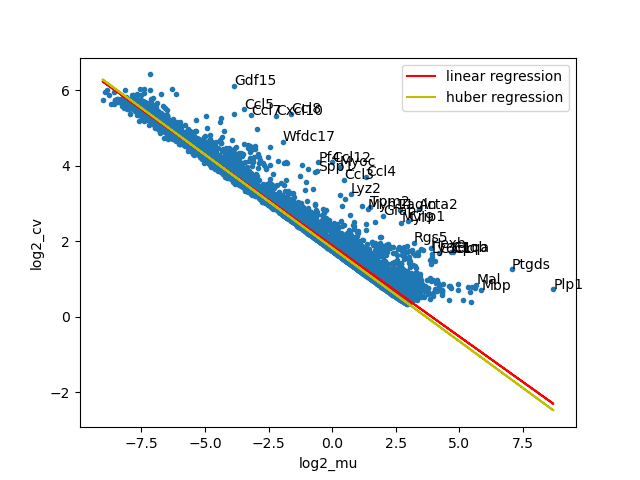

<IPython.core.display.Javascript object>


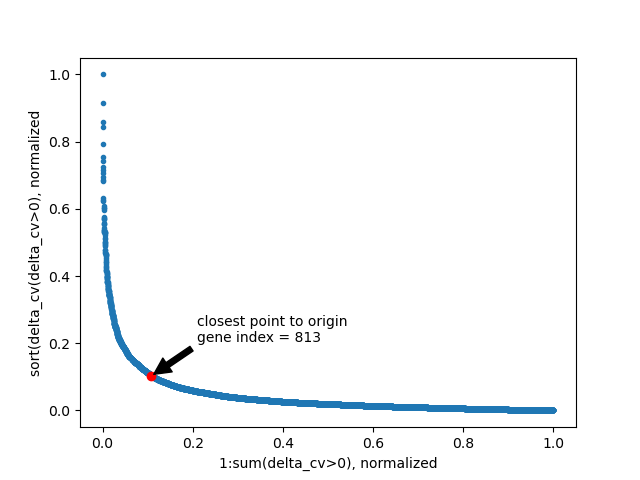

column (gene) mean after standardization: 0.00
column (gene) sigma after standardization: 1.00


In [1160]:
amy_df_NN_expr_ge_cv_ls, amy_metadata_df_NN = cc.process_amy_data_class(amy_df_NN_init,amy_metadata_df_NN_init, IEG_list,sex_gene_list)

In [1166]:
amy_metadata_df_NN

AAACGCTCAGCCTTCT-1_08-1 AAAGGTATCATGGGAG-1_08-1  \
cellID                                                       
celltype                     Astro                   Astro   
sample                        08-1                    08-1   
FC time                          0                       0   
batch                            1                       1   
cell_class                   Astro                   Astro   
markers                         []                      []   

           AAATGGAGTAACTGCT-1_08-1 AACCTGAAGACGGTCA-1_08-1  \
cellID                                                       
celltype                     Astro                   Astro   
sample                        08-1                    08-1   
FC time                          0                       0   
batch                            1                       1   
cell_class                   Astro                   Astro   
markers                         []                      []   

           AACCTGAGTGAAAGTT-1_08-1 AAGAACAAGAAGGGAT-1_08-1  \
cellID                                                       
celltype                     Astro                   Astro   
sample                        08-1                    08-1   
FC time                          0                       0   
batch                            1                       1   
cell_class                   Astro                   Astro   
markers                         []                      []   

           AATAGAGTCATCACTT-1_08-1 AATCGTGGTCGAATTC-1_08-1  \
cellID                                                       
celltype                     Astro                   Astro   
sample                        08-1                    08-1   
FC time                          0                       0   
batch                            1                       1   
cell_class                   Astro                   Astro   
markers                         []                      []   

           AATGGCTCACGGTGAA-1_08-1 ACAGCCGTCCCAAGTA-1_08-1  ...  \
cellID                                                      ...   
celltype                     Astro                   Astro  ...   
sample                        08-1                    08-1  ...   
FC time                          0                       0  ...   
batch                            1                       1  ...   
cell_class                   Astro                   Astro  ...   
markers                         []                      []  ...   

           TCGAACAAGGAGCTGT-1_76-1 TGTACAGTCTGCAGCG-1_76-1  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-1                    76-1   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []   

           AGGACTTTCATGGAGG-1_76-2 CCCATTGGTACCTAGT-1_76-2  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-2                    76-2   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []   

           CTATCTACAATTGCTG-1_76-2 CTCATCGTCACCCATC-1_76-2  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-2                    76-2   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []

In [1192]:
np.unique(amy_metadata_df_NN.loc['cell_class'])

array(['Astro', 'Astro_SC', 'Astro_agt', 'COP', 'EC', 'Epend', 'OL',
       'OPC', 'OPC_cycling', 'Peri', 'VLMC', 'VSM', 'microglia', 'pvm'],
      dtype=object)

In [1165]:
amy_df_NN_expr_ge_cv_ls

AAACGCTCAGCCTTCT-1_08-1  AAAGGTATCATGGGAG-1_08-1  \
cellID                                                      
Plp1                   -0.831833                -0.831833   
Ptgds                  -0.677320                -0.677320   
Ccl8                   -0.041290                -0.041290   
Acta2                  -0.176287                -0.176287   
Ccl4                   -0.140429                -0.140429   
...                          ...                      ...   
Myrf                   -0.523801                -0.523801   
Anks1b                 -0.755874                -0.755874   
Clec12a                -0.030818                -0.030818   
Gpr50                  -0.047986                -0.047986   
Ttyh3                  -0.582186                 2.149117   

         AAATGGAGTAACTGCT-1_08-1  AACCTGAAGACGGTCA-1_08-1  \
cellID                                                      
Plp1                   -0.831833                -0.831833   
Ptgds                  -0.677320                -0.677320   
Ccl8                   -0.041290                -0.041290   
Acta2                  -0.176287                -0.176287   
Ccl4                   -0.140429                -0.140429   
...                          ...                      ...   
Myrf                   -0.523801                -0.523801   
Anks1b                 -0.755874                -0.755874   
Clec12a                -0.030818                -0.030818   
Gpr50                  -0.047986                -0.047986   
Ttyh3                   2.352826                 1.293730   

         AACCTGAGTGAAAGTT-1_08-1  AAGAACAAGAAGGGAT-1_08-1  \
cellID                                                      
Plp1                   -0.831833                -0.831833   
Ptgds                  -0.677320                -0.677320   
Ccl8                   -0.041290                -0.041290   
Acta2                  -0.176287                -0.176287   
Ccl4                   -0.140429                -0.140429   
...                          ...                      ...   
Myrf                   -0.523801                -0.523801   
Anks1b                  1.507510                -0.755874   
Clec12a                -0.030818                -0.030818   
Gpr50                  -0.047986                -0.047986   
Ttyh3                   2.481554                -0.582186   

         AATAGAGTCATCACTT-1_08-1  AATCGTGGTCGAATTC-1_08-1  \
cellID                                                      
Plp1                   -0.831833                -0.831833   
Ptgds                  -0.677320                -0.677320   
Ccl8                   -0.041290                -0.041290   
Acta2                  -0.176287                -0.176287   
Ccl4                   -0.140429                -0.140429   
...                          ...                      ...   
Myrf                   -0.523801                -0.523801   
Anks1b                 -0.755874                 1.201632   
Clec12a                -0.030818                -0.030818   
Gpr50                  -0.047986                -0.047986   
Ttyh3                   1.637576                 1.729457   

         AATGGCTCACGGTGAA-1_08-1  ACAGCCGTCCCAAGTA-1_08-1  ...  \
cellID                                                     ...   
Plp1                    0.283968                -0.831833  ...   
Ptgds                  -0.677320                -0.677320  ...   
Ccl8                   -0.041290                -0.041290  ...   
Acta2                  -0.176287                -0.176287  ...   
Ccl4                   -0.140429                -0.140429  ...   
...                          ...                      ...  ...   
Myrf                   -0.523801                -0.523801  ...   
Anks1b                 -0.755874                -0.755874  ...   
Clec12a                -0.030818                -0.030818  ...   
Gpr50                  -0.047986                -0.047986  ...   
Ttyh3                  -0.582186         

In [1167]:
#save to file

folder = '/bigdata/isaac/Nonneuronal_files/'

file1 = 'amy_df_NN_expr_ge_cv_ls' 
file2 = 'amy_metadata_df_NN' 

amy_df_NN_expr_ge_cv_ls.to_feather(folder+file1+'.feather')
amy_metadata_df_NN.to_json(folder+file2+'.json')

In [1168]:
folder = '/bigdata/isaac/Nonneuronal_files/'
amy_df_NN_expr_ge_cv_ls_orig = pd.read_feather(folder + 'amy_df_NN_expr_ge_cv_ls.feather')
amy_metadata_df_NN_orig = pd.read_json(folder + 'amy_metadata_df_NN.json')

### Load NN SD data

In [324]:
folder

'/bigdata/isaac/Vglut1_files/'

In [1170]:
folder = '/bigdata/isaac/Nonneuronal_files/'

#NN_meta_data_df_plis = pd.read_json(folder + 'NN_meta_data_df_plis2024-08-21.json')

NN_df_prelinkage_ls_orig = pd.read_feather(folder + 'NN_df_pre_linkage_ls_2024-09-02.feather')
#NN_metadata_df_prelinkage_ls_orig = pd.read_json(folder + 'NN_meta_data_df_pre_linkage_2024-08-21.json')
NN_meta_data_df_plis_filtered = pd.read_json(folder + 'NNmeta_data_df_plis_filtered_2024-09-02.json')


In [1171]:
NN_df_plis_filtered = NN_df_prelinkage_ls_orig.reindex(index = NN_meta_data_df_plis_filtered.columns)

In [1205]:
NN_df_plis_filtered

GTGTGGCAGCCACTCG-1_10X37_1  GTAATGCCACATGAAA-1_10X52_2  \
Plp1                       -0.577533                    0.093173   
Ptgds                      -0.447747                    0.354358   
Acta2                      -0.230281                    0.821739   
Ccl4                       -0.217776                   -0.217776   
Cxcl10                     -0.138062                   -0.138062   
...                              ...                         ...   
Serpinf1                   -0.132839                   -0.132839   
Pid1                       -0.740683                   -0.740683   
Evi2a                      -0.413490                   -0.413490   
Anks1b                     -0.837112                   -0.032725   
Gpr50                      -0.081027                   -0.081027   

          CGTGCTTGTCTGTCAA-1_10X37_2  ACCACAAGTATCGGTT-1_10X35_2  \
Plp1                       -0.577533                   -0.577533   
Ptgds                       0.058325                   -0.447747   
Acta2                       0.821739                    1.437131   
Ccl4                       -0.217776                   -0.217776   
Cxcl10                      4.570505                   -0.138062   
...                              ...                         ...   
Serpinf1                   -0.132839                   -0.132839   
Pid1                        0.555463                   -0.740683   
Evi2a                      -0.413490                   -0.413490   
Anks1b                     -0.032725                   -0.837112   
Gpr50                      -0.081027                   -0.081027   

          TCTGTCGGTCACCACG-1_10X35_1  TGCTCCAGTAACAGGC-1_10X37_2  \
Plp1                       -0.046011                   -0.046011   
Ptgds                      -0.447747                    0.058325   
Acta2                       2.212434                    0.821739   
Ccl4                       -0.217776                   -0.217776   
Cxcl10                     -0.138062                   -0.138062   
...                              ...                         ...   
Serpinf1                   -0.132839                   -0.132839   
Pid1                       -0.740683                   -0.740683   
Evi2a                      -0.413490                   -0.413490   
Anks1b                     -0.837112                   -0.837112   
Gpr50                      -0.081027                   -0.081027   

          AAGTCGTTCGCCTATC-1_10X38_1  CTTGAGAGTTATTCTC-1_10X35_2  \
Plp1                       -0.242180                   -0.577533   
Ptgds                      -0.447747                   -0.447747   
Acta2                       3.541171                    1.437131   
Ccl4                       -0.217776                   -0.217776   
Cxcl10                     -0.138062                   -0.138062   
...                              ...                         ...   
Serpinf1                   -0.132839                   -0.132839   
Pid1                       -0.740683                    0.555463   
Evi2a                      -0.413490                   -0.413490   
Anks1b                     -0.837112                   -0.837112   
Gpr50                      -0.081027                   -0.081027   

          TCGAACATCGGTTAGT-1_10X51_4  ATGACCAAGAAGCGGG-1_10X52_1  ...  \
Plp1                       -0.577533                   -0.242180  ...   
Ptgds                      -0.447747                   -0.447747  ...   
Acta2                       1.873759                    2.212434  ...   
Ccl4                       -0.217776                   -0.217776  ...   
Cxcl10                     -0.138062                   -0.138062  ...   
...                              ...                         ...  ...   
Serpinf1                   -0.132839                   -0.132839  ...   
Pid1                       -0.740683                   -0.740683  ...   
Evi2a                      -0.413490                   -0.413490  ...   
Anks1b      

In [1175]:
NN_meta_data_df_plis_filtered.shape

(29, 1976)

### Get intersection

In [1176]:
amy_df_NN_expr_ge_cv_ls, NN_df_plis_filtered = cc.get_df_gene_intersection(NN_df_plis_filtered,amy_df_NN_expr_ge_cv_ls,IEG_list)

removing  0  genes found in  ['Btg2', 'Jun', 'Egr4', 'Fosb', 'Junb', 'Gadd45g', 'Fos', 'Arc', 'Nr4a1', 'Npas4', 'Coq10b', 'Tns1', 'Per2', 'Ptgs2', 'Rnd3', 'Tnfaip6', 'Srxn1', 'Tiparp', 'Ccnl1', 'Mcl1', 'Dnajb5', 'Nr4a3', 'Fosl2', 'Nptx2', 'Rasl11a', 'Mest', 'Sertad1', 'Egr2', 'Midn', 'Gadd45b', 'Dusp6', 'Irs2', 'Plat', 'Ier2', 'Rrad', 'Tpbg', 'Csrnp1', 'Peli1', 'Per1', 'Kdm6b', 'Inhba', 'Plk2', 'Ifrd1', 'Baz1a', 'Trib1', 'Pim3', 'Lrrk2', 'Dusp1', 'Cdkn1a', 'Pim1', 'Sik1', 'Frat2', 'Dusp5']
Index(['Plp1', 'Ptgds', 'Acta2', 'Ccl4', 'Cxcl10', 'Gdf15', 'Tagln', 'Myoc',
       'Ccl12', 'C1qa',
       ...
       'Fxyd6', 'Nusap1', 'Lims2', 'Tst', 'Hspa1b', 'Serpinf1', 'Pid1',
       'Evi2a', 'Anks1b', 'Gpr50'],
      dtype='object', length=457)


In [1177]:
amy_df_NN_expr_ge_cv_ls.shape

(457, 25330)

In [1178]:
NN_df_plis_filtered.shape

(457, 1976)

### Checkpoint - save intersected data/metadata to file / load from here

In [1190]:
folder

'/bigdata/isaac/Nonneuronal_files/'

In [1206]:
#save to file

folder = '/bigdata/isaac/Nonneuronal_files/'

file1 = 'amy_df_NN_expr_ge_cv_ls_cell_comp' 
file2 = 'amy_metadata_df_NN_cell_comp' 

amy_df_NN_expr_ge_cv_ls.to_feather(folder+file1+'.feather')
amy_metadata_df_NN.to_json(folder+file2+'.json')

#################################

file1 = 'NN_df_prelinkage_ls_cell_comp' 
file2 = 'NN_meta_data_df_prelinkage_cell_comp' 

NN_df_plis_filtered.to_feather(folder+file1+'.feather')
NN_meta_data_df_plis_filtered.to_json(folder+file2+'.json')


In [52]:
#load data
folder = '/bigdata/isaac/Nonneuronal_files/'

#amy_df_VGLUT1_expr_ge_cv_ls = pd.read_feather(folder + 'amy_df_VGLUT1_expr_ge_cv_ls_cell_comp.feather')
#amy_metadata_df_VGLUT1 = pd.read_json(folder + 'amy_metadata_df_VGLUT1_cell_comp.json')

#VGLUT1_df_prelinkage_ls = pd.read_feather(folder + 'VGLUT1_df_prelinkage_ls_cell_comp.feather')
#VGLUT1_meta_data_df_prelinkage = pd.read_json(folder + 'VGLUT1_meta_data_df_prelinkage_cell_comp.json' )

### Compute avg expression for all genes, for every cluster

In [ ]:
# add cluster label corresponding to NN subclass

In [1193]:
NN_subclasses

['Astro',
 'Astro_SC',
 'Astro_agt',
 'COP',
 'EC',
 'Epend',
 'OL',
 'OPC',
 'OPC_cycling',
 'Peri',
 'VLMC',
 'VSM',
 'microglia',
 'pvm']

In [1198]:
NN_subclass_2_cl_dict = dict(zip(NN_subclasses,np.arange(1,len(NN_subclasses)+1)))

In [1199]:
NN_subclass_2_cl_dict

{'Astro': 1,
 'Astro_SC': 2,
 'Astro_agt': 3,
 'COP': 4,
 'EC': 5,
 'Epend': 6,
 'OL': 7,
 'OPC': 8,
 'OPC_cycling': 9,
 'Peri': 10,
 'VLMC': 11,
 'VSM': 12,
 'microglia': 13,
 'pvm': 14}

In [1181]:
amy_metadata_df_NN

AAACGCTCAGCCTTCT-1_08-1 AAAGGTATCATGGGAG-1_08-1  \
cellID                                                       
celltype                     Astro                   Astro   
sample                        08-1                    08-1   
FC time                          0                       0   
batch                            1                       1   
cell_class                   Astro                   Astro   
markers                         []                      []   

           AAATGGAGTAACTGCT-1_08-1 AACCTGAAGACGGTCA-1_08-1  \
cellID                                                       
celltype                     Astro                   Astro   
sample                        08-1                    08-1   
FC time                          0                       0   
batch                            1                       1   
cell_class                   Astro                   Astro   
markers                         []                      []   

           AACCTGAGTGAAAGTT-1_08-1 AAGAACAAGAAGGGAT-1_08-1  \
cellID                                                       
celltype                     Astro                   Astro   
sample                        08-1                    08-1   
FC time                          0                       0   
batch                            1                       1   
cell_class                   Astro                   Astro   
markers                         []                      []   

           AATAGAGTCATCACTT-1_08-1 AATCGTGGTCGAATTC-1_08-1  \
cellID                                                       
celltype                     Astro                   Astro   
sample                        08-1                    08-1   
FC time                          0                       0   
batch                            1                       1   
cell_class                   Astro                   Astro   
markers                         []                      []   

           AATGGCTCACGGTGAA-1_08-1 ACAGCCGTCCCAAGTA-1_08-1  ...  \
cellID                                                      ...   
celltype                     Astro                   Astro  ...   
sample                        08-1                    08-1  ...   
FC time                          0                       0  ...   
batch                            1                       1  ...   
cell_class                   Astro                   Astro  ...   
markers                         []                      []  ...   

           TCGAACAAGGAGCTGT-1_76-1 TGTACAGTCTGCAGCG-1_76-1  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-1                    76-1   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []   

           AGGACTTTCATGGAGG-1_76-2 CCCATTGGTACCTAGT-1_76-2  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-2                    76-2   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []   

           CTATCTACAATTGCTG-1_76-2 CTCATCGTCACCCATC-1_76-2  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-2                    76-2   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []

In [1200]:
tmp = np.array(amy_metadata_df_NN.loc['cell_class'])
#print (np.unique(tmp))
tmp_c = [NN_subclass_2_cl_dict[x] for x in tmp]
amy_metadata_df_NN.loc['cluster_label'] = tmp_c

In [1201]:
amy_metadata_df_NN

AAACGCTCAGCCTTCT-1_08-1 AAAGGTATCATGGGAG-1_08-1  \
cellID                                                          
celltype                        Astro                   Astro   
sample                           08-1                    08-1   
FC time                             0                       0   
batch                               1                       1   
cell_class                      Astro                   Astro   
markers                            []                      []   
cluster_label                       1                       1   

              AAATGGAGTAACTGCT-1_08-1 AACCTGAAGACGGTCA-1_08-1  \
cellID                                                          
celltype                        Astro                   Astro   
sample                           08-1                    08-1   
FC time                             0                       0   
batch                               1                       1   
cell_class                      Astro                   Astro   
markers                            []                      []   
cluster_label                       1                       1   

              AACCTGAGTGAAAGTT-1_08-1 AAGAACAAGAAGGGAT-1_08-1  \
cellID                                                          
celltype                        Astro                   Astro   
sample                           08-1                    08-1   
FC time                             0                       0   
batch                               1                       1   
cell_class                      Astro                   Astro   
markers                            []                      []   
cluster_label                       1                       1   

              AATAGAGTCATCACTT-1_08-1 AATCGTGGTCGAATTC-1_08-1  \
cellID                                                          
celltype                        Astro                   Astro   
sample                           08-1                    08-1   
FC time                             0                       0   
batch                               1                       1   
cell_class                      Astro                   Astro   
markers                            []                      []   
cluster_label                       1                       1   

              AATGGCTCACGGTGAA-1_08-1 ACAGCCGTCCCAAGTA-1_08-1  ...  \
cellID                                                         ...   
celltype                        Astro                   Astro  ...   
sample                           08-1                    08-1  ...   
FC time                             0                       0  ...   
batch                               1                       1  ...   
cell_class                      Astro                   Astro  ...   
markers                            []                      []  ...   
cluster_label                       1                       1  ...   

              TCGAACAAGGAGCTGT-1_76-1 TGTACAGTCTGCAGCG-1_76-1  \
cellID                                                          
celltype                          pvm                     pvm   
sample                           76-1                    76-1   
FC time                             2                       2   
batch                               3                       3   
cell_class                        pvm                     pvm   
markers                            []                      []   
cluster_label                      14                      14   

              AGGACTTTCATGGAGG-1_76-2 CCCATTGGTACCTAGT-1_76-2  \
cellID                                                          
celltype                          pvm                     pvm   
sample                           76-2                    76-2   
FC time                             2                       2   
batch                               3                       3   
cell_class                        pvm                     pvm  

In [1202]:
amy_df_NN_expr_ge_cv_ls

AAACGCTCAGCCTTCT-1_08-1  AAAGGTATCATGGGAG-1_08-1  \
Plp1                    -0.831833                -0.831833   
Ptgds                   -0.677320                -0.677320   
Acta2                   -0.176287                -0.176287   
Ccl4                    -0.140429                -0.140429   
Cxcl10                  -0.050704                -0.050704   
...                           ...                      ...   
Serpinf1                -0.133879                -0.133879   
Pid1                    -0.590355                 1.437783   
Evi2a                   -0.570896                -0.570896   
Anks1b                  -0.755874                -0.755874   
Gpr50                   -0.047986                -0.047986   

          AAATGGAGTAACTGCT-1_08-1  AACCTGAAGACGGTCA-1_08-1  \
Plp1                    -0.831833                -0.831833   
Ptgds                   -0.677320                -0.677320   
Acta2                   -0.176287                -0.176287   
Ccl4                    -0.140429                -0.140429   
Cxcl10                  -0.050704                -0.050704   
...                           ...                      ...   
Serpinf1                -0.133879                -0.133879   
Pid1                    -0.590355                -0.590355   
Evi2a                   -0.570896                -0.570896   
Anks1b                  -0.755874                -0.755874   
Gpr50                   -0.047986                -0.047986   

          AACCTGAGTGAAAGTT-1_08-1  AAGAACAAGAAGGGAT-1_08-1  \
Plp1                    -0.831833                -0.831833   
Ptgds                   -0.677320                -0.677320   
Acta2                   -0.176287                -0.176287   
Ccl4                    -0.140429                -0.140429   
Cxcl10                  -0.050704                -0.050704   
...                           ...                      ...   
Serpinf1                -0.133879                -0.133879   
Pid1                    -0.590355                -0.590355   
Evi2a                   -0.570896                -0.570896   
Anks1b                   1.507510                -0.755874   
Gpr50                   -0.047986                -0.047986   

          AATAGAGTCATCACTT-1_08-1  AATCGTGGTCGAATTC-1_08-1  \
Plp1                    -0.831833                -0.831833   
Ptgds                   -0.677320                -0.677320   
Acta2                   -0.176287                -0.176287   
Ccl4                    -0.140429                -0.140429   
Cxcl10                  -0.050704                -0.050704   
...                           ...                      ...   
Serpinf1                -0.133879                -0.133879   
Pid1                    -0.590355                -0.590355   
Evi2a                   -0.570896                -0.570896   
Anks1b                  -0.755874                 1.201632   
Gpr50                   -0.047986                -0.047986   

          AATGGCTCACGGTGAA-1_08-1  ACAGCCGTCCCAAGTA-1_08-1  ...  \
Plp1                     0.283968                -0.831833  ...   
Ptgds                   -0.677320                -0.677320  ...   
Acta2                   -0.176287                -0.176287  ...   
Ccl4                    -0.140429                -0.140429  ...   
Cxcl10                  -0.050704                -0.050704  ...   
...                           ...                      ...  ...   
Serpinf1                -0.133879                -0.133879  ...   
Pid1                    -0.590355                -0.590355  ...   
Evi2a                   -0.570896                -0.570896  ...   
Anks1b                  -0.755874                -0.755874  ...   
Gpr50                   -0.047986                -0.047986  ...   

          TCGAACAAGGAGCTGT-1_76-1  TGTACAGTCTGCAGCG-1_76-1  \
Plp1                    -0.831833                -0.157297   
Ptgds                   -0.677320                -0.677320   
Acta2                   -0.176287      

In [1203]:
amy_avgs = dp.compute_avg_expr_per_cluster_label(amy_df_NN_expr_ge_cv_ls,amy_metadata_df_NN)

In [1204]:
amy_avgs

1         2         3         4         5         6  \
Plp1      -0.66546 -0.578277 -0.667195  1.029069  -0.70141 -0.539389   
Ptgds     -0.59562 -0.517051 -0.588183 -0.008392 -0.625089 -0.526547   
Acta2    -0.167423 -0.176287 -0.169854 -0.170864 -0.143382  1.580089   
Ccl4      -0.13712 -0.140429 -0.134243 -0.122402 -0.127292 -0.140429   
Cxcl10   -0.044022 -0.050704 -0.050704 -0.050704 -0.007912  0.037556   
...            ...       ...       ...       ...       ...       ...   
Serpinf1 -0.086766 -0.011413 -0.128533 -0.133879 -0.119879 -0.133879   
Pid1     -0.138306  0.089628 -0.098495   0.16159 -0.558331 -0.380757   
Evi2a    -0.551346 -0.531573 -0.563983 -0.167022 -0.566082 -0.540311   
Anks1b   -0.572246 -0.338028  -0.58388  0.164259  -0.58714 -0.426372   
Gpr50     0.165061  0.147203 -0.038339 -0.047986 -0.037492 -0.047986   

                 7         8         9        10        11        12  \
Plp1      1.470026 -0.395822 -0.394724 -0.700734 -0.650205 -0.727498   
Ptgds     1.400389  -0.48231 -0.506764   -0.6045  0.424494  -0.61824   
Acta2    -0.166018 -0.161931 -0.167771  0.170143 -0.084717  6.148721   
Ccl4      -0.13487 -0.134695 -0.140429 -0.120598 -0.140429 -0.128073   
Cxcl10   -0.047404 -0.050704 -0.050704 -0.024555   0.18037 -0.050704   
...            ...       ...       ...       ...       ...       ...   
Serpinf1 -0.129943 -0.131981 -0.133879 -0.101128  5.742457 -0.133879   
Pid1     -0.539256  1.302543  1.003597  0.308255  0.117441  0.104624   
Evi2a     1.027545 -0.464814 -0.453019  -0.56468 -0.557973 -0.570896   
Anks1b    0.511481  0.996851  0.850098 -0.575877 -0.501712 -0.574387   
Gpr50    -0.047025 -0.047986 -0.047986 -0.047986 -0.047986 -0.047986   

                13        14  
Plp1     -0.710365 -0.690616  
Ptgds    -0.614362 -0.374213  
Acta2    -0.168185 -0.176287  
Ccl4      1.269295  0.213776  
Cxcl10    0.391192  0.128604  
...            ...       ...  
Serpinf1  0.756146  0.281902  
Pid1      0.013563  0.545974  
Evi2a     0.339503  0.092551  
Anks1b   -0.553477 -0.532704  
Gpr50    -0.047986 -0.047986  

[457 rows x 14 columns]

In [1208]:
sd_avgs = dp.compute_avg_expr_per_cluster_label(NN_df_plis_filtered,NN_meta_data_df_plis_filtered)

In [1209]:
sd_avgs

1         2         3         4         5         6  \
Plp1     -0.298094 -0.474753 -0.455696  0.048752 -0.500343 -0.497147   
Ptgds    -0.282364 -0.393036 -0.380672  0.014366 -0.414812 -0.412778   
Acta2     1.811885 -0.230281 -0.204412 -0.193369 -0.221641 -0.224147   
Ccl4     -0.166938 -0.183426  2.625442  3.249038 -0.204727 -0.217776   
Cxcl10    0.169112  0.190126   0.73471  0.855016 -0.005857 -0.026118   
...            ...       ...       ...       ...       ...       ...   
Serpinf1 -0.132839 -0.132839  0.216344  1.004096 -0.132839 -0.132839   
Pid1     -0.347434  1.024666  0.080209 -0.085067  0.047597 -0.715799   
Evi2a     -0.41349 -0.273062  0.651019  1.043503 -0.404562 -0.409265   
Anks1b   -0.234765  0.438778  0.825773 -0.319138 -0.769546  -0.77574   
Gpr50    -0.081027 -0.081027 -0.081027 -0.081027 -0.081027 -0.081027   

                 7         8         9        10        11  
Plp1     -0.475469 -0.300942 -0.356264  2.320411  2.592855  
Ptgds    -0.425743 -0.332763 -0.375272  2.574494  2.031106  
Acta2     4.608164 -0.230281 -0.227823 -0.230281 -0.230281  
Ccl4     -0.162517 -0.201551 -0.183374 -0.196234 -0.205192  
Cxcl10   -0.138062 -0.138062  0.051523 -0.138062 -0.138062  
...            ...       ...       ...       ...       ...  
Serpinf1 -0.132839 -0.132839  0.197922 -0.042584 -0.132839  
Pid1      0.432261  1.321005 -0.318878 -0.705864  -0.68935  
Evi2a     -0.41349 -0.275711 -0.383013  2.791634  1.965869  
Anks1b     0.91294  0.515754 -0.735941  0.872978  1.551485  
Gpr50    -0.081027 -0.056118  0.250838 -0.081027 -0.081027  

[457 rows x 11 columns]

In [1210]:
heatmap2, heatmap_argmax_df_alt_lco, corr_matrix_manual_alt_lco, corr_matrix_manual_alt_lco_sorted = cc.plot_correlation(sd_avgs,amy_avgs)
# Display the plot
hvplot.show(heatmap2)
    
# Ensure output is displayed inline
hv.output(heatmap2, backend='bokeh')

Launching server at http://localhost:39505


:HeatMap   [columns,index]   (value)

In [1211]:
error_genes,all_marker_labels = cc.amy_gene_spell_checker(amy_df_NN_expr_ge_cv_ls_orig,amy_metadata_df_NN)
error_genes

/home/isaac/analysis/scRNA-seq/cell_comparison.py:142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  


[]

In [1212]:
all_marker_labels

[[]]

In [1213]:
folder = '/bigdata/isaac/Nonneuronal_files/'

In [1214]:
with open(folder + 'NN_cl_mg_filtered_2024-09-02.json') as json_data:
    NN_cl_mg_filtered = json.load(json_data)

In [1215]:
NN_cl_mg_filtered = {int(k): v for k, v in NN_cl_mg_filtered.items()}

In [1217]:
NN_cl_mg_filtered

{1: ['Tmem212',
  'Sntn',
  'Gm16160',
  'Gm10714',
  'Spag17',
  'Calml4',
  'Cdhr3',
  'Stoml3',
  'Ccdc153'],
 2: ['Pdgfra',
  'Prc1',
  'Lockd',
  'Ube2c',
  'Mki67',
  'Top2a',
  'Melk',
  'Esco2',
  'Neil3',
  'Pbk',
  'Ska1'],
 3: ['Ccl2'],
 4: ['Fcgr3',
  'Aif1',
  'Ctss',
  'C1qa',
  'Dusp2',
  'Lyz2',
  'Gm43936',
  'Rgs1',
  'Fcrls',
  'Tyrobp',
  'Trem2',
  'C1qb',
  'C1qc',
  'Ccl4',
  'Cx3cr1',
  'P2ry12',
  'Ccl12',
  'Il1b'],
 5: ['Atp13a5',
  'Ifitm1',
  'Vtn',
  'Abcc9',
  'Itm2a',
  'Slc6a13',
  'Slco1a4',
  'Cldn5',
  'Kcnj8',
  'Nostrin'],
 6: ['Foxq1', 'Egfl7', 'Kank3', 'Gm9946', 'Cd93', 'Lef1'],
 7: ['Rab3c',
  'Vgf',
  'Scn2a1',
  'Prlr',
  'Synpr',
  'Pcp4',
  'Cnn1',
  'Acta2',
  'Tagln',
  'Myh11',
  'Pln',
  'Tpm2',
  'Fbxl22'],
 8: ['Lhfpl3', 'Vcan', 'Fam89a', 'C1ql1', 'Matn4', 'Snx22'],
 9: ['Gm11681', 'Aldoc', 'Myoc', 'Gfap', 'Aqp4', 'Slc4a4', 'C4b', 'Ntsr2'],
 10: ['Ptgds',
  'Anln',
  'Trf',
  'Klk6',
  'Hapln2',
  'Gm28322',
  'Il33',
  'Apod',
  'Aspa

# load marker csv to map filtered dict markers to nn subclass

In [1222]:
cns_marker_df = pd.read_csv('/home/isaac/from_muhammad/CNS_cell_markers_expanded_IB.csv')

Match capitlization with NN dict

In [1227]:
cns_marker_df['Markers'] = cns_marker_df['Markers'].apply(lambda x: ', '.join([marker.capitalize() for marker in x.split(', ')]))

In [1228]:
cns_marker_df

CellType                                            Markers
0                   Neuron  Map2, Nefl, Rbfox3, Syn1, Dcx, Camk2a, Gad1, G...
1                Astrocyte  Gfap, Aldh1l1, Slc1a2, Slc1a3, Aqp4, Glul, Cd4...
2          Oligodendrocyte  Mog, Mbp, Mag, Plp1, Mobp, Olig1, Olig2, Sox10...
3                Microglia  P2ry12, Cx3cr1, Csf1r, Trem2, Aif1, Tmem119, C...
4                Ependymal  Vim, S100b, Foxj1, Ttr, Gfap, Dnah5, Mcidas, S...
5              Endothelial  Cldn5, Pecam1, Flt1, Vwf, Cdh5, Tie1, Tie2, Ic...
6                 Pericyte  Pdgfrb, Ng2, Rgs5, Cd146, Acta2, Anpep, Mcam, ...
7           Choroid Plexus  Ttr, Kirrel2, Slc4a5, Aqp1, Tjp1, Ocln, Clic6,...
8   Neural Stem/Progenitor  Nestin, Sox2, Prom1, Pax6, Fabp7, Hes1, Vim, D...
9            Ciliated Cell  Foxj1, Dnah5, Rsph1, Ccdc39, Ccdc40, Mcidas, Rfx3
10              Fibroblast  Col1a1, Fap, Pdgfra, Acta2, Vim, Fn1, Lum, S10...
11          Meningeal Cell  Msln, Pdpn, Col1a1, Fn1, Aldh1a2, Cd44, Cxcl12...
12      Smooth Muscle Cell  Acta2, Myh11, Cnn1, Tagln, Des, Smtn, Myocd, C...
13             Erythrocyte           Hba, Hbb, Hbg, Alas2, Ahsp, Gypa, Slc4a1
14     Monocyte/Macrophage  Cd14, Cd68, Csf1r, Itgam, Cd163, Mrc1, Fcgr3a,...

In [1229]:
cns_marker_df.iloc[0,1]

'Map2, Nefl, Rbfox3, Syn1, Dcx, Camk2a, Gad1, Gad2, Slc17a7, Slc1a1, Chat, Th, Calb1, Pvalb, Sst, Vip, Crh, Pdyn, Penk'

Create new NN dict mapping markers to cell types from cns_marker_df

In [1314]:
NN_cl_ct = dict.fromkeys(NN_cl_mg_filtered)
NN_cl_ct

{1: None,
 2: None,
 3: None,
 4: None,
 5: None,
 6: None,
 7: None,
 8: None,
 9: None,
 10: None,
 11: None}

In [1315]:
NN_cl_ct = dict.fromkeys(NN_cl_mg_filtered)
for celltype, markers in zip(cns_marker_df['CellType'],cns_marker_df['Markers']):
    for k,v in NN_cl_mg_filtered.items():
        for g in v:
            if g in markers:
                #use cell type if found
                NN_cl_ct.update({k:celltype})

In [1316]:
NN_cl_ct

{1: None,
 2: 'Fibroblast',
 3: None,
 4: 'Monocyte/Macrophage',
 5: 'Pericyte',
 6: None,
 7: 'Smooth Muscle Cell',
 8: None,
 9: 'Smooth Muscle Cell',
 10: None,
 11: 'Oligodendrocyte'}

Update /overwrite manually from Amit Meeting, matching format with NN_subclass

In [1336]:
NN_cl_ct[1] = 'Epend'
NN_cl_ct[2] = 'Proliferating_Cells'
NN_cl_ct[3] = 'Microglia_1'
NN_cl_ct[4] = 'Microglia_2'
NN_cl_ct[5] = 'Peri_1'
NN_cl_ct[6] = 'Peri_2' 
NN_cl_ct[7] = 'VSM'
NN_cl_ct[8] = 'OPC'
NN_cl_ct[9] = 'Astro'
NN_cl_ct[10] = 'OL_1'
NN_cl_ct[11] = 'OL_2'




In [1337]:
NN_cl_ct

{1: 'Epend',
 2: 'Proliferating_Cells',
 3: 'Microglia_1',
 4: 'Microglia_2',
 5: 'Peri_1',
 6: 'Peri_2',
 7: 'VSM',
 8: 'OPC',
 9: 'Astro',
 10: 'OL_1',
 11: 'OL_2'}

Match formatting of NN_subclass_list with NN_cl_ct dict

In [1326]:
NN_subclasses

['Astro',
 'Astro_SC',
 'Astro_agt',
 'COP',
 'EC',
 'Epend',
 'OL',
 'OPC',
 'OPC_cycling',
 'Peri',
 'VLMC',
 'VSM',
 'microglia',
 'pvm']

In [1338]:
NN_sd_labels_df = pd.DataFrame.from_dict(NN_cl_ct,orient='index')
NN_sd_labels_df = NN_sd_labels_df.rename(columns = {0 : 'sd_label_complete'})
NN_sd_labels_df

sd_label_complete
1                 Epend
2   Proliferating_Cells
3           Microglia_1
4           Microglia_2
5                Peri_1
6                Peri_2
7                   VSM
8                   OPC
9                 Astro
10                 OL_1
11                 OL_2

In [1328]:
NN_amy_dict = dict(zip(np.arange(1,len(NN_subclasses)+1),NN_subclasses))
NN_amy_dict

{1: 'Astro',
 2: 'Astro_SC',
 3: 'Astro_agt',
 4: 'COP',
 5: 'EC',
 6: 'Epend',
 7: 'OL',
 8: 'OPC',
 9: 'OPC_cycling',
 10: 'Peri',
 11: 'VLMC',
 12: 'VSM',
 13: 'microglia',
 14: 'pvm'}

In [1329]:
NN_amy_labels_df = pd.DataFrame.from_dict(NN_amy_dict,orient='index')
NN_amy_labels_df

0
1         Astro
2      Astro_SC
3     Astro_agt
4           COP
5            EC
6         Epend
7            OL
8           OPC
9   OPC_cycling
10         Peri
11         VLMC
12          VSM
13    microglia
14          pvm

In [1330]:
##update corr plot with dropped/merged clusters (from dimorph_processing.py)

In [1024]:
folder

'/bigdata/isaac/Vglut1_files/'

In [1339]:
folder = '/bigdata/isaac/Nonneuronal_files/'
cc.plot_correlation_w_labels(corr_matrix_manual_alt_lco_sorted,NN_sd_labels_df,NN_amy_labels_df, folder, 'NN_filtered_merged',savefig=True)

Launching server at http://localhost:35295


:HeatMap   [columns,index]   (value)

In [1304]:
today

'2024-09-09'

In [740]:
#write labels df's to file

In [1340]:
folder = '/bigdata/isaac/Nonneuronal_files/'
NN_sd_labels_df.to_csv(folder + 'NN_sd_labels_df_' + today + '.csv')
NN_amy_labels_df.to_csv(folder + 'NN_amy_labels_df_' + today + '.csv')

In [1341]:
NN_cl_ct = {str(k):v for k,v in NN_cl_ct.items()}
NN_amy_dict = {str(k):v for k,v in NN_amy_dict.items()}

In [1342]:
folder = '/bigdata/isaac/Nonneuronal_files/'
file = 'NN_cl_ct' + today
#write dict to file
with open(folder+file+'.json', "w") as outfile: 
    json.dump(NN_cl_ct, outfile)
    
file2 = 'NN_amy_dict'
with open(folder+file2+'.json', "w") as outfile: 
    json.dump(NN_amy_dict, outfile)

In [906]:
folder

'/bigdata/isaac/Vglut1_files/'

In [ ]:
###################old/backup/scratch###################

In [ ]:
tips = sns.load_dataset("tips") 

In [ ]:
tips

In [ ]:
fig,ax = plt.subplots()
sns.stripplot(x="day", y="total_bill", data=tips, jitter = 0.1)
plt.show()

### corrwith() vs. corr() example

In [ ]:
np.random.seed(5)
index = ["g1", "g2", "g3", "g4", "g5"]
columns = ["one", "two", "three", "four","five"]
df1 = pd.DataFrame(np.random.rand(5,5), index=index, columns=columns)
df2 = pd.DataFrame(np.random.rand(5,4), index=index, columns=columns[:4])


In [ ]:
df1

In [ ]:
df2

In [ ]:
df1.corrwith(df2, axis=0)

In [ ]:
pd.concat([df1, df2],axis=1).corr()

In [ ]:

# Initialize an empty dataframe to hold the correlation coefficients
correlation_matrix_chat = pd.DataFrame(index=df1.columns, columns=df2.columns)

# Compute the correlation coefficients
for col1 in df1.columns:
    for col2 in df2.columns:
        correlation_matrix_chat.loc[col1, col2] = df1[col1].corr(df2[col2])

In [ ]:
correlation_matrix_chat

In [ ]:
np.random.rand(4,4)

In [ ]:
sd_avgs.columns

2024-06-07 gaba_cl_mg_dict is missing a few clusters for some reason, reran on 2024-06-27

In [ ]:

#with open('/bigdata/isaac/gaba_files/gaba_cl_mg_dict2024-06-07.json') as json_data:
    #gaba_cl_mg_dict = json.load(json_data)

In [ ]:
sorted(gaba_cl_mg_dict.items())

In [ ]:
gaba_cl_mg_dict['31']

In [ ]:
gaba_df_marker_log_and_std.index[:18]

In [ ]:
gaba_df_marker_log_and_std.shape

In [ ]:
gaba_df_marker

In [ ]:
gaba_meta_data_df_plis

In [ ]:
gaba_mean_marker_per_cluster = pd.DataFrame(columns=['gene', 'avg_expr','cluster_id'])
for k,v in gaba_cl_mg_dict.items():
    #print (k,v)
    tmp_df = pd.DataFrame({'gene':gaba_cl_mg_dict[k],
                           'avg_expr':np.array(gaba_df_marker.loc[gaba_cl_mg_dict[k],gaba_df_marker.iloc[:,np.where(gaba_meta_data_df_plis.loc['cluster_label']==int(k))[0]].columns].mean(axis=1)), 
                           'cluster_id':np.array(int(k)*np.ones(len(gaba_cl_mg_dict[k])))})
    gaba_mean_marker_per_cluster = pd.concat([gaba_mean_marker_per_cluster, tmp_df])

gaba_mean_marker_per_cluster

In [ ]:
np.where(gaba_meta_data_df_plis.loc['cluster_label']==31)[0]

In [ ]:
gaba_cl_mg_dict['63']

In [ ]:
def compute_class_marker_mean(df,meta_data_df,cl_mg_dict):
    '''
    For level 2 analysis. Computes average expression of each marker gene for a specific cell class (e.g. gaba)                  
    ----------------------------------------------------------------------
    Parameters

    df: pandas.core.frame.DataFrame
        marker gene expression dataframe of a single cell class
    meta_data_df: pandas.core.frame.DataFrame
        gene expression metadata corresponding to df
    cl_mg_dict: pandas.core.frame.DataFrame
        2D input array, typically output from tsne, in dataframe format
    ----------------------------------------------------------------------
    Returns
    mean_marker_per_cluster: pandas.core.frame.DataFrame
        dataframe storing marker gene, avg expression, and cluster ID
    '''
    mean_marker_per_cluster = pd.DataFrame(columns=['gene', 'avg_expr','cluster_id'])
    for k,v in cl_mg_dict.items():
        #print (k,v)
        tmp_df = pd.DataFrame({'gene':cl_mg_dict[k],
                               'avg_expr':np.array(df.loc[cl_mg_dict[k],df.iloc[:,np.where(meta_data_df.loc['cluster_label']==int(k))[0]].columns].mean(axis=1)), 
                               'cluster_id':np.array(int(k)*np.ones(len(cl_mg_dict[k])))})
        
        #print (tmp_df.head())
        mean_marker_per_cluster = pd.concat([mean_marker_per_cluster, tmp_df])

    return mean_marker_per_cluster 

In [ ]:
gaba_mean_marker_per_cluster = compute_class_marker_mean(gaba_df_marker, gaba_meta_data_df_plis, gaba_cl_mg_dict)

In [ ]:
gaba_mean_marker_per_cluster